# Anticipez les besoins en consommation de bâtiments

Des relevés minutieux ont été effectués par les agents de la ville en 2016. Voici les données et leur source. Cependant, ces relevés sont coûteux à obtenir, et à partir de ceux déjà réalisés, vous voulez tenter de prédire les émissions de CO2 et la consommation totale d’énergie de bâtiments non destinés à l’habitation pour lesquels elles n’ont pas encore été mesurées.

Des relevés minutieux ont été effectués par les agents de la ville en 2016. Voici les données et leur source. Cependant, ces relevés sont coûteux à obtenir, et à partir de ceux déjà réalisés, vous voulez tenter de prédire les émissions de CO2 et la consommation totale d’énergie de bâtiments non destinés à l’habitation pour lesquels elles n’ont pas encore été mesurées.

On cherche également à évaluer l’intérêt de l’"ENERGY STAR Score" pour la prédiction d’émissions (expliqué sur ce site en anglais : www.energystar.gov), qui est fastidieux à calculer avec l’approche utilisée actuellement par votre équipe. Vous l'intégrerez dans la modélisation et jugerez de son intérêt.

La ville de Seattle a pour objectif d'atteindre la neutralité carbone d'ici 2050. Pour ce faire, elle envisage tout d'abord de :

Établir une prédiction des rejets de CO2 ainsi que de la quantité totale d'énergie consommée par les bâtiments pour lesquels ces données n'ont pas encore été relevées.

Évaluer la pertinence du "Score ENERGY STAR" pour anticiper les rejets de CO2.

Les informations relatives aux bâtiments sont accessibles via ce lien : https://www.kaggle.com/city-of-seattle/sea-building-energy-benchmarking#2015-building-energy-benchmarking.csv

Méthodologie :

Des informations complémentaires sur le calcul du "Score ENERGY STAR" sont disponibles ici : https://www.energystar.gov/buildings/facility-owners-and-managers/existing-buildings/use-portfolio-manager/understand-metrics/how-1-100







In [1]:
import pandas as pd
import ast
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import math
from P4_Openclassroom_Functions import *
from scipy import stats as st

### Importer le  dataset

In [2]:
data2015 = pd.read_csv('../DATA/2015_Building_Energy_Benchmarking.csv', sep=',',
                 low_memory=True, encoding ='utf-8')
data2016 = pd.read_csv('../DATA/2016_Building_Energy_Benchmarking.csv', sep=',',
                 low_memory=True, encoding ='utf-8')

Les données sont fournies avec 2 fichiers qui n'ont pas la même forme et doivent être harmonisés :
Données de 2015
Données de 2016
Une nettoyage significatif est également nécessaire, ainsi que l'élimination d'informations redondantes ou inutiles.

In [3]:
data2015.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'TaxParcelIdentificationNumber', 'Location',
       'CouncilDistrictCode', 'Neighborhood', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'OtherFuelUse(kBtu)',
       'GHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity(kgCO2e/ft2)',
       'DefaultData', '

In [4]:
data2016.head()

OSEBuildingID  DataYear    BuildingType PrimaryPropertyType  \
0              1      2016  NonResidential               Hotel   
1              2      2016  NonResidential               Hotel   
2              3      2016  NonResidential               Hotel   
3              5      2016  NonResidential               Hotel   
4              8      2016  NonResidential               Hotel   

                  PropertyName          Address     City State  ZipCode  \
0         Mayflower park hotel    405 Olive way  Seattle    WA  98101.0   
1              Paramount Hotel  724 Pine street  Seattle    WA  98101.0   
2      5673-The Westin Seattle  1900 5th Avenue  Seattle    WA  98101.0   
3                    HOTEL MAX   620 STEWART ST  Seattle    WA  98101.0   
4  WARWICK SEATTLE HOTEL (ID8)    401 LENORA ST  Seattle    WA  98121.0   

  TaxParcelIdentificationNumber  ...  Electricity(kWh) Electricity(kBtu)  \
0                    0659000030  ...      1.156514e+06         3946027.0   
1                    0659000220  ...      9.504252e+05         3242851.0   
2                    0659000475  ...      1.451544e+07        49526664.0   
3                    0659000640  ...      8.115253e+05         2768924.0   
4                    0659000970  ...      1.573449e+06         5368607.0   

   NaturalGas(therms)  NaturalGas(kBtu)  DefaultData  Comments  \
0         12764.52930         1276453.0        False       NaN   
1         51450.81641         5145082.0        False       NaN   
2         14938.00000         1493800.0        False       NaN   
3         18112.13086         1811213.0        False       NaN   
4         88039.98438         8803998.0        False       NaN   

   ComplianceStatus  Outlier  TotalGHGEmissions  GHGEmissionsIntensity  
0         Compliant      NaN             249.98                   2.83  
1         Compliant      NaN             295.86                   2.86  
2         Compliant      NaN            2089.28                   2.19  
3         Compliant      NaN             286.43                   4.67  
4         Compliant      NaN             505.01                   2.88  

[5 rows x 46 columns]

In [5]:
print(f'the dataset contient  {len(data2015)} exemples  année  2015 and {len(data2016)} exemples  année  2016.')

the dataset contient  3340 exemples  année  2015 and 3376 exemples  année  2016.


obtenir les éléments qui sont présents dans data2015 mais absents de data2016. Cela peut être interprété comme la recherche des éléments exclusifs à l'ensemble data2015.

In [6]:
# 2015 missing in 2016
set(data2015) - set(data2016)

{'Comment',
 'GHGEmissions(MetricTonsCO2e)',
 'GHGEmissionsIntensity(kgCO2e/ft2)',
 'Location',
 'OtherFuelUse(kBtu)'}

obtenir les éléments qui sont présents dans data2016 mais absents de data2015. Cela peut être interprété comme la recherche des éléments exclusifs à l'ensemble data2016.

In [7]:
# 2016 missing in 2015
set(data2016) - set(data2015)

{'Address',
 'City',
 'Comments',
 'GHGEmissionsIntensity',
 'Latitude',
 'Longitude',
 'State',
 'TotalGHGEmissions',
 'ZipCode'}

In [8]:
data2015['Location'][:10]

0    411 W REPUBLICAN ST\nSEATTLE, WA 98119\n(47.62...
1    6100 CORSON AVE S\nSEATTLE, WA 98108\n(47.5477...
2    201 YESLER WAY\nSEATTLE, WA 98104\n(47.6015502...
3    800 FAIRVIEW AVE N\nSEATTLE, WA 98109\n(47.626...
4    3670 E MARGINAL WAY S\nSEATTLE, WA 98134\n(47....
5    2500 SW THISTLE ST\nSEATTLE, WA 98106\n(47.529...
6    5601 5TH AVE NW\nSEATTLE, WA 98107\n(47.670315...
7    1201 1ST AVE S\nSEATTLE, WA 98134\n(47.5916144...
8    321 TERRY AVE N\nSEATTLE, WA 98109\n(47.621452...
9    1000 DENNY WAY\nSEATTLE, WA 98109\n(47.6189806...
Name: Location, dtype: object

In [9]:
data2015['Location'][1]

'6100 CORSON AVE S\nSEATTLE, WA 98108\n(47.5477336, -122.3207866)'

 Traiter la colonne 'Location' dans le DataFrame data2015 pour extraire des informations telles que la latitude, la longitude, l'état, le code postal, la ville et l'adresse à partir de données stockées sous forme d'expressions Python valides dans cette colonne. Votre approche utilise ast.literal_eval() pour évaluer ces expressions et extraire les informations nécessaires.

In [10]:


# Appliquer la fonction à la colonne 'Location' pour extraire les informations
address_info = data2015['Location'].apply(lambda l: extract_address_info(l))

# Créer de nouvelles colonnes dans le DataFrame
data2015['StreetNumber'] = address_info.apply(lambda x: x['StreetNumber'] if x else None)
data2015['StreetName'] = address_info.apply(lambda x: x['StreetName'] if x else None)
data2015['City'] = address_info.apply(lambda x: x['City'] if x else None)
data2015['State'] = address_info.apply(lambda x: x['State'] if x else None)
data2015['ZipCode'] = address_info.apply(lambda x: x['ZipCode'] if x else None)
data2015['Latitude'] = address_info.apply(lambda x: x['Latitude'] if x else None)
data2015['Longitude'] = address_info.apply(lambda x: x['Longitude'] if x else None)
# Créer une nouvelle colonne 'Address' en concaténant 'StreetNumber' et 'StreetName'
data2015['Address'] = address_info.apply(lambda x: f"{x['StreetNumber']} {x['StreetName']}" if x else None)

# Supprimer les colonnes 'StreetNumber' et 'StreetName' si vous le souhaitez
data2015.drop(['StreetNumber', 'StreetName'], axis='columns', inplace=True)

# Supprimer la colonne 'Location'
data2015.drop(['Location'], axis='columns', inplace=True)

In [11]:
data2015['TotalGHGEmissions']=data2015['GHGEmissions(MetricTonsCO2e)']
data2015['GHGEmissionsIntensity']=data2015['GHGEmissionsIntensity(kgCO2e/ft2)']
data2015.drop(['GHGEmissions(MetricTonsCO2e)','GHGEmissionsIntensity(kgCO2e/ft2)'], axis='columns', inplace=True)

In [12]:
# 2015 missing in 2016
set(data2015) - set(data2016)

{'Comment', 'OtherFuelUse(kBtu)'}

supprimer les colonnes qu 'il n 'existe plus dans la base de donnée sur 2006 et plus :
{'2010 Census Tracts',
 'City Council Districts',
 'SPD Beats',
 'Seattle Police Department Micro Community Policing Plan Areas'} 

#### Renommage de la colonne 'Comment'

In [13]:
data2015.rename(columns={'Comment': 'Comments'},
                 inplace=True)

#### Traitement de 'OtherFuelUse(kBtu)'

In [14]:
# On ajoute la colonne "OtherFuelUse(kBtu)" remplie de 0
data2016["OtherFuelUse(kBtu)"] = 0

# On récupère tous les bâtiments dont la différence entre l'energie totale
# et les énergies des différentes est supérieur à 1e3 (valeur au delà de laquelle on sait
# que la différence n'est pas du à des erreurs de mesure)
cond_to_fill = (data2016["SiteEnergyUse(kBtu)"]
                - data2016["SteamUse(kBtu)"]
                - data2016["Electricity(kBtu)"]
                - data2016["NaturalGas(kBtu)"]) > 1e3

# On remplace les valeurs des bâtiments trouvés précedemment par la différence calculé
data2016.loc[cond_to_fill, "OtherFuelUse(kBtu)"] = (data2016["SiteEnergyUse(kBtu)"]
                                                    - data2016["SteamUse(kBtu)"]
                                                    - data2016["Electricity(kBtu)"]
                                                    - data2016["NaturalGas(kBtu)"])



In [15]:
Data_OtherFuelUseto_fill=data2015[data2015["OtherFuelUse(kBtu)"].isna()]
cond_to_fill_2015 = (Data_OtherFuelUseto_fill["SiteEnergyUse(kBtu)"]- Data_OtherFuelUseto_fill["SteamUse(kBtu)"]-Data_OtherFuelUseto_fill["Electricity(kBtu)"]
                - Data_OtherFuelUseto_fill["NaturalGas(kBtu)"])
Data_OtherFuelUseto_fill.describe()

OSEBuildingID  DataYear  CouncilDistrictCode   YearBuilt  \
count      10.000000      10.0            10.000000    10.00000   
mean    20300.300000    2015.0             4.000000  1953.80000   
std      7403.465751       0.0             2.108185    17.69369   
min        87.000000    2015.0             1.000000  1925.00000   
25%     20235.500000    2015.0             3.000000  1948.25000   
50%     21574.000000    2015.0             4.000000  1951.50000   
75%     24183.000000    2015.0             5.000000  1965.50000   
max     25451.000000    2015.0             7.000000  1978.00000   

       NumberofBuildings  NumberofFloors  PropertyGFATotal  \
count               10.0       10.000000         10.000000   
mean                 1.0        2.000000      47312.400000   
std                  0.0        1.054093      23842.820159   
min                  1.0        1.000000      26519.000000   
25%                  1.0        1.000000      34835.500000   
50%                  1.0        2.000000      40653.500000   
75%                  1.0        2.750000      50674.500000   
max                  1.0        4.000000     110830.000000   

       PropertyGFAParking  PropertyGFABuilding(s)  LargestPropertyUseTypeGFA  \
count           10.000000               10.000000                   7.000000   
mean           613.300000            46699.100000               48508.714286   
std           1939.424889            24126.546009               30148.095527   
min              0.000000            26519.000000               13592.000000   
25%              0.000000            33966.000000               37598.000000   
50%              0.000000            39274.000000               41221.000000   
75%              0.000000            50674.500000               49361.000000   
max           6133.000000           110830.000000              110830.000000   

       ...  SteamUse(kBtu)  Electricity(kWh)  Electricity(kBtu)  \
count  ...             0.0               0.0                0.0   
mean   ...             NaN               NaN                NaN   
std    ...             NaN               NaN                NaN   
min    ...             NaN               NaN                NaN   
25%    ...             NaN               NaN                NaN   
50%    ...             NaN               NaN                NaN   
75%    ...             NaN               NaN                NaN   
max    ...             NaN               NaN                NaN   

       NaturalGas(therms)  NaturalGas(kBtu)  OtherFuelUse(kBtu)   Latitude  \
count                 0.0               0.0                 0.0  10.000000   
mean                  NaN               NaN                 NaN  47.633679   
std                   NaN               NaN                 NaN   0.063341   
min                   NaN               NaN                 NaN  47.509354   
25%                   NaN               NaN                 NaN  47.611902   
50%                   NaN               NaN                 NaN  47.627394   
75%                   NaN               NaN                 NaN  47.684574   
max                   NaN               NaN                 NaN  47.713343   

        Longitude  TotalGHGEmissions  GHGEmissionsIntensity  
count   10.000000                0.0                    0.0  
mean  -122.333578                NaN                    NaN  
std      0.042961                NaN                    NaN  
min   -122.396881                NaN                    NaN  
25%   -122.363676                NaN                    NaN  
50%   -122.335941                NaN                    NaN  
75%   -122.304038                NaN                    NaN  
max   -122.264652                NaN                    NaN  

[8 rows x 29 columns]

In [16]:
# Pour l'année 2015, les valeurs manquantes on peut pas les calculer car ils sont tous nan 
# de la colonne "OtherFuelUse(kBtu)" sont remplacés par des 0
data2015["OtherFuelUse(kBtu)"].fillna(0, inplace=True)
data2015["OtherFuelUse(kBtu)"].value_counts()


0.0          3323
547.0           1
178094.0        1
5596.0          1
143134.0        1
229942.0        1
427938.0        1
145944.0        1
1943011.0       1
2304567.0       1
8269669.0       1
2944419.0       1
177849.0        1
12551.0         1
6464408.0       1
15527.0         1
337952.0        1
182715.0        1
Name: OtherFuelUse(kBtu), dtype: int64

Alignez les types de données entre les 2 fichiers.

In [17]:
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_colwidth', None)
pd.DataFrame([data2015.dtypes,data2016.dtypes])

OSEBuildingID DataYear BuildingType PrimaryPropertyType PropertyName  \
0         int64    int64       object              object       object   
1         int64    int64       object              object       object   

  TaxParcelIdentificationNumber CouncilDistrictCode Neighborhood YearBuilt  \
0                        object               int64       object     int64   
1                        object               int64       object     int64   

  NumberofBuildings NumberofFloors PropertyGFATotal PropertyGFAParking  \
0             int64        float64            int64              int64   
1           float64          int64            int64              int64   

  PropertyGFABuilding(s) ListOfAllPropertyUseTypes LargestPropertyUseType  \
0                  int64                    object                 object   
1                  int64                    object                 object   

  LargestPropertyUseTypeGFA SecondLargestPropertyUseType  \
0                   float64                       object   
1                   float64                       object   

  SecondLargestPropertyUseTypeGFA ThirdLargestPropertyUseType  \
0                         float64                      object   
1                         float64                      object   

  ThirdLargestPropertyUseTypeGFA YearsENERGYSTARCertified ENERGYSTARScore  \
0                        float64                   object         float64   
1                        float64                   object         float64   

  SiteEUI(kBtu/sf) SiteEUIWN(kBtu/sf) SourceEUI(kBtu/sf) SourceEUIWN(kBtu/sf)  \
0          float64            float64            float64              float64   
1          float64            float64            float64              float64   

  SiteEnergyUse(kBtu) SiteEnergyUseWN(kBtu) SteamUse(kBtu) Electricity(kWh)  \
0             float64               float64        float64          float64   
1             float64               float64        float64          float64   

  Electricity(kBtu) NaturalGas(therms) NaturalGas(kBtu) OtherFuelUse(kBtu)  \
0           float64            float64          float64            float64   
1           float64            float64          float64            float64   

  DefaultData Comments ComplianceStatus Outlier    City   State  ZipCode  \
0      object   object           object  object  object  object   object   
1        bool  float64           object  object  object  object  float64   

  Latitude Longitude Address TotalGHGEmissions GHGEmissionsIntensity  
0  float64   float64  object           float64               float64  
1  float64   float64  object           float64               float64

In [18]:
data2015[['Latitude','Longitude','ZipCode']]=data2015[['Latitude','Longitude','ZipCode']].astype('float64')

In [19]:
data2015.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'TaxParcelIdentificationNumber', 'CouncilDistrictCode',
       'Neighborhood', 'YearBuilt', 'NumberofBuildings', 'NumberofFloors',
       'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
       'ThirdLargestPropertyUseTypeGFA', 'YearsENERGYSTARCertified',
       'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)',
       'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)',
       'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)',
       'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)',
       'OtherFuelUse(kBtu)', 'DefaultData', 'Comments', 'ComplianceStatus',
       'Outlier', 'City', 'State', 'ZipCode', 'Latitude', 'Longi

In [20]:
pd.DataFrame([data2015.dtypes,data2016.dtypes])

OSEBuildingID DataYear BuildingType PrimaryPropertyType PropertyName  \
0         int64    int64       object              object       object   
1         int64    int64       object              object       object   

  TaxParcelIdentificationNumber CouncilDistrictCode Neighborhood YearBuilt  \
0                        object               int64       object     int64   
1                        object               int64       object     int64   

  NumberofBuildings NumberofFloors PropertyGFATotal PropertyGFAParking  \
0             int64        float64            int64              int64   
1           float64          int64            int64              int64   

  PropertyGFABuilding(s) ListOfAllPropertyUseTypes LargestPropertyUseType  \
0                  int64                    object                 object   
1                  int64                    object                 object   

  LargestPropertyUseTypeGFA SecondLargestPropertyUseType  \
0                   float64                       object   
1                   float64                       object   

  SecondLargestPropertyUseTypeGFA ThirdLargestPropertyUseType  \
0                         float64                      object   
1                         float64                      object   

  ThirdLargestPropertyUseTypeGFA YearsENERGYSTARCertified ENERGYSTARScore  \
0                        float64                   object         float64   
1                        float64                   object         float64   

  SiteEUI(kBtu/sf) SiteEUIWN(kBtu/sf) SourceEUI(kBtu/sf) SourceEUIWN(kBtu/sf)  \
0          float64            float64            float64              float64   
1          float64            float64            float64              float64   

  SiteEnergyUse(kBtu) SiteEnergyUseWN(kBtu) SteamUse(kBtu) Electricity(kWh)  \
0             float64               float64        float64          float64   
1             float64               float64        float64          float64   

  Electricity(kBtu) NaturalGas(therms) NaturalGas(kBtu) OtherFuelUse(kBtu)  \
0           float64            float64          float64            float64   
1           float64            float64          float64            float64   

  DefaultData Comments ComplianceStatus Outlier    City   State  ZipCode  \
0      object   object           object  object  object  object  float64   
1        bool  float64           object  object  object  object  float64   

  Latitude Longitude Address TotalGHGEmissions GHGEmissionsIntensity  
0  float64   float64  object           float64               float64  
1  float64   float64  object           float64               float64

In [21]:
data2015['DefaultData'] = data2015['DefaultData'].map({'Yes' : True, 'No' : False})

In [22]:
data2015[['DefaultData']]=data2015[['DefaultData']].astype('bool')

In [23]:
pd.DataFrame([data2015.dtypes,data2016.dtypes])

OSEBuildingID DataYear BuildingType PrimaryPropertyType PropertyName  \
0         int64    int64       object              object       object   
1         int64    int64       object              object       object   

  TaxParcelIdentificationNumber CouncilDistrictCode Neighborhood YearBuilt  \
0                        object               int64       object     int64   
1                        object               int64       object     int64   

  NumberofBuildings NumberofFloors PropertyGFATotal PropertyGFAParking  \
0             int64        float64            int64              int64   
1           float64          int64            int64              int64   

  PropertyGFABuilding(s) ListOfAllPropertyUseTypes LargestPropertyUseType  \
0                  int64                    object                 object   
1                  int64                    object                 object   

  LargestPropertyUseTypeGFA SecondLargestPropertyUseType  \
0                   float64                       object   
1                   float64                       object   

  SecondLargestPropertyUseTypeGFA ThirdLargestPropertyUseType  \
0                         float64                      object   
1                         float64                      object   

  ThirdLargestPropertyUseTypeGFA YearsENERGYSTARCertified ENERGYSTARScore  \
0                        float64                   object         float64   
1                        float64                   object         float64   

  SiteEUI(kBtu/sf) SiteEUIWN(kBtu/sf) SourceEUI(kBtu/sf) SourceEUIWN(kBtu/sf)  \
0          float64            float64            float64              float64   
1          float64            float64            float64              float64   

  SiteEnergyUse(kBtu) SiteEnergyUseWN(kBtu) SteamUse(kBtu) Electricity(kWh)  \
0             float64               float64        float64          float64   
1             float64               float64        float64          float64   

  Electricity(kBtu) NaturalGas(therms) NaturalGas(kBtu) OtherFuelUse(kBtu)  \
0           float64            float64          float64            float64   
1           float64            float64          float64            float64   

  DefaultData Comments ComplianceStatus Outlier    City   State  ZipCode  \
0        bool   object           object  object  object  object  float64   
1        bool  float64           object  object  object  object  float64   

  Latitude Longitude Address TotalGHGEmissions GHGEmissionsIntensity  
0  float64   float64  object           float64               float64  
1  float64   float64  object           float64               float64

In [24]:
data=pd.concat([data2015,data2016],axis=0)

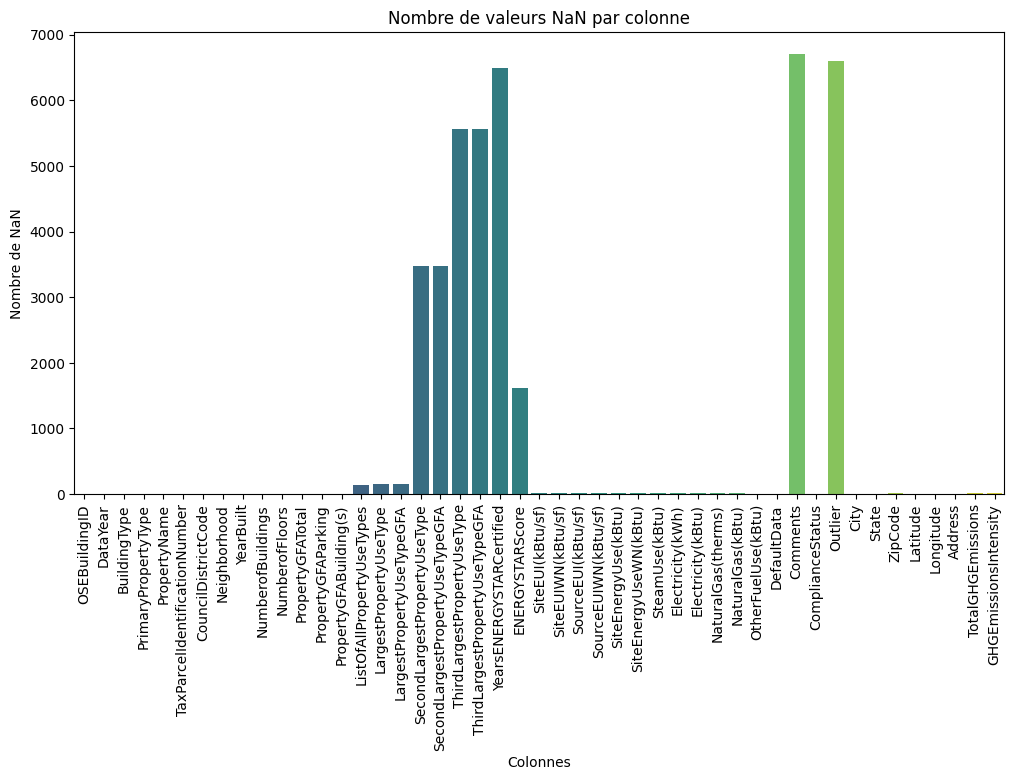

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Créez un DataFrame avec des valeurs NaN pour l'exemple
import pandas as pd
import numpy as np


# Créez un masque booléen pour les valeurs NaN
nan_mask = data.isnull()
# Calculez le nombre de NaN par colonne
nan_counts = nan_mask.sum()
# Utilisez seaborn pour tracer un diagramme en barres empilées des valeurs manquantes
plt.figure(figsize=(12, 6))
sns.barplot(x=nan_counts.index, y=nan_counts.values, palette="viridis")
plt.xlabel('Colonnes')
plt.ylabel('Nombre de NaN')
plt.title('Nombre de valeurs NaN par colonne')
plt.xticks(rotation=90)  # Rotation des étiquettes d'axe des x pour une meilleure lisibilité
plt.show()


In [26]:
data.shape

(6716, 47)

In [27]:
import pandas as pd
data['BuildingType'].value_counts()
# Define the list of values to drop
index_to_drop = ['Multifamily LR (1-4)', 'Multifamily MR (5-9)', 'Multifamily HR (10+)']

# Assuming 'data' is your DataFrame
# Use the .isin() method to filter rows based on 'BuildingType'
index_to_drop = data[data['BuildingType'].isin(index_to_drop)].index

# Drop the rows with the specified index values
data.drop(index_to_drop, axis='index', inplace=True)
data['BuildingType'].value_counts()

NonResidential        1769
SPS-District K-12      131
Nonresidential COS      98
Campus                  27
Nonresidential WA        1
Name: BuildingType, dtype: int64

In [28]:
data.shape

(2026, 47)

In [29]:
print("shape before: ", data.shape) 
sel_cols = ['BuildingType', 'PrimaryPropertyType', 'NumberofBuildings',
            'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
            'PropertyGFABuilding(s)', 'LargestPropertyUseType',
            'LargestPropertyUseTypeGFA', 'OSEBuildingID',
            'SiteEnergyUse(kBtu)'] # sélection des données cruciales

data_dup = data.loc[data.duplicated(subset=['OSEBuildingID'], keep=False),
                sel_cols].sort_values('OSEBuildingID').reset_index()

gb = data_dup.groupby('OSEBuildingID')[['SiteEnergyUse(kBtu)', 'index']]
mask = gb.agg({'SiteEnergyUse(kBtu)': lambda x: x.idxmax(),
               'index': lambda x: tuple(x.values)})

ind_to_drop = []
for oseid in mask.index:
    first = mask.loc[oseid, 'index'][0]
    second = mask.loc[oseid, 'index'][1]
    first_val = data.loc[first, sel_cols].notna().sum().values[0]
    second_val = data.loc[second, sel_cols].notna().sum().values[0]
    if first_val < second_val:
        ind_to_drop.append(first) # conserver le second
    elif first_val > second_val:
        ind_to_drop.append(second) # conserver le premier
    else:
        if mask.loc[oseid, 'SiteEnergyUse(kBtu)']:
            ind_to_drop.append(first)
        else:
            ind_to_drop.append(second)

data = data.drop(index=ind_to_drop)
print("shape after: ", data.shape) 




shape before:  (2026, 47)


shape after:  (880, 47)


### Harmoniser les valeurs

In [30]:
for key in list(data.keys()):
    if data[key].nunique()<20:
        print(key,'------->', data[key].unique())
    else:
        print(key, '------->',data[key].nunique())

OSEBuildingID -------> 880
DataYear -------> [2015 2016]
BuildingType -------> ['NonResidential' 'SPS-District K-12' 'Nonresidential COS' 'Campus'
 'Nonresidential WA']
PrimaryPropertyType -------> 30
PropertyName -------> 875
TaxParcelIdentificationNumber -------> 854
CouncilDistrictCode -------> [2 3 6 7 1 5 4]
Neighborhood -------> ['GREATER DUWAMISH' 'LAKE UNION' 'BALLARD' 'DOWNTOWN'
 'MAGNOLIA / QUEEN ANNE' 'SOUTHEAST' 'DELRIDGE' 'NORTHWEST' 'CENTRAL'
 'NORTHEAST' 'EAST' 'NORTH' 'SOUTHWEST' 'North' 'Ballard'
 'DELRIDGE NEIGHBORHOODS']
YearBuilt -------> 111
NumberofBuildings -------> [ 1.  6.  7.  3. 14.  9.  4.  0.  2.  5.  8.]
NumberofFloors -------> 38
PropertyGFATotal -------> 858
PropertyGFAParking -------> 176
PropertyGFABuilding(s) -------> 856
ListOfAllPropertyUseTypes -------> 252
LargestPropertyUseType -------> 50
LargestPropertyUseTypeGFA -------> 821
SecondLargestPropertyUseType -------> 36
SecondLargestPropertyUseTypeGFA -------> 396
ThirdLargestPropertyUseType ------

In [31]:
data['Neighborhood'].replace('Delridge', 'DELRIDGE', inplace=True)
data['Neighborhood'].replace('North', 'NORTH', inplace=True)
data['Neighborhood'].replace('Northwest', 'NORTHWEST', inplace=True)
data['Neighborhood'].replace('Central', 'CENTRAL', inplace=True)
data['Neighborhood'].replace('Ballard', 'BALLARD', inplace=True)

In [32]:
data['City'].replace('Seattle', 'SEATTLE', inplace=True)
data['ComplianceStatus'].replace('Not Compliant', 'Non-Compliant', inplace=True)
data['ComplianceStatus'].replace('Error - Correct Default Data', 'Missing Data', inplace=True)
data['NumberofBuildings'].replace(0, 1, inplace=True)

In [33]:
data['ListOfAllPropertyUseTypes'] = data['ListOfAllPropertyUseTypes']\
                                    .apply(lambda x: tuple(str(x).split(',')))

#### Convertie les variables numériques qui sont des variables catégorielles

In [34]:
data["CouncilDistrictCode"].info()

<class 'pandas.core.series.Series'>
Int64Index: 880 entries, 1 to 3375
Series name: CouncilDistrictCode
Non-Null Count  Dtype
--------------  -----
880 non-null    int64
dtypes: int64(1)
memory usage: 13.8 KB


In [35]:
# Convertie 'CouncilDistrictCode' en variable catégorielle
data["CouncilDistrictCode"] = data["CouncilDistrictCode"].apply(str)


### Vérifier que les données de géolocalisation se réfèrent à la ville de Seattle.

In [36]:
# https://python-visualization.github.io/folium/quickstart.html#Getting-Started
import folium
m = folium.Map()
m = folium.Map(location=[data['Latitude'].mean(), data['Longitude'].mean()], zoom_start=11)
for i in range(0,len(data)):
    folium.Circle([data.iloc[i]['Latitude'],data.iloc[i]['Longitude']], popup=data.iloc[i]['Address'], radius =100).add_to(m)
m
#m.save('index.html')

### Analyze des  data manquantes  (N/A)


In [37]:
data['LargestPropertyUseType'].isna().sum()

24

In [38]:
data['ThirdLargestPropertyUseTypeGFA'].isna().sum()


677

In [39]:
data['LargestPropertyUseType'].value_counts()

Office                                                  266
Non-Refrigerated Warehouse                              110
K-12 School                                              71
Other                                                    52
Retail Store                                             49
Hotel                                                    38
Worship Facility                                         28
Distribution Center                                      27
Medical Office                                           23
Other - Recreation                                       21
Supermarket/Grocery Store                                18
College/University                                       15
Self-Storage Facility                                    13
Senior Care Community                                    12
Parking                                                   9
Other - Entertainment/Public Assembly                     9
Residence Hall/Dormitory                

In [40]:
data['SecondLargestPropertyUseTypeGFA'].isna().sum()

421

In [41]:
data['ThirdLargestPropertyUseType'].isna().sum()

677

In [42]:
data['SecondLargestPropertyUseType'].isna().sum()

421

- suivant les informations dans le site,j 'ai constaté quand la 2 eme et 3 eme batiment sont vide c 'est à dire qu 'il y' a un seul batiment .donc on met dans le type Inutilisable et ca GFA superficie est 0.
de meme pour LargestPropertyUseType 

In [43]:
data[['ThirdLargestPropertyUseType', 'SecondLargestPropertyUseType']] = data[['ThirdLargestPropertyUseType', 'SecondLargestPropertyUseType']].fillna('Inutilisable')
data[['ThirdLargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA']] = data[['ThirdLargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA']].fillna(0, )
data['LargestPropertyUseType'] = data['LargestPropertyUseType'].fillna('Aucune information')

In [44]:
data.dtypes

OSEBuildingID                        int64
DataYear                             int64
BuildingType                        object
PrimaryPropertyType                 object
PropertyName                        object
TaxParcelIdentificationNumber       object
CouncilDistrictCode                 object
Neighborhood                        object
YearBuilt                            int64
NumberofBuildings                  float64
NumberofFloors                     float64
PropertyGFATotal                     int64
PropertyGFAParking                   int64
PropertyGFABuilding(s)               int64
ListOfAllPropertyUseTypes           object
LargestPropertyUseType              object
LargestPropertyUseTypeGFA          float64
SecondLargestPropertyUseType        object
SecondLargestPropertyUseTypeGFA    float64
ThirdLargestPropertyUseType         object
ThirdLargestPropertyUseTypeGFA     float64
YearsENERGYSTARCertified            object
ENERGYSTARScore                    float64
SiteEUI(kBt

In [45]:
data['Outlier'].isna().sum()


867

In [46]:
data['Outlier'].value_counts()

Low Outlier     6
High Outlier    3
Low outlier     3
High outlier    1
Name: Outlier, dtype: int64

In [47]:
data['Outlier'].replace(np.nan,'Normal',inplace=True)
data['Outlier'].replace('High outlier', 'High Outlier ', inplace=True)
data['Outlier'].replace('Low outlier', 'Low Outlier', inplace=True)
data['Outlier'].replace('High Outlier', 'High Outlier ', inplace=True)

In [48]:
data['Outlier'].value_counts()

Normal           867
Low Outlier        9
High Outlier       4
Name: Outlier, dtype: int64

In [49]:
data.describe()

OSEBuildingID     DataYear    YearBuilt  NumberofBuildings  \
count     880.000000   880.000000   880.000000         880.000000   
mean    16037.856818  2015.511364  1962.557955           1.089773   
std     14102.145403     0.500155    32.559651           0.724909   
min         1.000000  2015.000000  1900.000000           1.000000   
25%       569.500000  2015.000000  1930.750000           1.000000   
50%     20948.500000  2016.000000  1966.000000           1.000000   
75%     24458.750000  2016.000000  1989.000000           1.000000   
max     50226.000000  2016.000000  2015.000000          14.000000   

       NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
count      878.000000      8.800000e+02          880.000000   
mean         4.102506      1.173967e+05        12686.348864   
std          6.225410      2.060915e+05        41916.504523   
min          0.000000      1.128500e+04           -2.000000   
25%          1.000000      2.996850e+04            0.000000   
50%          2.000000      5.045800e+04            0.000000   
75%          4.000000      1.086412e+05            0.000000   
max         63.000000      2.200000e+06       512608.000000   

       PropertyGFABuilding(s)  LargestPropertyUseTypeGFA  \
count            8.800000e+02               8.560000e+02   
mean             1.047104e+05               9.724927e+04   
std              1.856879e+05               1.739139e+05   
min              1.128500e+04               5.656000e+03   
25%              2.874600e+04               2.571975e+04   
50%              4.882400e+04               4.336950e+04   
75%              9.477175e+04               9.306950e+04   
max              2.200000e+06               1.719643e+06   

       SecondLargestPropertyUseTypeGFA  ThirdLargestPropertyUseTypeGFA  \
count                       880.000000                      880.000000   
mean                      17876.193182                     3263.586364   
std                       49200.620785                    16540.599512   
min                           0.000000                        0.000000   
25%                           0.000000                        0.000000   
50%                           0.000000                        0.000000   
75%                       12907.500000                        0.000000   
max                      441551.000000                   303910.000000   

       ENERGYSTARScore  SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  \
count       576.000000        878.000000          878.000000   
mean         64.798611         73.023918           76.402620   
std          28.695845         75.008655           76.545141   
min           1.000000          0.000000            0.000000   
25%          46.750000         33.600000           36.225000   
50%          73.000000         52.850000           56.099999   
75%          89.000000         82.400001           86.325001   
max         100.000000        834.400024          834.400024   

       SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  SiteEnergyUse(kBtu)  \
count          878.000000            878.000000         8.780000e+02   
mean           178.821298            182.339863         8.433466e+06   
std            194.671739            194.640466         2.288584e+07   
min              0.000000              0.000000         0.000000e+00   
25%             76.625000             82.625000         1.261717e+06   
50%            135.900002            140.000000         2.717838e+06   
75%            208.474998            210.225002         6.983159e+06   
max           2620.000000           2620.000000         2.930908e+08   

       SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  Electricity(kWh)  \
count           8.780000e+02    8.780000e+02      8.780000e+02   
mean            8.653491e+06    5.205246e+05      1.726282e+06   
std             2.331183e+07    6.182626e+06      4.602158e+06   
min             0.000000e+00    0.000000e+00      0.000000e+00   
25%             1.348326e+06    0.000000e+00      2.0

####  supprimer les lignes ou pas de consommation d 'energie


In [50]:
index_to_drop = data[data['SiteEnergyUseWN(kBtu)']<1].index
print(index_to_drop)
print(f'Il y a  {len(index_to_drop)} exemples avec consommation nulle   à supprimer ')

Int64Index([862, 133, 247, 350, 614, 953, 1361], dtype='int64')
Il y a  7 exemples avec consommation nulle   à supprimer 


In [51]:
data.drop(index_to_drop, inplace=True, axis=0)

In [52]:

index_to_drop = data[data['TotalGHGEmissions']<=0].index
print(index_to_drop)
print(f'Il y a  {len(index_to_drop)} exemples avec consommation nulle   à supprimer ')

Int64Index([], dtype='int64')
Il y a  0 exemples avec consommation nulle   à supprimer 


In [53]:
data.drop(index_to_drop, inplace=True, axis=0)

#### Suprimer les lignes none


In [54]:
print('# avant :',len(data))
data.dropna(how = 'all', axis=0, inplace=True)
print('# aprés:',len(data))

# avant : 866
# aprés: 866


### Remplir les valeurs manquantes dans les données numériques.

In [55]:
numeric_data = data.drop(['ENERGYSTARScore'], axis=1).select_dtypes(['int32', 'float64']).copy()
numeric_data.shape

(866, 22)

In [56]:
numeric_data.isna().sum().sort_values(ascending=False)

LargestPropertyUseTypeGFA          23
ZipCode                            16
SteamUse(kBtu)                      2
SiteEnergyUseWN(kBtu)               2
TotalGHGEmissions                   2
NaturalGas(kBtu)                    2
NaturalGas(therms)                  2
Electricity(kBtu)                   2
Electricity(kWh)                    2
NumberofFloors                      2
GHGEmissionsIntensity               2
SiteEnergyUse(kBtu)                 2
SourceEUIWN(kBtu/sf)                2
SourceEUI(kBtu/sf)                  2
SiteEUIWN(kBtu/sf)                  2
SiteEUI(kBtu/sf)                    2
OtherFuelUse(kBtu)                  0
ThirdLargestPropertyUseTypeGFA      0
Latitude                            0
Longitude                           0
SecondLargestPropertyUseTypeGFA     0
NumberofBuildings                   0
dtype: int64

### TaxParcelIdentificationNumber est deuxieme id des batiments-->drop

In [57]:
display(data.duplicated(subset=['TaxParcelIdentificationNumber'], keep=False).sum())
display(data.duplicated(keep=False).sum())

48

0

In [58]:
data = data.drop('TaxParcelIdentificationNumber', axis=1)

In [59]:
data['DataYear'] = data['DataYear'].apply(str)

In [60]:


data['YearsENERGYSTARCertified'] = data['YearsENERGYSTARCertified']\
                                             .apply(lambda x: split_dates(x))

In [61]:
#NumberofBuildings
'''Number of buildings included in the property's report. In cases where a property is reporting as a campus, 
multiple buildings may be included in one report.'''
print("Number of buildings in 2015 : " + str(data[data['DataYear'] == '2015']['NumberofBuildings'].count()))
print("Number of buildings in 2016 : " + str(data[data['DataYear'] == '2016']['NumberofBuildings'].count()))

Number of buildings in 2015 : 423
Number of buildings in 2016 : 443


In [62]:
#PropertyGFABuilding(s)
'''Total floor space in square feet between the outside surfaces of a building’s enclosing walls. 
This includes all areas inside the building(s), such as tenant space, common areas, stairwells, 
basements, storage, etc.'''
print("Million square feet in 2015 : " + 
      str(int((data[data['DataYear'] == '2015']['PropertyGFABuilding(s)'].sum()/1e6))) + ' (24 Millions M2)')
print("Million square feet in 2016 : " + 
      str(int((data[data['DataYear'] == '2016']['PropertyGFABuilding(s)'].sum()/1e6))) + ' (27 Millions M2)')

Million square feet in 2015 : 44 (24 Millions M2)
Million square feet in 2016 : 45 (27 Millions M2)


In [63]:
sel_cols = ['PropertyName','Neighborhood' ,'Address']
data[sel_cols] = data[sel_cols].applymap(str.upper)

In [64]:
data = data.reset_index(drop=True)

Dans un premier temps, nous supprimons les lignes où 'SiteEnergyUse(kBtu)' est égal à 0.

In [65]:
print("shape before: ", data.shape)
data = data.dropna(subset=['SiteEnergyUse(kBtu)'])
data = data.drop(index=data[data['SiteEnergyUse(kBtu)']==0].index)
print("shape after: ", data.shape)

shape before:  (866, 46)
shape after:  (864, 46)


Nous vérifions que la colonne 'SiteEnergyUse(kBtu)' est la somme des colonnes d'énergie en (kBtu).

In [66]:
import pandas as pd

# Assuming you have a DataFrame 'data' and 'SiteEnergyUse(kBtu)' along with 'SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)', 'OtherFuelUse(kBtu)' columns
sub_energy_cols = ['SteamUse(kBtu)','Electricity(kBtu)',
                   'NaturalGas(kBtu)','OtherFuelUse(kBtu)']
# Calculate the total energy use
data['SiteEnergyUse(kBtu)_calc'] = data[sub_energy_cols].sum(axis=1)

# Define the lower and upper bounds
lower_bound = data['SiteEnergyUse(kBtu)'] * 0.9
upper_bound = data['SiteEnergyUse(kBtu)'] * 1.1

# Create a mask to identify rows outside the [90%-110%] range
m_en_out = ~data['SiteEnergyUse(kBtu)_calc'].between(lower_bound, upper_bound)

# Get the indices of rows outside the range
indices_to_drop = data.index[m_en_out]

# Drop the rows using the retrieved indices
data.drop(indices_to_drop, inplace=True)

print(f"Rows where the total energy is not in [90%-110%] range of the 'SiteEnergyUse(kBtu)' have been dropped.",indices_to_drop)


Rows where the total energy is not in [90%-110%] range of the 'SiteEnergyUse(kBtu)' have been dropped. Int64Index([196], dtype='int64')


Nous supprimons les lignes lorsque 'SiteEnergyUse(kBtu)' n'est pas comprise entre 90 % et 110 % de la valeur calculée. Lorsqu'elle se trouve à l'extérieur de l'intervalle [90 % - 110 %], nous ajustons néanmoins la valeur de 'SiteEnergyUse(kBtu)' à la valeur calculée.

In [67]:

data['SiteEnergyUse(kBtu)'] = data['SiteEnergyUse(kBtu)_calc']
del data['SiteEnergyUse(kBtu)_calc']
print("shape after: ", data.shape)

shape after:  (863, 46)


In [68]:
sub_GFA_cols1 = ['PropertyGFAParking', 'PropertyGFABuilding(s)']
sub_GFA_cols2 = ['LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseTypeGFA']

In [69]:
data['PropertyGFATotal_calc'] = data[sub_GFA_cols1].sum(axis='columns')
m_GFA_out = ~data['PropertyGFATotal_calc'].between(data['PropertyGFATotal']*0.99,
                                                  data['PropertyGFATotal']*1.01)
print("Rows where the total GFA is not\n \
in [99%-101%] range of the 'PropertyGFATotal': ",
data[m_GFA_out].shape[0], '/', data.shape[0])

Rows where the total GFA is not
 in [99%-101%] range of the 'PropertyGFATotal':  0 / 863


### 3.1 Géolocalisation des bâtiments

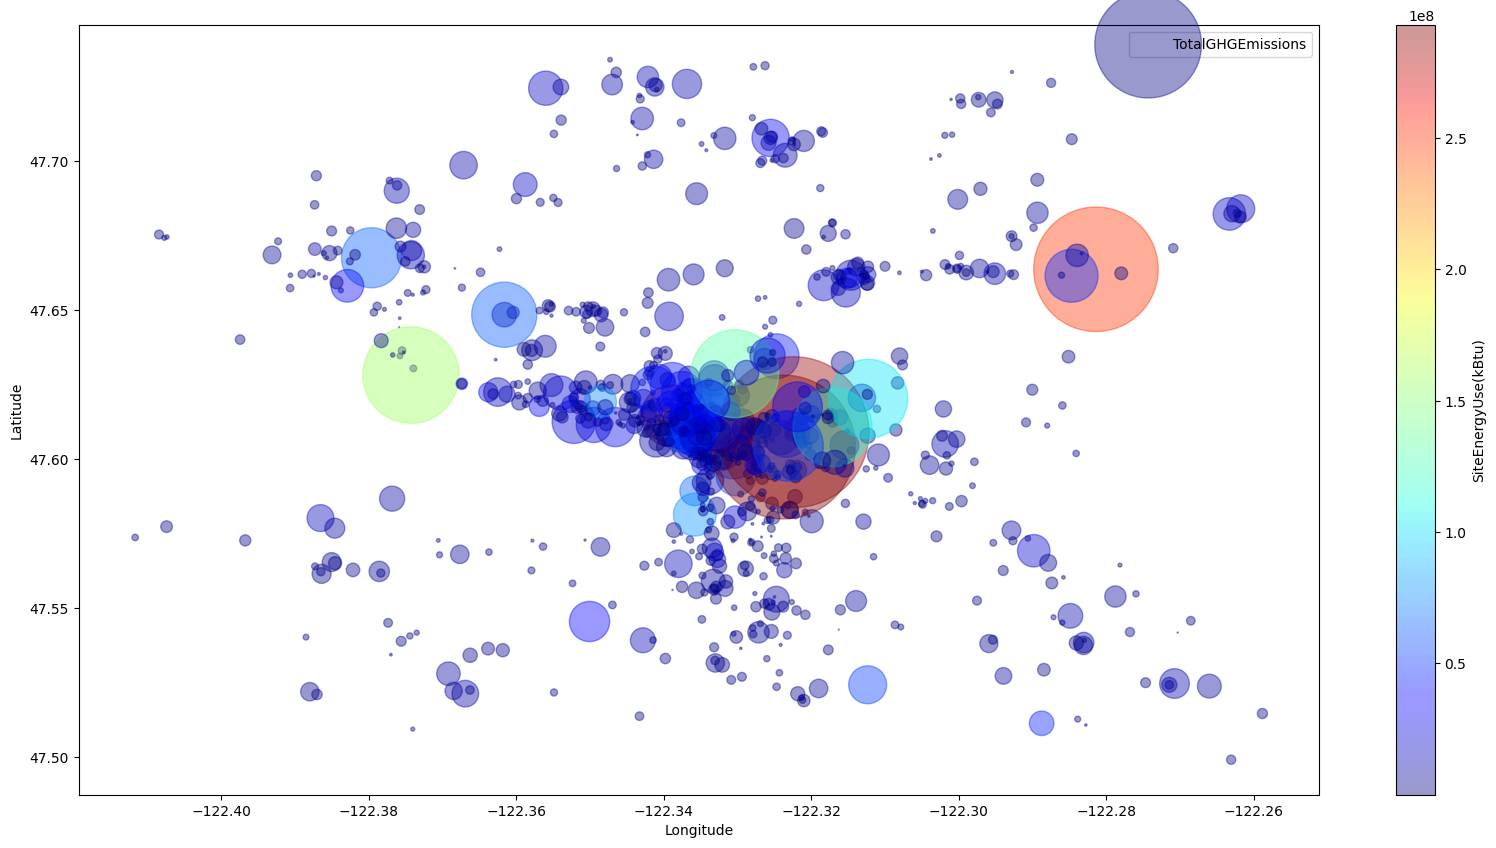

In [70]:
data.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.4,
            s=data["TotalGHGEmissions"], label="TotalGHGEmissions",
            c="SiteEnergyUse(kBtu)", cmap=plt.get_cmap("jet"), colorbar=True,
            figsize=(20,10))
plt.show()

- Il y a une très forte densité de bâtiments au centre géographique

- Il y a quelques bâtiments outliers en consommation d'énergie totale

- Il n'y pas de séparation visuellement franche

#### Changer les catégories avec seulement 1 ligne

Afin d'obtenir des résultats les plus cohérents possibles entre l'ensemble d'entraînement et l'ensemble de test, nous allons stratifier les répartitions en utilisant la caractéristique catégorielle la plus pertinente.

Affichons le nombre de lignes par valeurs uniques pour chacune des valeurs catégorielles.

In [71]:
sel_cols = ['Neighborhood', 'BuildingType', 'PrimaryPropertyType',      
            'LargestPropertyUseType',
            'SecondLargestPropertyUseType',
            'ThirdLargestPropertyUseType']

In [72]:
data_n_unique = pd.DataFrame()
for c in sel_cols:
    sub_data = data.groupby(c).size().sort_values().to_frame().reset_index()
    data_n_unique = pd.concat([data_n_unique, sub_data], axis=1)


In [73]:
ser = data['Neighborhood'].agg(lambda x: tuple(x.unique()))
print("Unique value to replace:", [cat for cat in ser if (data['Neighborhood']==cat).sum()==1])
print(data['Neighborhood'].value_counts())

Unique value to replace: ['DELRIDGE NEIGHBORHOODS']
DOWNTOWN                  196
GREATER DUWAMISH          181
MAGNOLIA / QUEEN ANNE      80
NORTHEAST                  72
LAKE UNION                 71
EAST                       63
NORTHWEST                  36
BALLARD                    35
NORTH                      34
SOUTHEAST                  26
CENTRAL                    24
DELRIDGE                   23
SOUTHWEST                  21
DELRIDGE NEIGHBORHOODS      1
Name: Neighborhood, dtype: int64


In [74]:
data['Neighborhood'] = data['Neighborhood'].replace('DELRIDGE NEIGHBORHOODS',
                                                'DELRIDGE')

In [75]:
ser = data['BuildingType'].agg(lambda x: tuple(x.unique()))
print("Unique value to replace:", [cat for cat in ser if (data['BuildingType']==cat).sum()==1])
print(data['BuildingType'].value_counts())

Unique value to replace: ['Nonresidential WA']
NonResidential        748
Nonresidential COS     52
SPS-District K-12      50
Campus                 12
Nonresidential WA       1
Name: BuildingType, dtype: int64


We will simply set 'Nonresidential WA' to 'NonResidential'

In [76]:
data['BuildingType'] = data['BuildingType'].replace('Nonresidential WA',
                                                'NonResidential')

In [77]:
data.shape

(863, 47)

### Imputation des données manquantes 

Les colonnes peuvent être réparties en trois catégories :

données non utilisées : données d'identification trop précises.
propriétés : non directement liées aux mesures d'émission de CO2, peuvent donc être utilisées pour le modèle sans craindre de fuite de données. Certaines sont quantitatives, d'autres sont catégoriques et devront être encodées.
métriques de performance énergétique : données liées aux mesures que nous voulons calculer avec notre modèle, ne devraient donc pas être utilisées comme données d'entrée pour le modèle. Cependant, nous pouvons extraire des données utiles à partir de celles-ci.

In [78]:
id_cols = ['OSEBuildingID', 'TaxParcelIdentificationNumber',
               'CouncilDistrictCode',
               'ListOfAllPropertyUseTypes'] # redondante ?

prop_cols = ['Neighborhood', 'ZipCode', 'CouncilDistrictCode',
             'BuildingType', 'PrimaryPropertyType',
             'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
             'PropertyGFAParking','PropertyGFABuilding(s)',
             'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
             'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
             'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
             'ENERGYSTARScore', 'Outlier']

prop_C_cols = list(data[prop_cols].select_dtypes('object').columns) # to encode
prop_Q_cols = list(data[prop_cols].select_dtypes(np.number).columns)

en_perf_metrics_cols = ['ENERGYSTARScore',
                        'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)',
                        'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
                        'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)',
                        'SteamUse(kBtu)',
                        'Electricity(kWh)','Electricity(kBtu)',
                        'NaturalGas(therms)', 'NaturalGas(kBtu)',
                        'OtherFuelUse(kBtu)', 'TotalGHGEmissions',
                        'GHGEmissionsIntensity']

In [79]:
for c in prop_cols+['SteamUse(kBtu)','Electricity(kBtu)','NaturalGas(therms)',
   'NaturalGas(kBtu)','OtherFuelUse(kBtu)']+['YearBuilt']:
    n = data[c].isna().sum()
    if n>0:
        print('o--',c, ': ',str(n)," MISSING VALUES !")
    else:
        print(c, "no missing values.")

Neighborhood no missing values.
o-- ZipCode :  16  MISSING VALUES !
CouncilDistrictCode no missing values.
BuildingType no missing values.
PrimaryPropertyType no missing values.
NumberofBuildings no missing values.
o-- NumberofFloors :  2  MISSING VALUES !
PropertyGFATotal no missing values.
PropertyGFAParking no missing values.
PropertyGFABuilding(s) no missing values.
LargestPropertyUseType no missing values.
o-- LargestPropertyUseTypeGFA :  23  MISSING VALUES !
SecondLargestPropertyUseType no missing values.
SecondLargestPropertyUseTypeGFA no missing values.
ThirdLargestPropertyUseType no missing values.
ThirdLargestPropertyUseTypeGFA no missing values.
o-- ENERGYSTARScore :  300  MISSING VALUES !
Outlier no missing values.
SteamUse(kBtu) no missing values.
Electricity(kBtu) no missing values.
NaturalGas(therms) no missing values.
NaturalGas(kBtu) no missing values.
OtherFuelUse(kBtu) no missing values.
YearBuilt no missing values.


In [80]:
# Remplacer les valeurs négatives par NaN dans la colonne 'PropertyGFABuilding(s)'
data.loc[data['PropertyGFABuilding(s)'] < 0, 'PropertyGFABuilding(s)'] = np.nan


ERROR: Nothing to impute (target column already filled)
No values to impute for PropertyGFABuilding(s)
ERROR: Nothing to impute (target column already filled)
No values to impute for LargestPropertyUseType
ooo----KNN REGRESSION : LargestPropertyUseTypeGFA
--- model: 0.545
--- normal random distribution: -0.311
--- dummy regressor (mean) : r2_score=-3.28e-05
--- dummy regressor (median) : r2_score=-0.0941


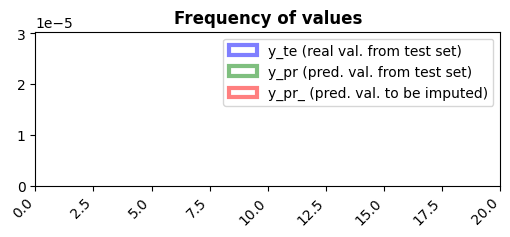

Number of values to impute for LargestPropertyUseTypeGFA: 23


In [81]:
# var_model: to train | var_target: to impute

filled_cols = ['BuildingType', 'PrimaryPropertyType', 'NumberofBuildings',
               'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
               'PropertyGFABuilding(s)']

# Automatic KNN classification
ind_to_impute, y_pr_ = knn_impute(data, var_model = ['BuildingType', 'PrimaryPropertyType', 'NumberofBuildings',
               'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking'],
                                  var_target='PropertyGFABuilding(s)',
                                    enc_strat_cat='label', plot=True)
handle_imputation_results(data, ind_to_impute, 'PropertyGFABuilding(s)', y_pr_)
# Automatic KNN classification
ind_to_impute, y_pr_ = knn_impute(data, var_model = filled_cols,
                                  var_target='LargestPropertyUseType',
                                    enc_strat_cat='label', plot=True)

handle_imputation_results(data, ind_to_impute, 'LargestPropertyUseType', y_pr_)
# Automatic KNN regression
ind_to_impute, y_pr_ = knn_impute(data, var_model = filled_cols,
                                  var_target='LargestPropertyUseTypeGFA',
                                    enc_strat_cat='label', plot=True)

handle_imputation_results(data, ind_to_impute, 'LargestPropertyUseTypeGFA', y_pr_)

ooo----KNN REGRESSION : NumberofFloors
--- model: 0.722
--- normal random distribution: -0.384
--- dummy regressor (mean) : r2_score=-0.000124
--- dummy regressor (median) : r2_score=-0.0987


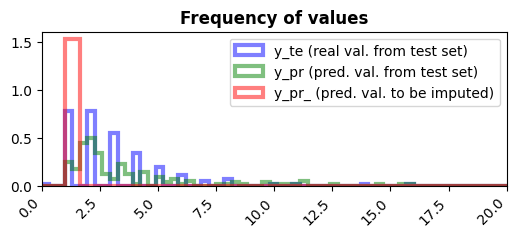

Number of values to impute for NumberofFloors: 2


In [82]:
# Automatic KNN classification
ind_to_impute, y_pr_ = knn_impute(data, var_model =['BuildingType', 'PrimaryPropertyType', 'NumberofBuildings',
                'PropertyGFATotal', 'PropertyGFAParking','PropertyGFABuilding(s)'],
                                  var_target='NumberofFloors',
                                    enc_strat_cat='label', plot=True)
handle_imputation_results(data, ind_to_impute, 'NumberofFloors', y_pr_)

ooo----KNN REGRESSION : ZipCode
--- model: 0.712
--- normal random distribution: -3.64e+07
--- dummy regressor (mean) : r2_score=-0.00334
--- dummy regressor (median) : r2_score=-0.068


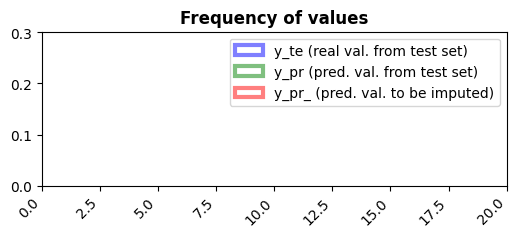

Number of values to impute for ZipCode: 16


In [83]:
# Automatic KNN classification
ind_to_impute, y_pr_ = knn_impute(data, var_model = ['Latitude','Longitude','CouncilDistrictCode'],
                                  var_target='ZipCode',
                                    enc_strat_cat='label', plot=True)
handle_imputation_results(data, ind_to_impute, 'ZipCode', y_pr_)


ooo----KNN REGRESSION : ENERGYSTARScore
--- model: 0.345
--- normal random distribution: -5.99
--- dummy regressor (mean) : r2_score=-0.0178
--- dummy regressor (median) : r2_score=-0.0242


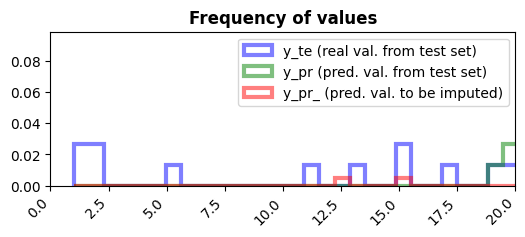

Number of values to impute: 300


In [84]:
sel_cols = ['SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)',
                        'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
                        'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)',
                        'SteamUse(kBtu)',
                        'Electricity(kWh)','Electricity(kBtu)',
                        'NaturalGas(therms)', 'NaturalGas(kBtu)',
                        'OtherFuelUse(kBtu)', 'TotalGHGEmissions',
                        'GHGEmissionsIntensity']
# Automatic KNN regression
ind_to_impute, y_pr_ = knn_impute(data, var_model = sel_cols+filled_cols,
                                  var_target='ENERGYSTARScore',
                                  enc_strat_cat='label', plot=True)
#handle_imputation_results(data, ind_to_impute, 'ENERGYSTARScore', y_pr_)
print('Number of values to impute:', len(ind_to_impute))


The score is too bad to be imputed.

In [85]:
print("before after: ", data.shape)

data = data.dropna(subset=['SiteEnergyUse(kBtu)'])
data = data.drop(index=data[data['SiteEnergyUse(kBtu)']==0].index)
print("shape after: ", data.shape)

before after:  (863, 47)
shape after:  (863, 47)


### 1.4 Feature Engineering

#### Âge du bâtiment

Déduire l'âge du bâtiment ou le délai depuis la dernière rénovation majeure (voir les métadonnées dans le fichier JSON) à partir de l'année de construction du bâtiment et de l'année des données.

In [86]:
data['BuildingAge'] = data['DataYear'].astype(int)-data['YearBuilt']

In [87]:
data['MeanGFAperFloor'] = data['PropertyGFABuilding(s)']/(data['NumberofFloors']+1)

#### Parking GFA ratio
Dédire le ratio de la superficie des parkings par rapport à l'ensemble de la zone.

In [88]:
data['ParkingGFARatio'] = data['PropertyGFAParking']/data['PropertyGFATotal']

#### Posséder ou non la certification EnergySTAR

À partir de la colonne 'YearsENERGYSTARCertified', nous pouvons déduire :

si le bâtiment a été certifié pendant l'année DataYear
si le bâtiment a été certifié l'année précédente à DataYear.
Les deux pourraient être utilisés sans fuite de données, car EnergySTAR ne reflète que l'efficacité énergétique des bâtiments et non leur consommation énergétique réelle. Cependant, nous prenons uniquement 'CertifiedPreviousYear', car nous pourrions ne pas savoir à l'avance si un bâtiment sera certifié cette année.

In [89]:
data['DataYear'] = data['DataYear'].apply(str)

In [90]:
import re

# Nettoyer les données de la colonne 'YearsENERGYSTARCertified'
data['YearsENERGYSTARCertified'] = data['YearsENERGYSTARCertified'].apply(
    lambda x: re.sub(r'[^0-9,]', '', str(x))  # Supprimer les caractères non numériques
)

# Convertir les années en une liste d'entiers
data['YearsENERGYSTARCertified'] = data['YearsENERGYSTARCertified'].apply(
    lambda x: [int(year) for year in x.split(',') if year] if x else []  # Convertir en liste d'entiers
)

In [91]:
data['Certified'] = [False if t == () else d in t for d, t \
                   in data[['DataYear', 'YearsENERGYSTARCertified']].values]


In [92]:
data['CertifiedPreviousYear'] = [False if t == () else \
                               int(d)-1 in [int(d) for d in t] \
                               for d, t in data[['DataYear',
                                               'YearsENERGYSTARCertified']].values]

In [93]:
data['Certified'].value_counts()

False    863
Name: Certified, dtype: int64

In [94]:
data['CertifiedPreviousYear'].value_counts()

False    845
True      18
Name: CertifiedPreviousYear, dtype: int64

#### Number of years where EnergySTAR certification was obtained

In [95]:
data['NbYearsCertified'] = data['YearsENERGYSTARCertified'].apply(len)
data['NbYearsCertified'].value_counts()

0    809
1     19
2     10
4      8
7      5
3      3
5      3
6      3
9      2
8      1
Name: NbYearsCertified, dtype: int64

In [96]:
# Trouver les colonnes avec des NaN
columns_with_nan = data.columns[data.isna().any()].tolist()
print("Colonnes avec des NaN :", columns_with_nan)

Colonnes avec des NaN : ['ENERGYSTARScore', 'Comments']


#### Détermination d'un profil de consommation énergétique

Si nous voulons éviter toute fuite de données, nous éviterons de prendre les données de consommation d'énergie (kBtu) en tant que paramètres pour notre modèle, car la consommation d'énergie ne sera pas disponible lorsque nous devrons prédire les émissions de gaz à effet de serre.
Cependant, nous pourrions imaginer élaborer un profil de consommation des bâtiments basé sur l'équipement disponible.
Par exemple, les bâtiments équipés d'appareils de chauffage électrique sont susceptibles d'utiliser l'électricité comme principale source d'énergie tout au long de l'année.

Nous allons créer une colonne 'Profil' basée sur des données de consommation précises, mais nous essaierons de maintenir des catégories suffisamment larges pour éviter toute fuite de données.

Dans un premier temps, nous calculerons la proportion d'utilisation de la vapeur, de l'électricité, du gaz naturel (thermes), du gaz naturel et d'autres combustibles, et nous stockerons les résultats dans de nouvelles colonnes.


In [97]:
sub_energy_ratio_cols = ['SteamUse(ratio)','Electricity(ratio)',
            'NaturalGas(ratio)','OtherFuelUse(ratio)']

for oc, nc in zip(sub_energy_cols, sub_energy_ratio_cols):
    data[nc] = data[oc]/data['SiteEnergyUse(kBtu)']

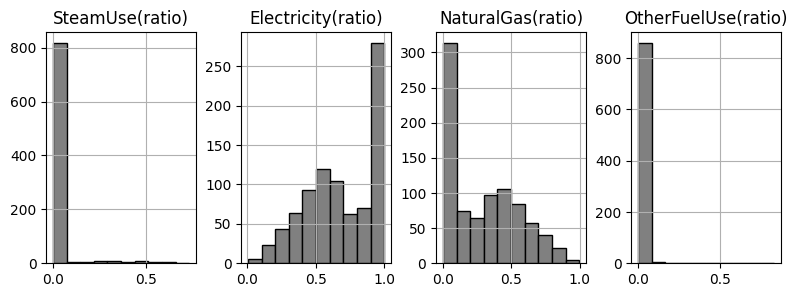

In [98]:
data[sub_energy_ratio_cols].hist(layout=(1,5), color='grey', ec='k')
plt.gcf().set_size_inches(12,3)

In [99]:
data['MainEnergy'] = data[sub_energy_ratio_cols].apply(np.argmax, axis=1)
data['MainEnergy'] = data['MainEnergy'].map({0: 'Steam',
                                         1: 'Electricity',
                                         2: 'NaturalGas',
                                         3: 'OtherFuel'})

Nous allons créer de nouvelles colonnes pour avoir un aperçu du profil énergétique du bâtiment.

Nous allons diviser en 3 catégories le taux de consommation de chaque type d'énergie (vapeur 's', électricité 'e', gaz 'g' et autre 'o'), puis agréger les catégories pour créer un profil.

Par exemple :
    - (0.67-1] steam, (0-0.33] gas, (0-0.33] electricity and (0-0.33] other -> S(geo)
    - (0.33-0.67] steam, (0.33-0.67] electricity, (0-0.33] gas and (0-0.33] other -> se(go)
    - (0.33-0.67] other, (0-0.33] electricity, (0-0.33] gas and (0-0.33] other -> o(seg)





In [100]:
sub_energy_bins_cols = ['SteamUse(bins)','Electricity(bins)',
            'NaturalGas(bins)','OtherFuelUse(bins)']

for oc, nc in zip(sub_energy_ratio_cols, sub_energy_bins_cols):
    data[nc] = pd.cut(data[oc], bins=[0,0.33,0.67,1],
                    labels=[f'({oc[0].lower()})', oc[0].lower(), oc[0]],
                    include_lowest=True)
    
data['EnergyProfile'] = data[sub_energy_bins_cols].apply(lambda x: ''.join(x),
                                                     axis=1)

In [101]:
data['MainEnergy'].value_counts()

Electricity    644
NaturalGas     207
Steam           11
OtherFuel        1
Name: MainEnergy, dtype: int64

#### Surface/volume  ratio

In [102]:
df_test = pd.DataFrame()

floor_height = 9

df_test['mean_total_building_height'] = ((data['NumberofFloors']+1) * floor_height)\
                                  /data['NumberofBuildings']
df_test['mean_surface_floor'] = data['PropertyGFATotal']/(data['NumberofFloors']+1)
df_test['mean_length_floor'] = np.sqrt(df_test['mean_surface_floor'])

df_test['extsurf'] = (4*(df_test['mean_total_building_height']*df_test['mean_length_floor'] )+\
           2*(df_test['mean_surface_floor']))*data['NumberofBuildings']
df_test['volume'] = (df_test['mean_surface_floor']*df_test['mean_total_building_height'])*data['NumberofBuildings']

df_test['ExtsurfVolRatio'] = df_test['extsurf']/df_test['volume']

data['ExtsurfVolRatio'] = df_test['ExtsurfVolRatio'] 


Ajout des colonnes d'entités générées à la liste des caractéristiques disponibles à utiliser dans notre modèle.

In [103]:
prop_cols += ['BuildingAge', 'MeanGFAperFloor', 'ParkingGFARatio',
              'CertifiedPreviousYear', 'MainEnergy',
              'NbYearsCertified', 'ExtsurfVolRatio']                                
prop_Q_cols += ['BuildingAge', 'MeanGFAperFloor',
                'ParkingGFARatio', 'NbYearsCertified', 'ExtsurfVolRatio']
prop_C_cols += ['CertifiedPreviousYear',  'MainEnergy'] 

In [104]:
prop_Q_cols

['ZipCode',
 'NumberofBuildings',
 'NumberofFloors',
 'PropertyGFATotal',
 'PropertyGFAParking',
 'PropertyGFABuilding(s)',
 'LargestPropertyUseTypeGFA',
 'SecondLargestPropertyUseTypeGFA',
 'ThirdLargestPropertyUseTypeGFA',
 'ENERGYSTARScore',
 'BuildingAge',
 'MeanGFAperFloor',
 'ParkingGFARatio',
 'NbYearsCertified',
 'ExtsurfVolRatio']

## 2 Data exploration

In [105]:
columns_with_nan = data[prop_cols].columns[data[prop_cols].isna().any()].tolist()
columns_with_nan

['ENERGYSTARScore']

In [106]:
data[prop_cols].describe(include='all')

Neighborhood       ZipCode CouncilDistrictCode    BuildingType  \
count           863    863.000000                 863             863   
unique           13           NaN                   7               4   
top        DOWNTOWN           NaN                   7  NonResidential   
freq            196           NaN                 282             749   
mean            NaN  98116.968714                 NaN             NaN   
std             NaN     16.539635                 NaN             NaN   
min             NaN  98101.000000                 NaN             NaN   
25%             NaN  98105.000000                 NaN             NaN   
50%             NaN  98112.000000                 NaN             NaN   
75%             NaN  98125.000000                 NaN             NaN   
max             NaN  98199.000000                 NaN             NaN   

                PrimaryPropertyType  NumberofBuildings  NumberofFloors  \
count                           863         863.000000      863.000000   
unique                           30                NaN             NaN   
top     Small- and Mid-Sized Office                NaN             NaN   
freq                            149                NaN             NaN   
mean                            NaN           1.091541        4.049405   
std                             NaN           0.731911        6.108482   
min                             NaN           1.000000        0.000000   
25%                             NaN           1.000000        1.000000   
50%                             NaN           1.000000        2.000000   
75%                             NaN           1.000000        4.000000   
max                             NaN          14.000000       63.000000   

        PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
count       8.630000e+02          863.000000            8.630000e+02   
unique               NaN                 NaN                     NaN   
top                  NaN                 NaN                     NaN   
freq                 NaN                 NaN                     NaN   
mean        1.163113e+05        12383.796060            1.039275e+05   
std         2.039115e+05        41578.946153            1.843264e+05   
min         1.128500e+04           -2.000000            1.128500e+04   
25%         2.976800e+04            0.000000            2.851550e+04   
50%         4.996500e+04            0.000000            4.822000e+04   
75%         1.075525e+05            0.000000            9.483050e+04   
max         2.200000e+06       512608.000000            2.200000e+06   

       LargestPropertyUseType  LargestPropertyUseTypeGFA  \
count                     863               8.630000e+02   
unique                     51                        NaN   
top                    Office                        NaN   
freq                      260                        NaN   
mean                      NaN               9.631448e+04   
std                       NaN               1.712040e+05   
min                       NaN               5.656000e+03   
25%                       NaN               2.551050e+04   
50%                       NaN               4.340300e+04   
75%                       NaN               9.311900e+04   
max                       NaN               1.719643e+06   

       SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
count                           863                       863.000000   
unique                           37                              NaN   
top                    Inutilisable                              NaN   
freq                            412                              NaN   
mean                            NaN                     17631.515643   
std                             NaN                     48613.831262   
min                             NaN                         0.000000   
25%                             NaN                         0.000000   
50%    

### Données quantitatives

#### Boxplots


Caractéristiques indépendantes

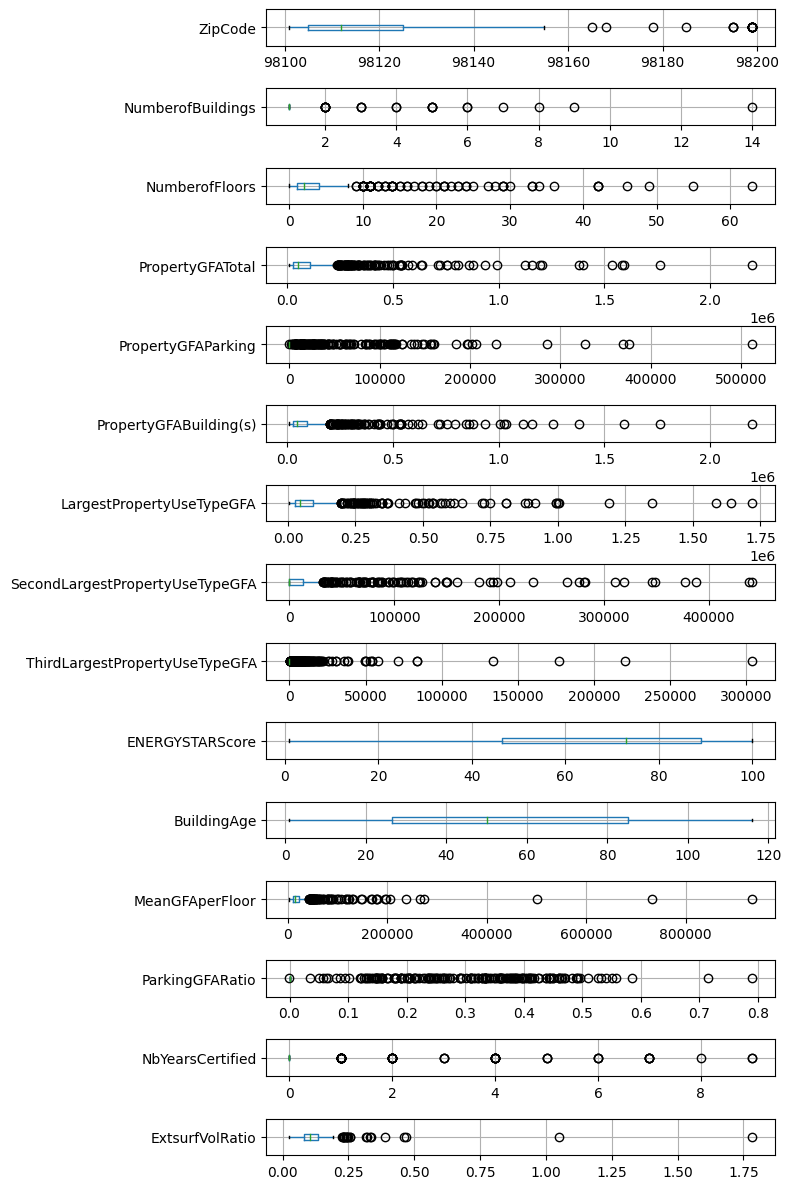

In [107]:
fig, axs = plt.subplots(len(data[prop_Q_cols].columns),1,
                        figsize=(8, 12), sharey=False)
for c, ax in zip(data[prop_Q_cols].columns, axs):
    data.boxplot(c, vert=False, ax=ax)
fig.tight_layout(h_pad=0.051)
plt.show()

target features

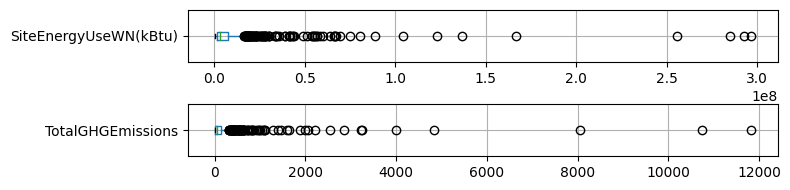

In [108]:
fig, axs = plt.subplots(len(data[['SiteEnergyUseWN(kBtu)',
                                'TotalGHGEmissions']].columns),1,
                        figsize=(8, 2), sharey=False)
for c, ax in zip(data[['SiteEnergyUseWN(kBtu)',
                     'TotalGHGEmissions']].columns, axs):
    data.boxplot(c, vert=False, ax=ax)
fig.tight_layout(h_pad=0.051)
plt.show()

In [109]:
data['NumberofBuildings'][np.abs(st.zscore(data['NumberofBuildings']))>4]

370     6.0
410     7.0
420     6.0
468    14.0
470     9.0
536     5.0
614     5.0
644     5.0
706     5.0
830     8.0
Name: NumberofBuildings, dtype: float64

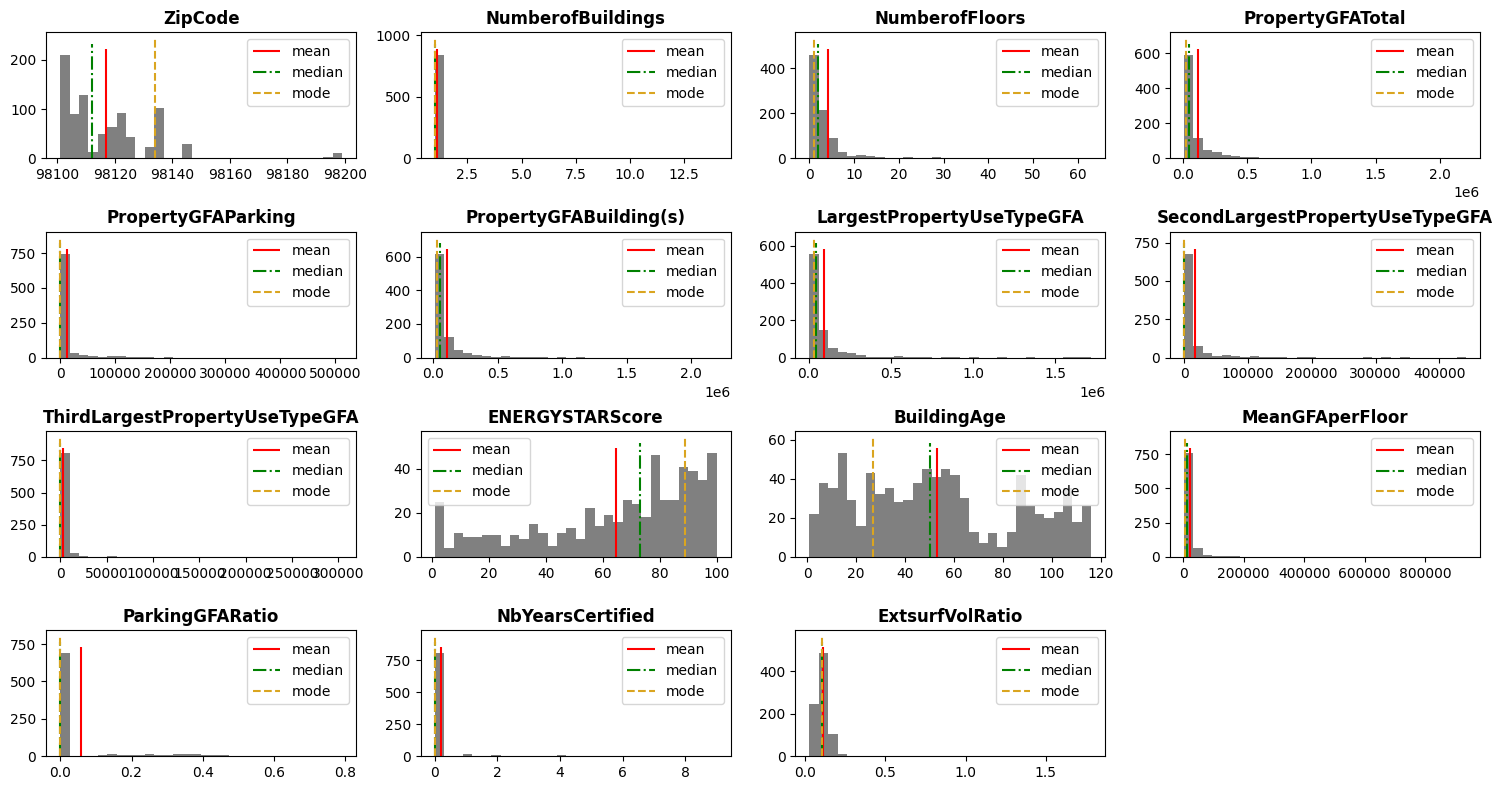

In [110]:
# All the data (with outliers)
plot_histograms(df=data, cols=prop_Q_cols, file_name='2_1_histograms.png',
                figsize=(15,8), bins=30, layout=(4,4), skip_outliers=False,
                thresh=30, save_enabled=False)

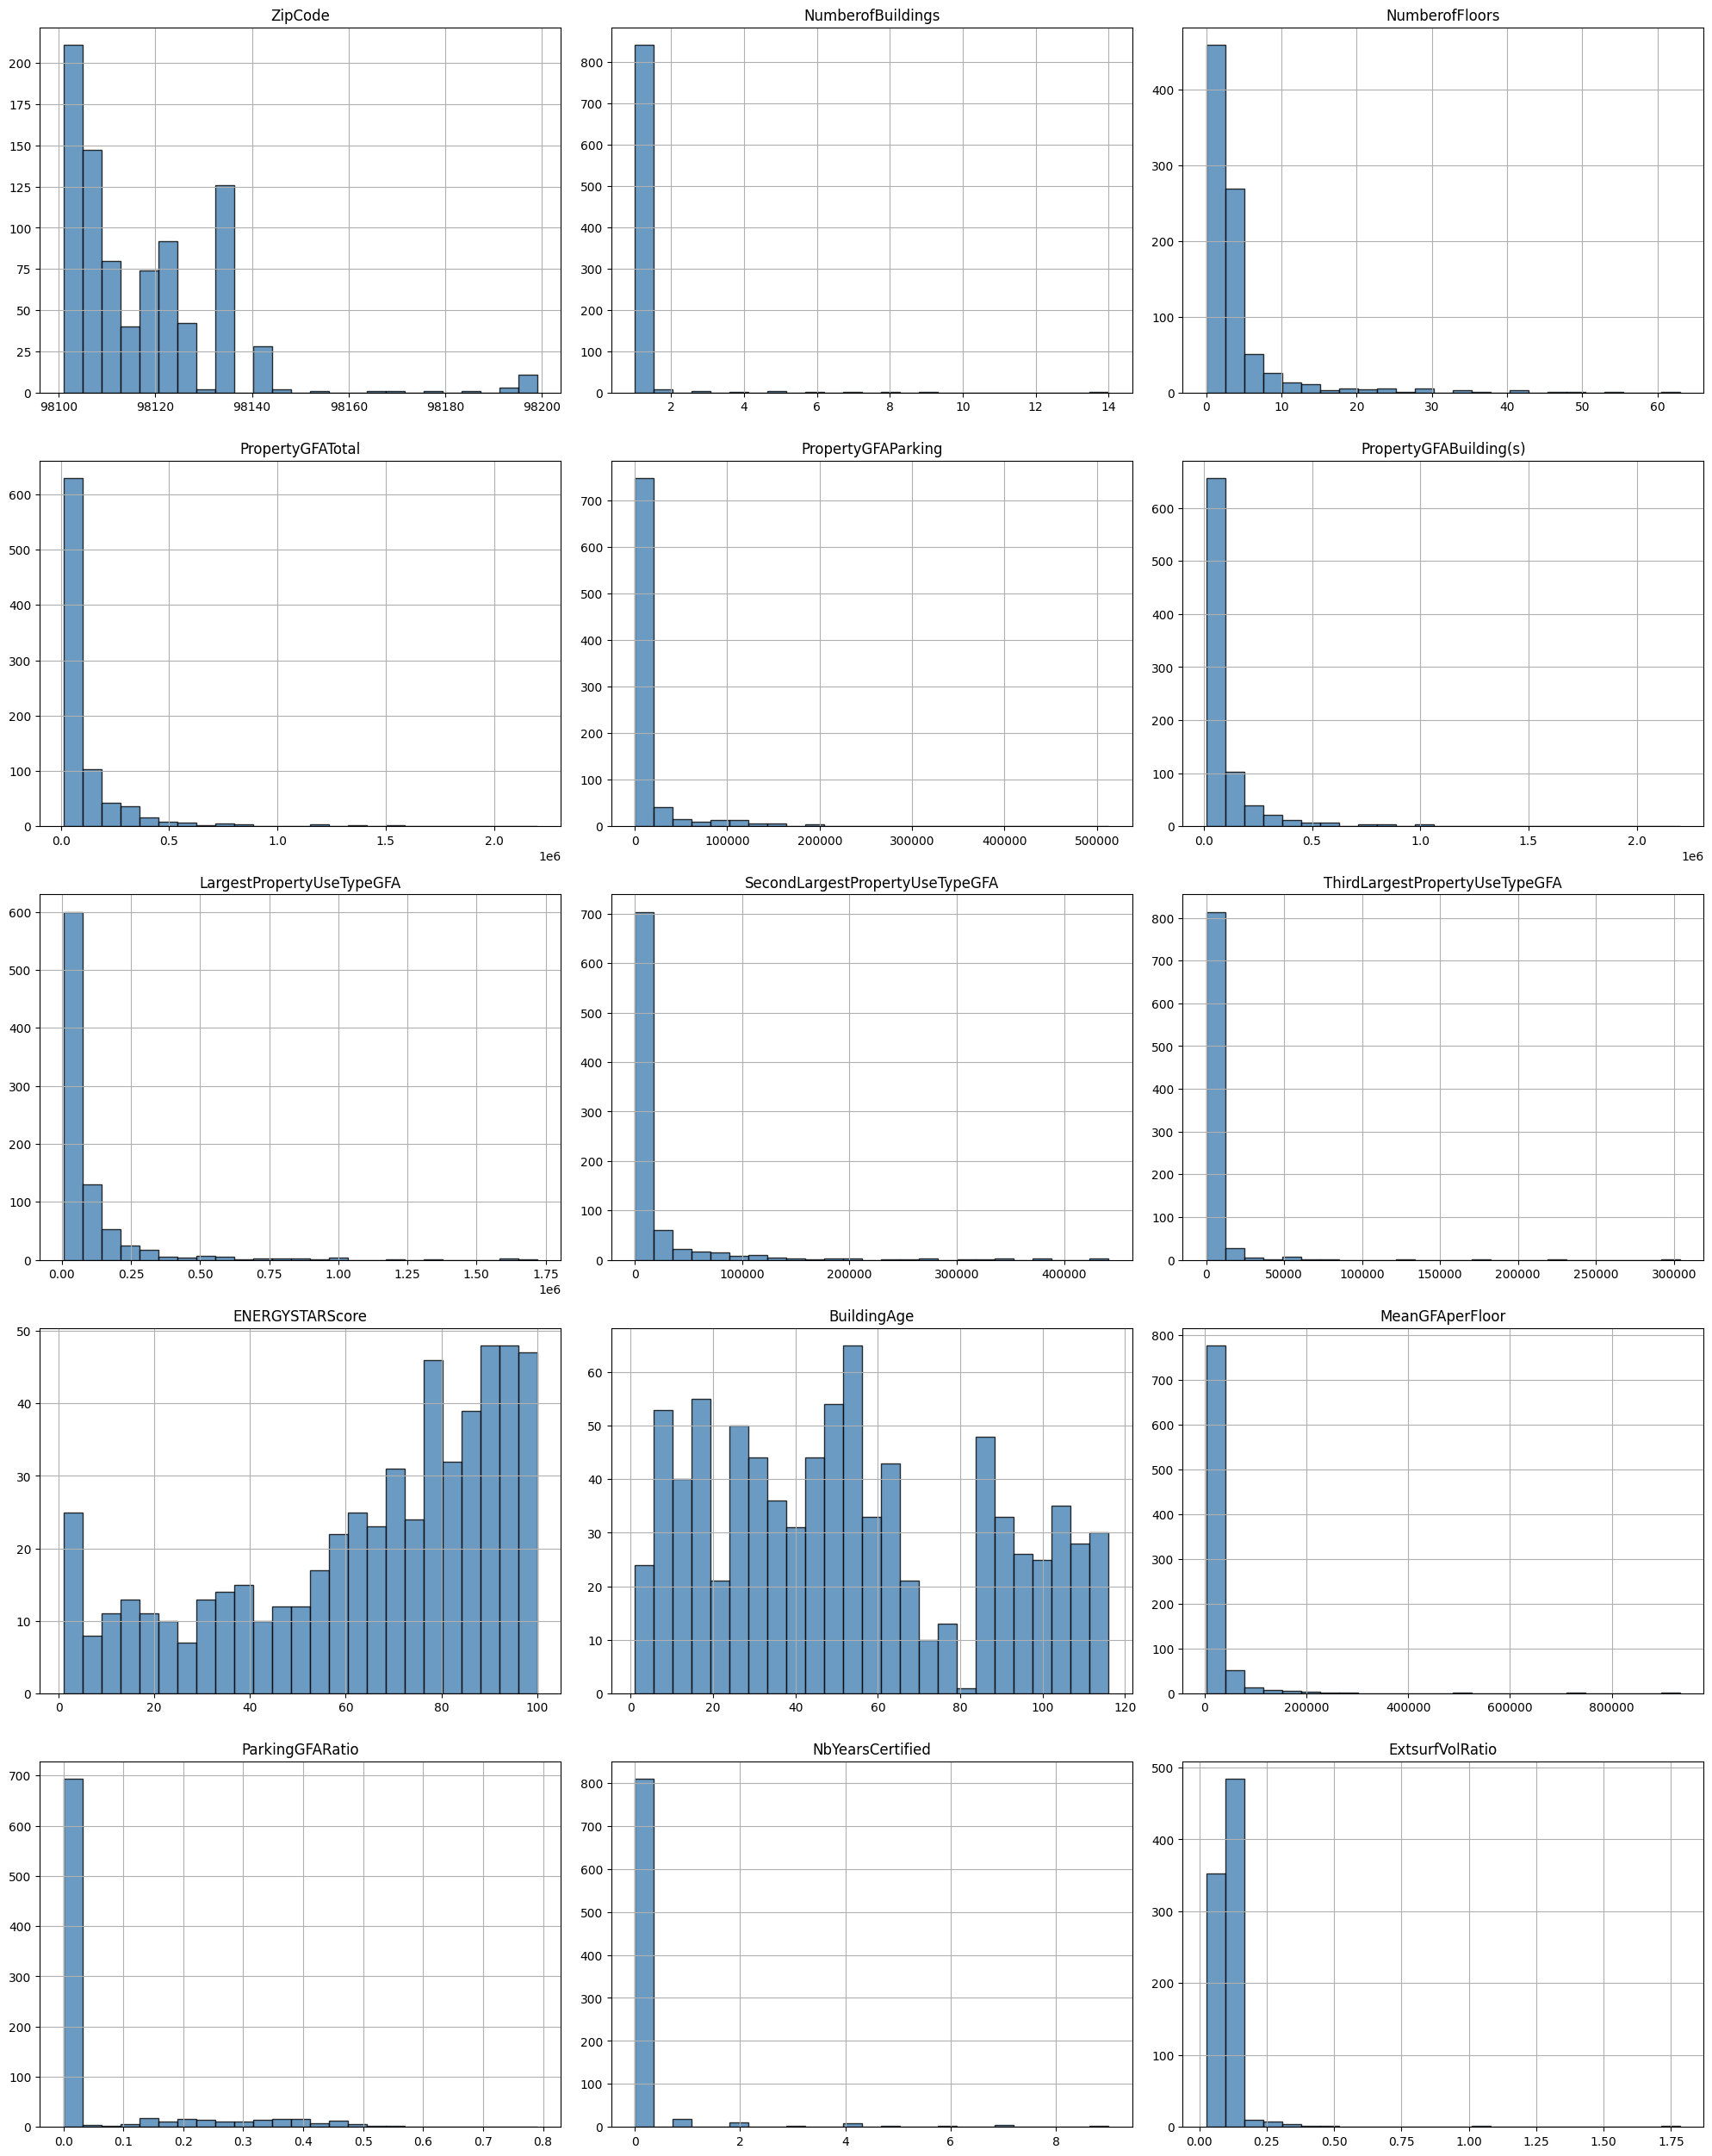

In [111]:
data[prop_Q_cols].hist(bins=25, figsize=(20, 40), layout=(8, 3), 
                   alpha=.8, color='#4682b4', ec="k")
plt.tight_layout()

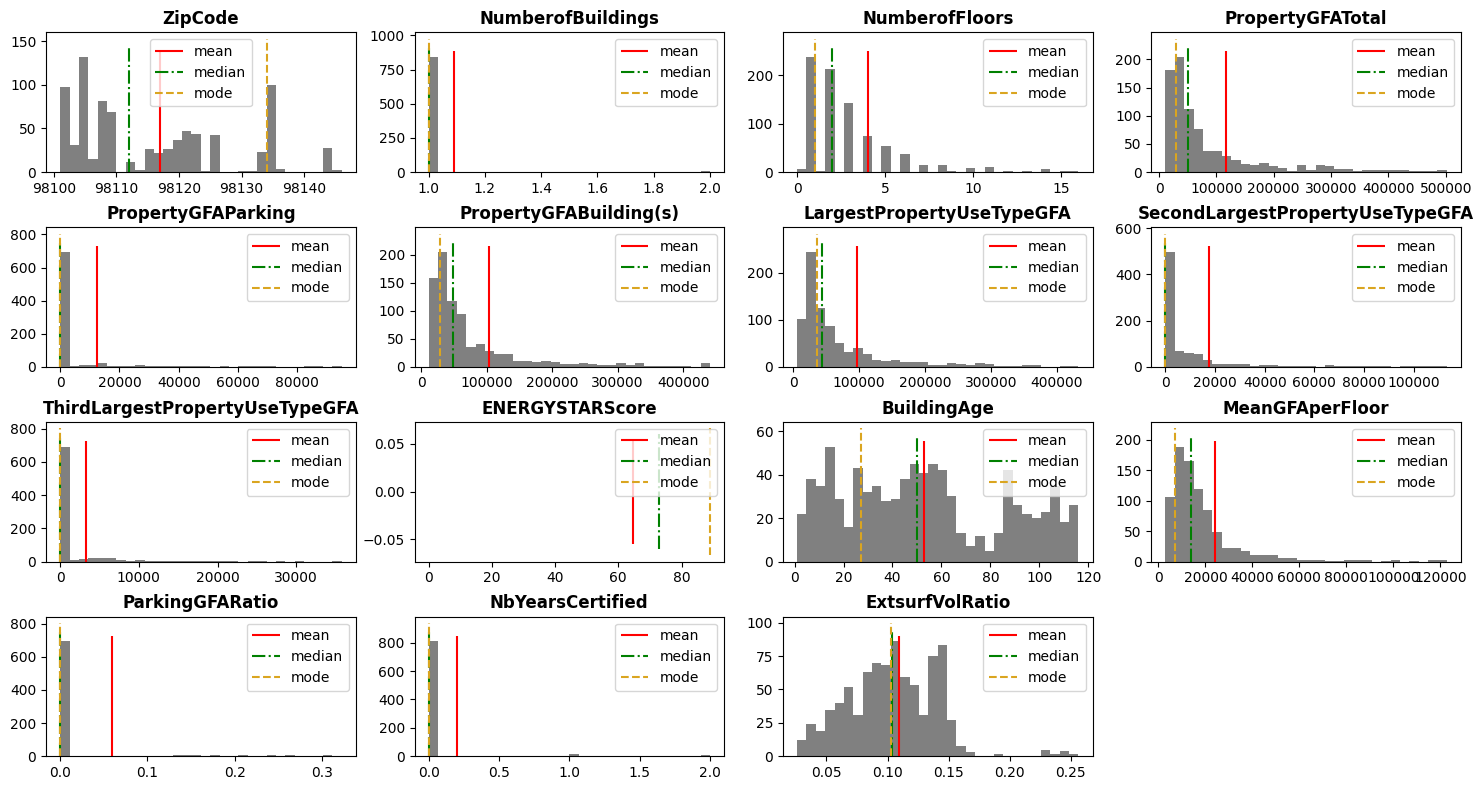

In [112]:
# Excluding outliers to get a better scale
plot_histograms(df=data, cols=prop_Q_cols, file_name='2_1_histograms.png',
                figsize=(15,8), bins=30, layout=(4,4), skip_outliers=True,
                thresh=2, save_enabled=False)

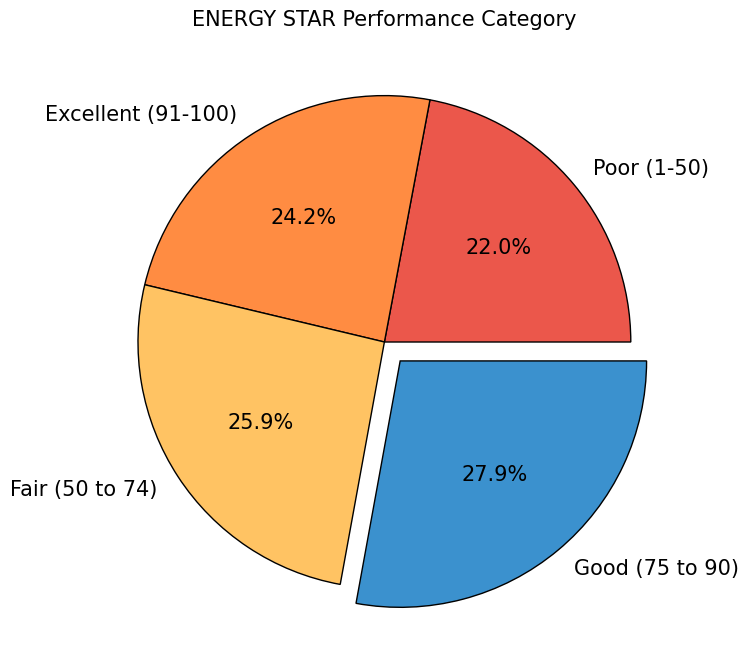

In [113]:
energy = pd.cut(data['ENERGYSTARScore'], [1, 50, 74, 90, 100])  
count = energy.value_counts().sort_values()
category = ['Poor (1-50)', 'Excellent (91-100)', 'Fair (50 to 74)', 'Good (75 to 90)']

fig1, ax = plt.subplots(figsize=(8,8))
ax.pie(count, 
       labels=category,
       explode = [0, 0, 0, .1],
       autopct='%1.1f%%',
       colors = ["#eb574b", "#ff8c42", "#ffc363", "#3b91ce"],
       wedgeprops = {"ec": "k"}, 
       textprops = {"fontsize": 15}) 
ax.set_title('ENERGY STAR Performance Category', {"fontsize": 15})
plt.show()

None of the quantitative independant data have normal distribution.

* Histograms of target features

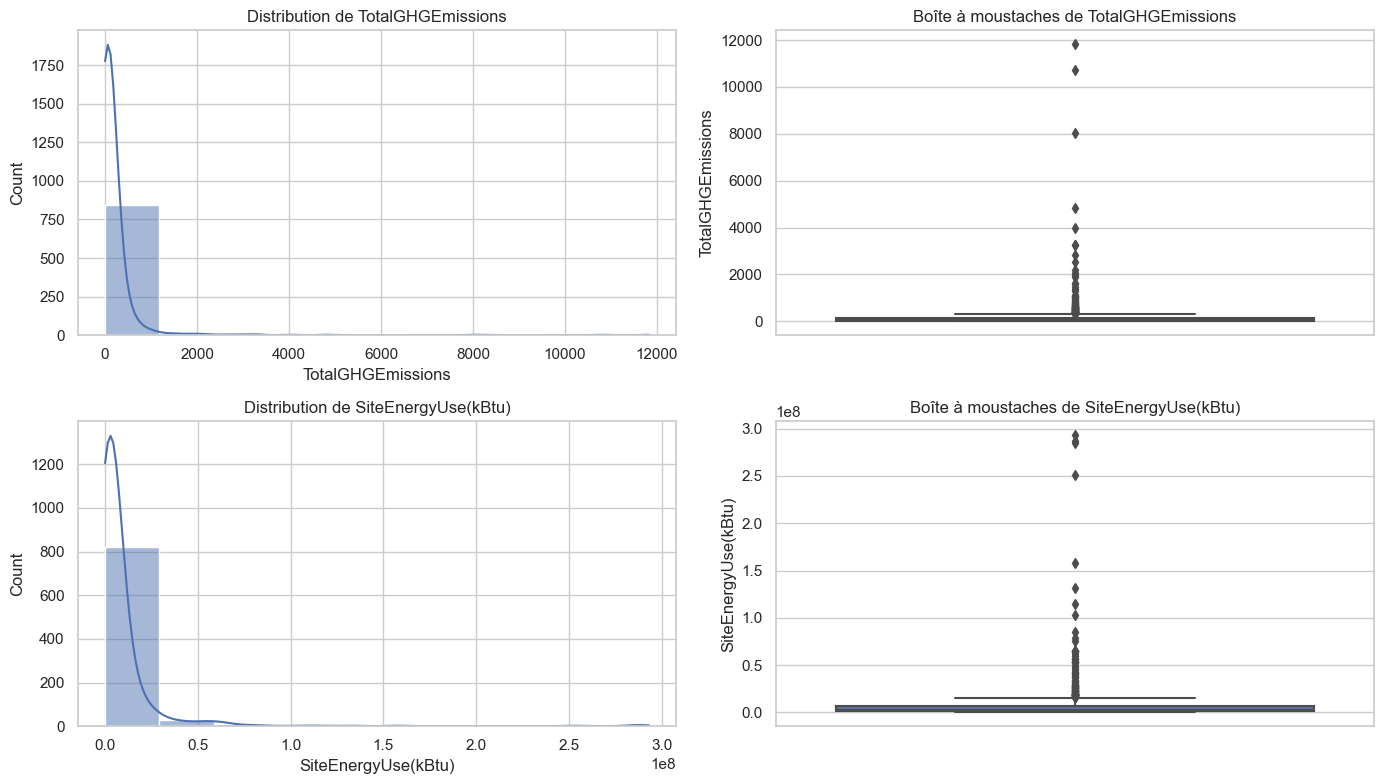

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt

# Définir le style de Seaborn (facultatif)
sns.set(style="whitegrid")

# Créer une figure avec deux sous-graphiques
fig, axes = plt.subplots(2, 2, figsize=(14, 8))

# Variables à visualiser
variables = ["TotalGHGEmissions", "SiteEnergyUse(kBtu)"]

# Boucle sur les variables
for i, var in enumerate(variables):
    # Histogramme
    sns.histplot(data=data, x=var, bins=int(1 + np.log2(len(data))), ax=axes[i, 0], kde=True)
    axes[i, 0].set_title(f'Distribution de {var}')

    # Boîte à moustaches (boxplot)
    sns.boxplot(data=data, y=var, ax=axes[i, 1])
    axes[i, 1].set_title(f'Boîte à moustaches de {var}')

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()

# Afficher la figure
plt.show()


 We include new columns: log of SiteEnergyUseWN(kBtu) and log of TotalGHGEmissions to obtain data distribution closer to normal.

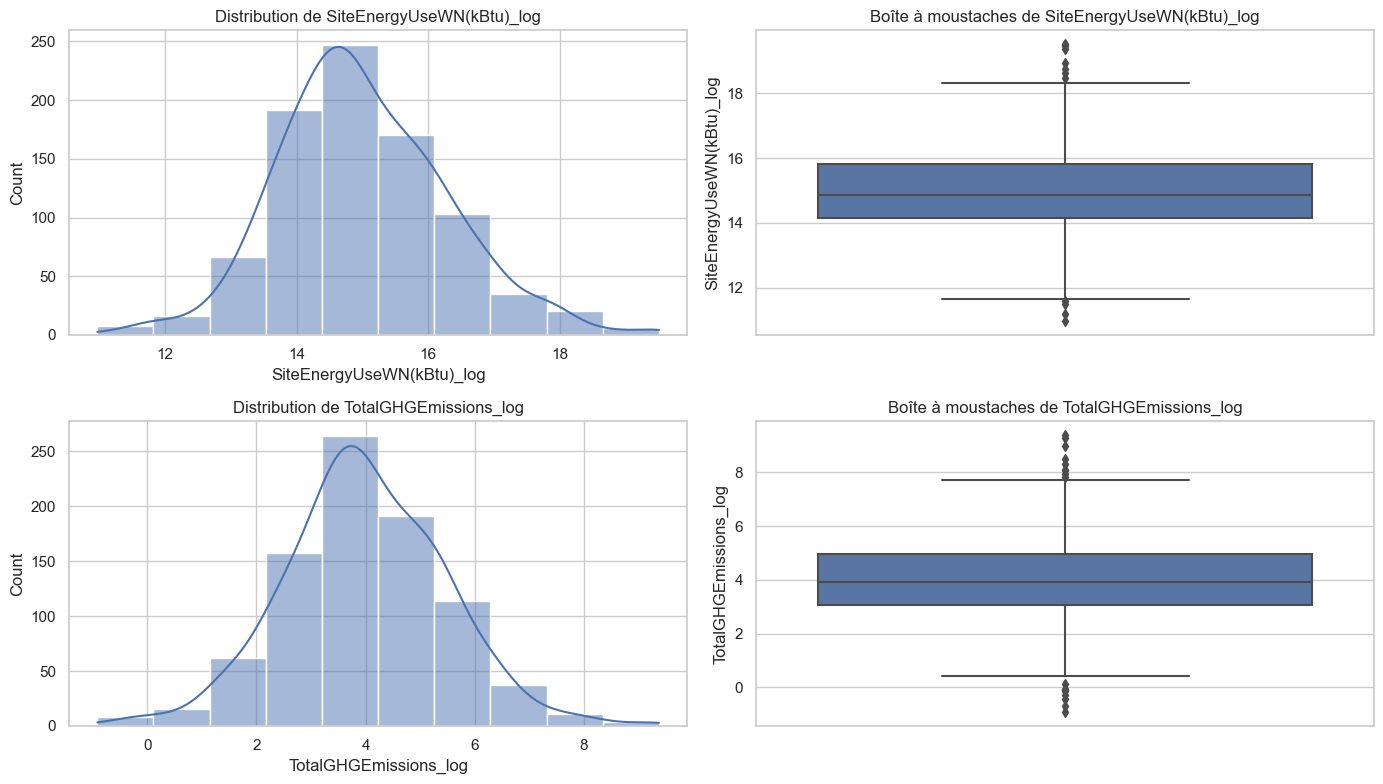

In [115]:
data['SiteEnergyUseWN(kBtu)_log'] = np.log(data['SiteEnergyUseWN(kBtu)'])
data['TotalGHGEmissions_log'] = np.log(data['TotalGHGEmissions'])

import seaborn as sns
import matplotlib.pyplot as plt

# Définir le style de Seaborn (facultatif)
sns.set(style="whitegrid")

# Créer une figure avec deux sous-graphiques
fig, axes = plt.subplots(2, 2, figsize=(14, 8))

# Variables à visualiser
variables = ["SiteEnergyUseWN(kBtu)_log", "TotalGHGEmissions_log"]

# Boucle sur les variables
for i, var in enumerate(variables):
    # Histogramme
    sns.histplot(data=data, x=var, bins=int(1 + np.log2(len(data))), ax=axes[i, 0], kde=True)
    axes[i, 0].set_title(f'Distribution de {var}')

    # Boîte à moustaches (boxplot)
    sns.boxplot(data=data, y=var, ax=axes[i, 1])
    axes[i, 1].set_title(f'Boîte à moustaches de {var}')

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()

# Afficher la figure
plt.show()


Les distributions des données cibles ne sont toujours pas normales au sens statistique, mais elles s'en rapprochent.

Graphiques QQ et tests de normalité des caractéristiques indépendantes

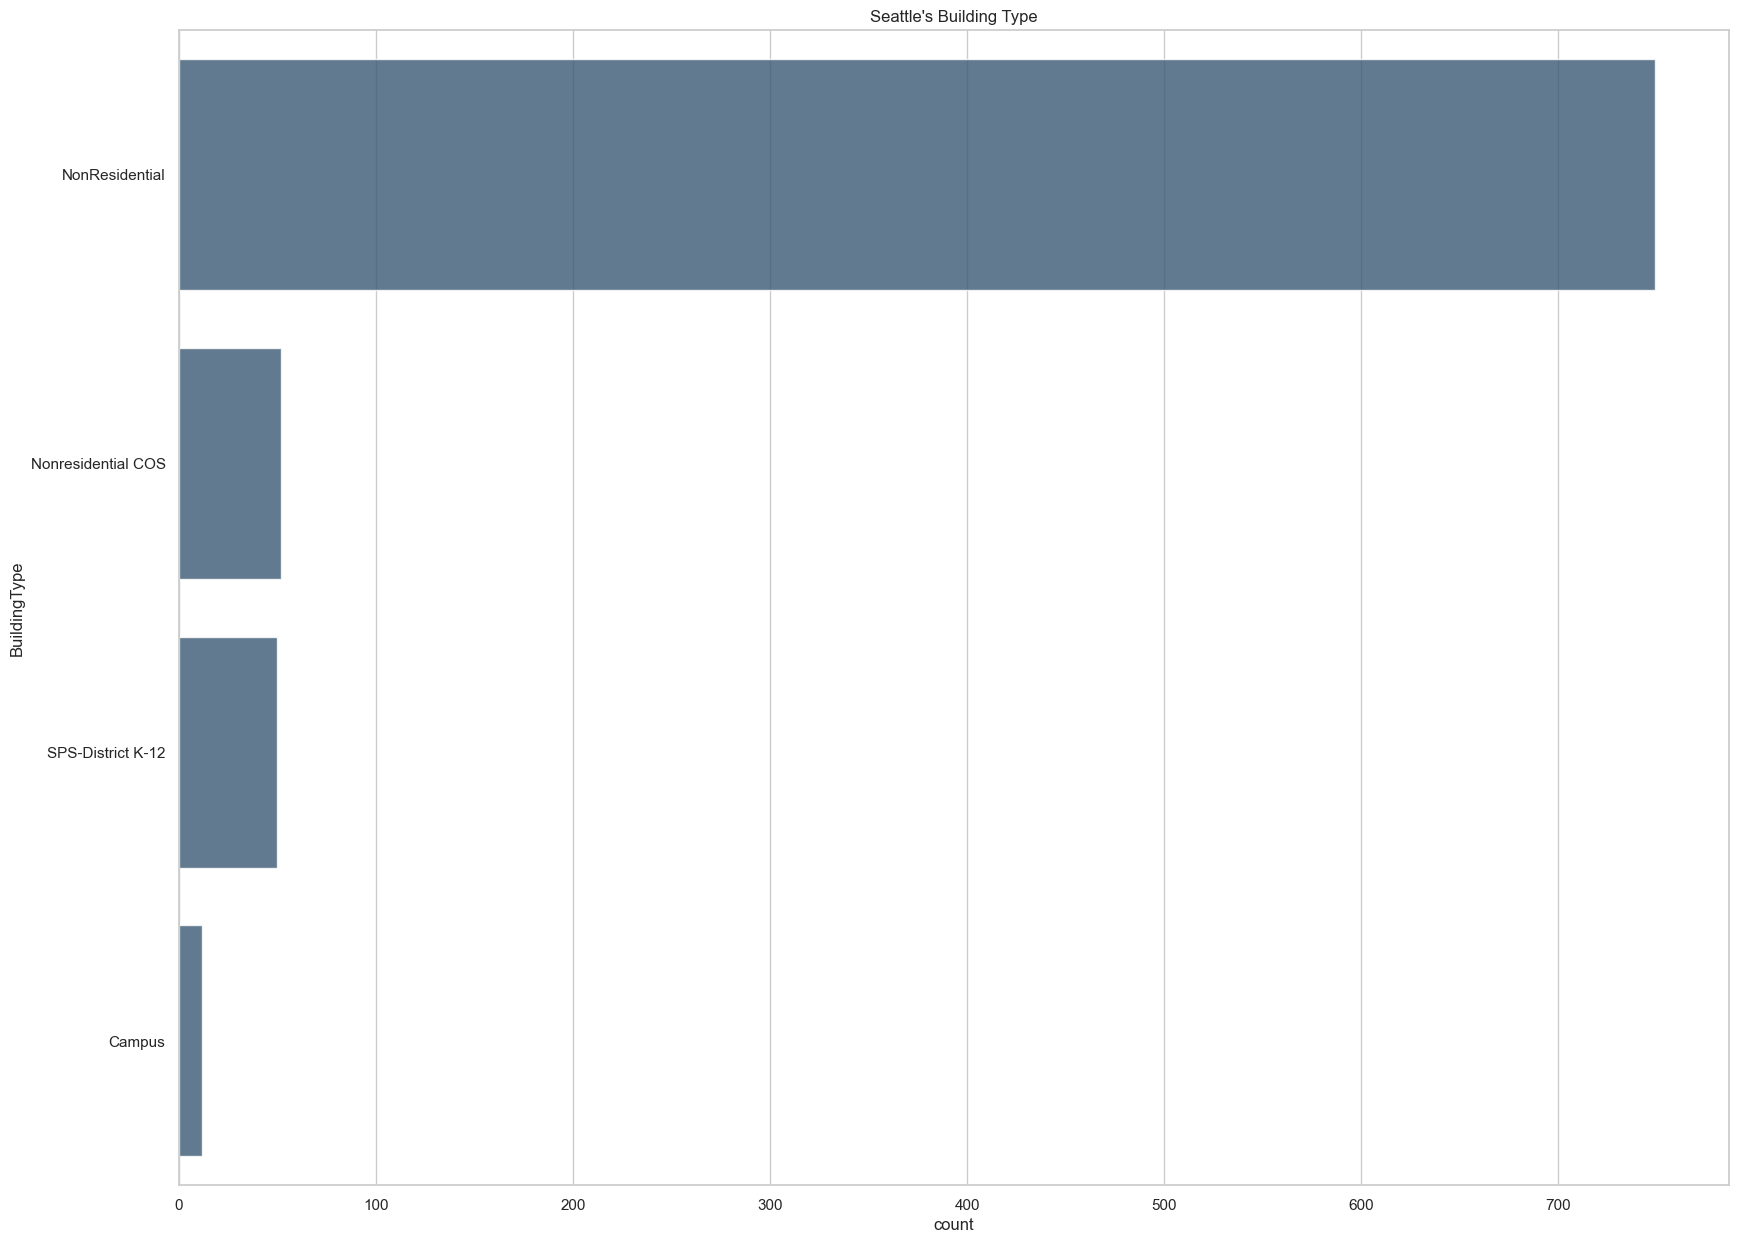

In [116]:
#BuildingType
ax, fig = plt.subplots(figsize=(20,15)) 
ax = sns.countplot(data=data, y='BuildingType', color="#315a7d", alpha=.8,
              order=data['BuildingType'].value_counts().index, orient='horizontal')
ax.set_title("Seattle's Building Type")
plt.show()

c:\ProgramData\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.2980392156862745, 0.4470588235294118, 0.6901960784313725, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


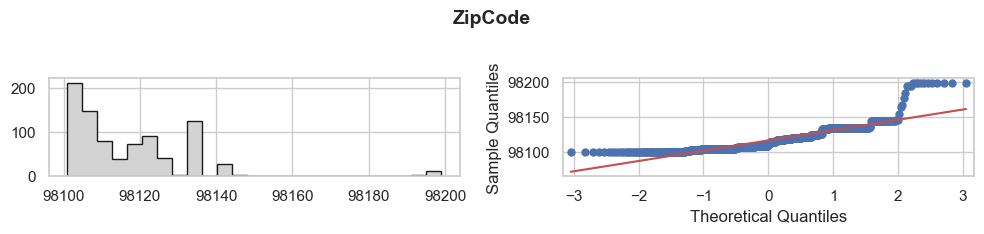

stat  p_value  \
Shapiro-Wilk       0.782    0.000   
D'Agostino K^2   436.972    0.000   
Anderson-Darling  36.366      NaN   

                                                                             res  
Shapiro-Wilk                                                               False  
D'Agostino K^2                                                           [False]  
Anderson-Darling  [(15, False), (10, False), (5, False), (2, False), (1, False)]

c:\ProgramData\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.2980392156862745, 0.4470588235294118, 0.6901960784313725, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


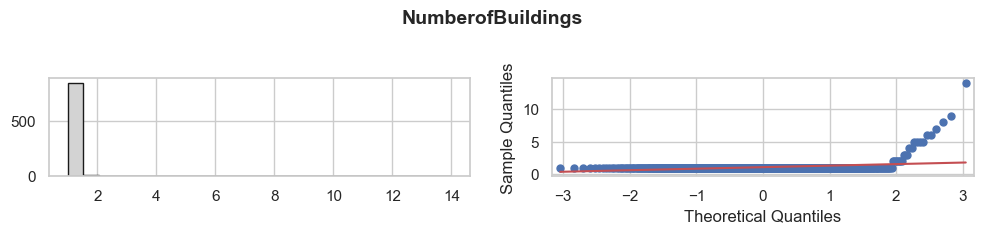

stat  p_value  \
Shapiro-Wilk         0.107    0.000   
D'Agostino K^2   1,475.346    0.000   
Anderson-Darling   313.048      NaN   

                                                                             res  
Shapiro-Wilk                                                               False  
D'Agostino K^2                                                           [False]  
Anderson-Darling  [(15, False), (10, False), (5, False), (2, False), (1, False)]

c:\ProgramData\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.2980392156862745, 0.4470588235294118, 0.6901960784313725, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


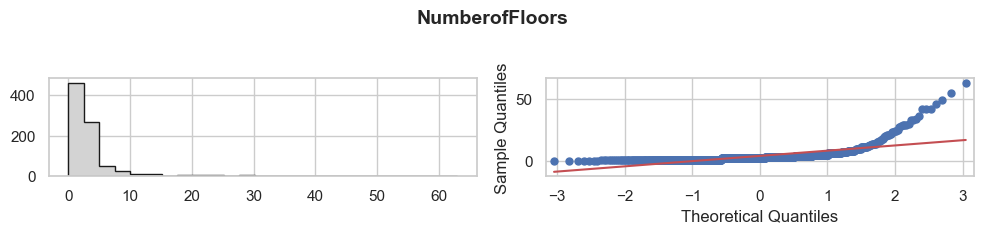

stat  p_value  \
Shapiro-Wilk       0.477    0.000   
D'Agostino K^2   876.293    0.000   
Anderson-Darling 133.372      NaN   

                                                                             res  
Shapiro-Wilk                                                               False  
D'Agostino K^2                                                           [False]  
Anderson-Darling  [(15, False), (10, False), (5, False), (2, False), (1, False)]

c:\ProgramData\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.2980392156862745, 0.4470588235294118, 0.6901960784313725, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


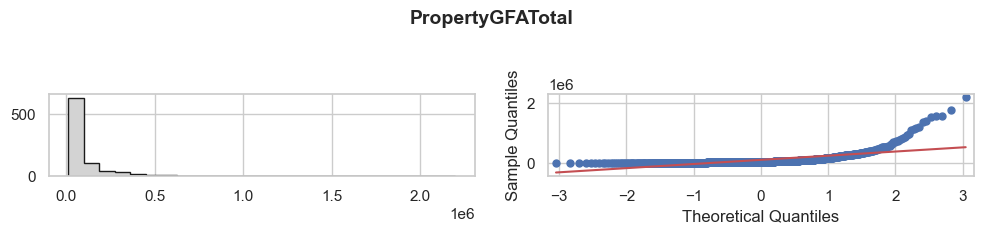

stat  p_value  \
Shapiro-Wilk       0.462    0.000   
D'Agostino K^2   904.424    0.000   
Anderson-Darling 139.935      NaN   

                                                                             res  
Shapiro-Wilk                                                               False  
D'Agostino K^2                                                           [False]  
Anderson-Darling  [(15, False), (10, False), (5, False), (2, False), (1, False)]

c:\ProgramData\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.2980392156862745, 0.4470588235294118, 0.6901960784313725, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


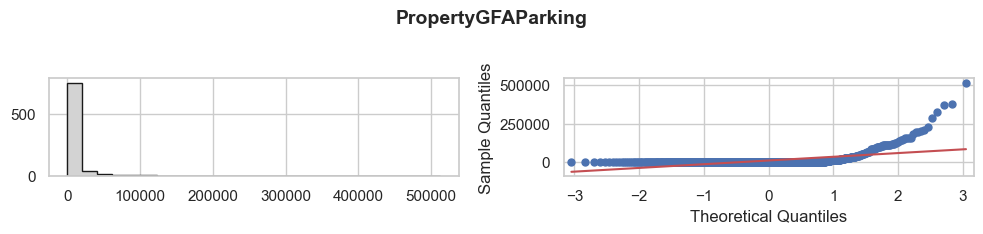

stat  p_value  \
Shapiro-Wilk         0.334    0.000   
D'Agostino K^2   1,005.259    0.000   
Anderson-Darling   219.591      NaN   

                                                                             res  
Shapiro-Wilk                                                               False  
D'Agostino K^2                                                           [False]  
Anderson-Darling  [(15, False), (10, False), (5, False), (2, False), (1, False)]

c:\ProgramData\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.2980392156862745, 0.4470588235294118, 0.6901960784313725, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


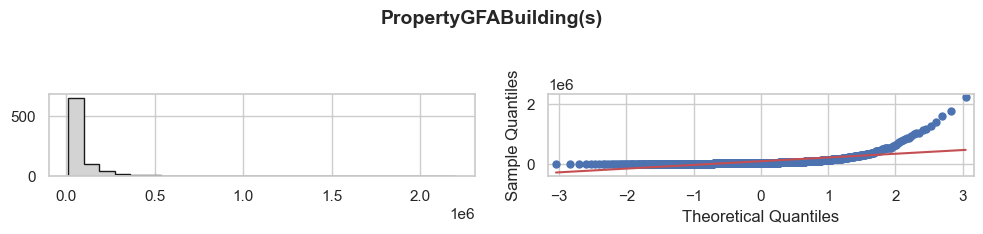

stat  p_value  \
Shapiro-Wilk       0.439    0.000   
D'Agostino K^2   969.044    0.000   
Anderson-Darling 146.546      NaN   

                                                                             res  
Shapiro-Wilk                                                               False  
D'Agostino K^2                                                           [False]  
Anderson-Darling  [(15, False), (10, False), (5, False), (2, False), (1, False)]

c:\ProgramData\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.2980392156862745, 0.4470588235294118, 0.6901960784313725, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


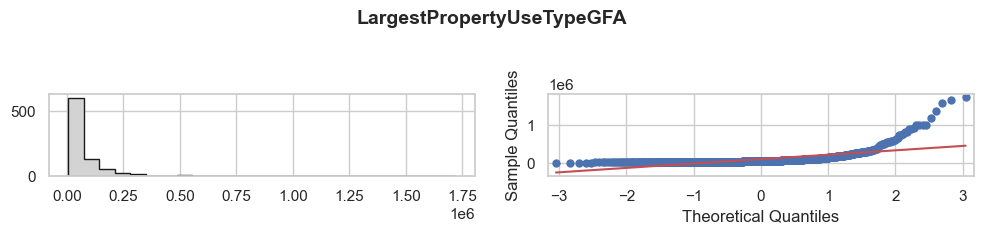

stat  p_value  \
Shapiro-Wilk       0.455    0.000   
D'Agostino K^2   913.815    0.000   
Anderson-Darling 142.032      NaN   

                                                                             res  
Shapiro-Wilk                                                               False  
D'Agostino K^2                                                           [False]  
Anderson-Darling  [(15, False), (10, False), (5, False), (2, False), (1, False)]

c:\ProgramData\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.2980392156862745, 0.4470588235294118, 0.6901960784313725, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


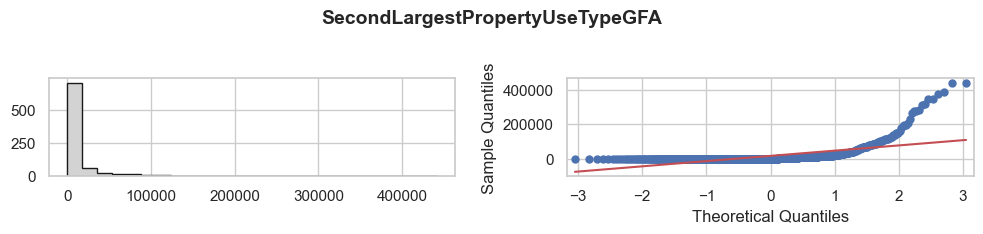

stat  p_value  \
Shapiro-Wilk       0.391    0.000   
D'Agostino K^2   911.723    0.000   
Anderson-Darling 178.161      NaN   

                                                                             res  
Shapiro-Wilk                                                               False  
D'Agostino K^2                                                           [False]  
Anderson-Darling  [(15, False), (10, False), (5, False), (2, False), (1, False)]

c:\ProgramData\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.2980392156862745, 0.4470588235294118, 0.6901960784313725, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


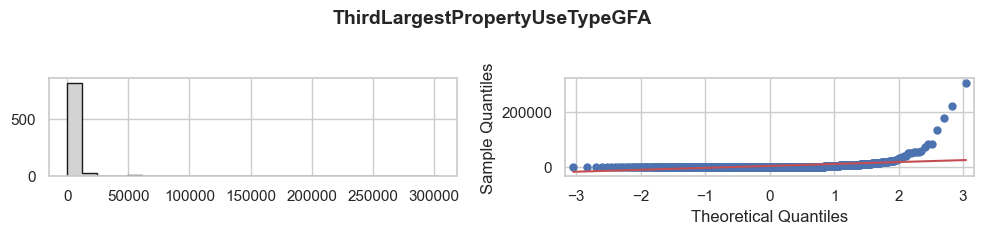

stat  p_value  \
Shapiro-Wilk         0.181    0.000   
D'Agostino K^2   1,531.429    0.000   
Anderson-Darling   239.931      NaN   

                                                                             res  
Shapiro-Wilk                                                               False  
D'Agostino K^2                                                           [False]  
Anderson-Darling  [(15, False), (10, False), (5, False), (2, False), (1, False)]

c:\ProgramData\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.2980392156862745, 0.4470588235294118, 0.6901960784313725, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


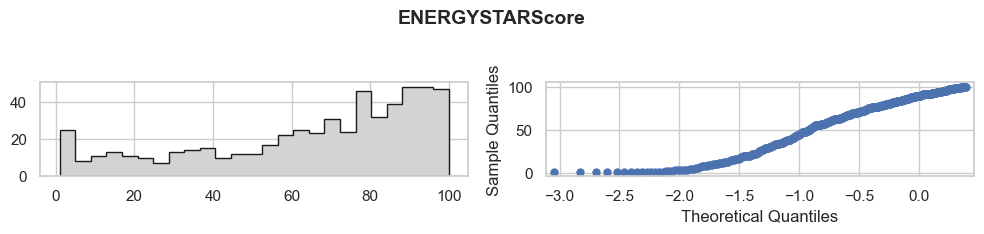

stat  p_value  \
Shapiro-Wilk      0.900    0.000   
D'Agostino K^2   59.030    0.000   
Anderson-Darling 18.041      NaN   

                                                                             res  
Shapiro-Wilk                                                               False  
D'Agostino K^2                                                           [False]  
Anderson-Darling  [(15, False), (10, False), (5, False), (2, False), (1, False)]

c:\ProgramData\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.2980392156862745, 0.4470588235294118, 0.6901960784313725, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


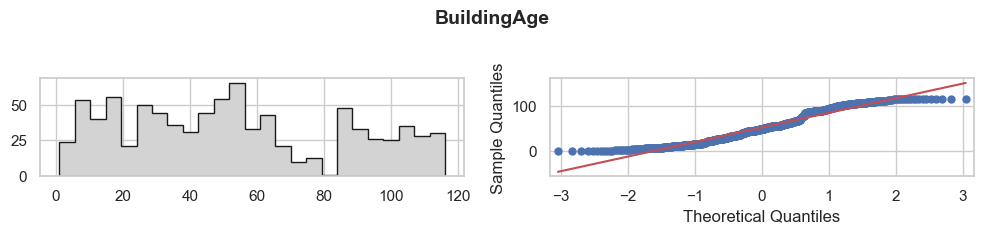

stat  p_value  \
Shapiro-Wilk       0.947    0.000   
D'Agostino K^2   235.699    0.000   
Anderson-Darling  12.451      NaN   

                                                                             res  
Shapiro-Wilk                                                               False  
D'Agostino K^2                                                           [False]  
Anderson-Darling  [(15, False), (10, False), (5, False), (2, False), (1, False)]

c:\ProgramData\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.2980392156862745, 0.4470588235294118, 0.6901960784313725, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


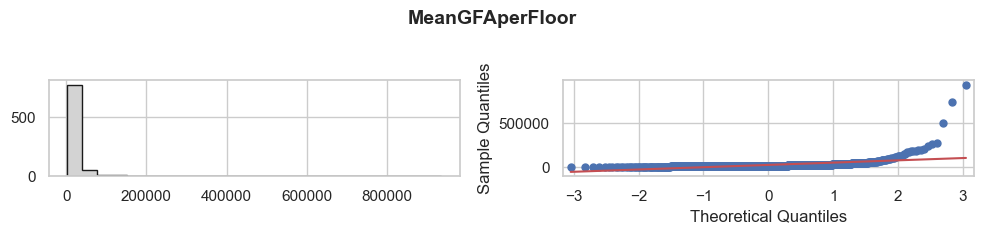

stat  p_value  \
Shapiro-Wilk         0.265    0.000   
D'Agostino K^2   1,513.549    0.000   
Anderson-Darling   178.056      NaN   

                                                                             res  
Shapiro-Wilk                                                               False  
D'Agostino K^2                                                           [False]  
Anderson-Darling  [(15, False), (10, False), (5, False), (2, False), (1, False)]

c:\ProgramData\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.2980392156862745, 0.4470588235294118, 0.6901960784313725, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


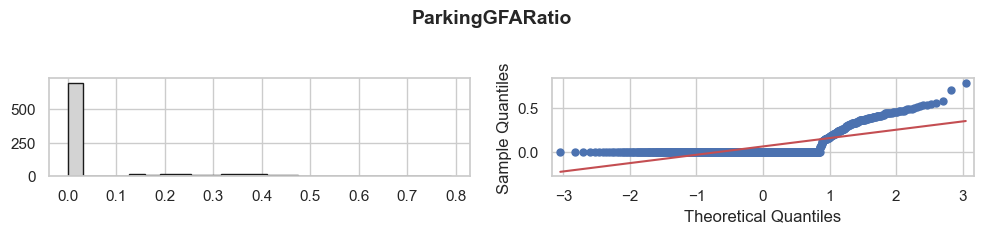

stat  p_value  \
Shapiro-Wilk       0.510    0.000   
D'Agostino K^2   386.443    0.000   
Anderson-Darling 202.937      NaN   

                                                                             res  
Shapiro-Wilk                                                               False  
D'Agostino K^2                                                           [False]  
Anderson-Darling  [(15, False), (10, False), (5, False), (2, False), (1, False)]

c:\ProgramData\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.2980392156862745, 0.4470588235294118, 0.6901960784313725, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


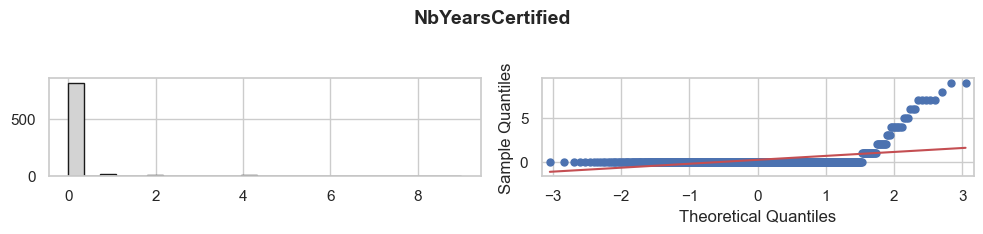

stat  p_value  \
Shapiro-Wilk         0.212    0.000   
D'Agostino K^2   1,003.827    0.000   
Anderson-Darling   287.052      NaN   

                                                                             res  
Shapiro-Wilk                                                               False  
D'Agostino K^2                                                           [False]  
Anderson-Darling  [(15, False), (10, False), (5, False), (2, False), (1, False)]

c:\ProgramData\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.2980392156862745, 0.4470588235294118, 0.6901960784313725, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


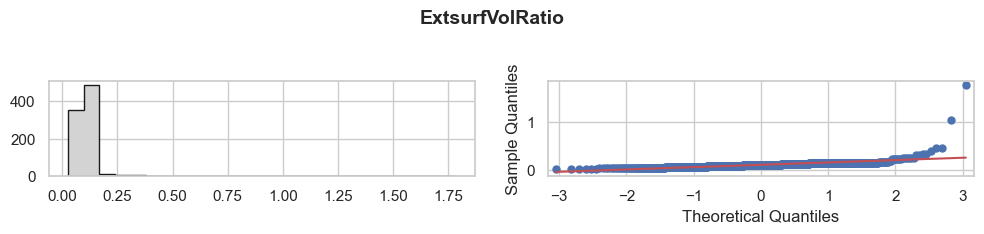

stat  p_value  \
Shapiro-Wilk         0.396    0.000   
D'Agostino K^2   1,637.618    0.000   
Anderson-Darling    82.872      NaN   

                                                                             res  
Shapiro-Wilk                                                               False  
D'Agostino K^2                                                           [False]  
Anderson-Darling  [(15, False), (10, False), (5, False), (2, False), (1, False)]

In [117]:
for i, c in enumerate(data[prop_Q_cols].columns,1):
    plot_hist_qqplot(data[c].values, c, save=False)
    plt.show()
    with pd.option_context('display.float_format', '{:,.3f}'.format):
        display(normality_tests(data[c], print_opt=False))

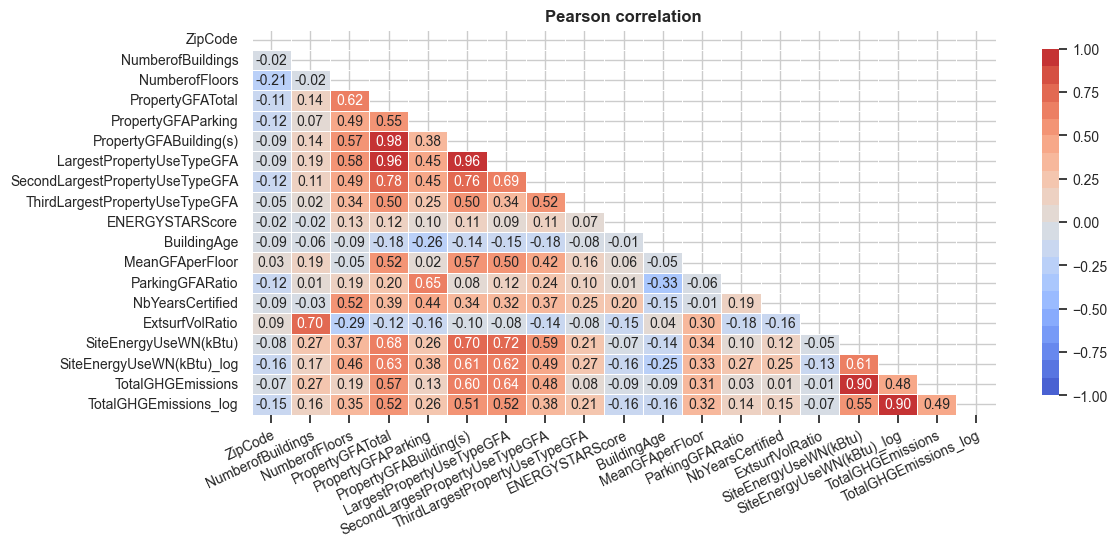

In [118]:
pears_corr = data[prop_Q_cols+['SiteEnergyUseWN(kBtu)', 'SiteEnergyUseWN(kBtu)_log',
                             'TotalGHGEmissions', 'TotalGHGEmissions_log']].corr()
plot_heatmap(pears_corr, shape='tri',
             title="Pearson correlation", figsize=(12,5))

plt.show()

Correlation tests between independant features

In [119]:
test_couples = [('PropertyGFATotal','PropertyGFABuilding(s)'),
                ('PropertyGFATotal','LargestPropertyUseTypeGFA'),
                ('PropertyGFATotal','NumberofFloors'),
                ('PropertyGFATotal','PropertyGFAParking'),
                ('ParkingGFARatio','PropertyGFAParking'),
                ('NumberofFloors','LargestPropertyUseTypeGFA'),
                ('MeanGFAperFloor','PropertyGFABuilding(s)'),
                ('SecondLargestPropertyUseTypeGFA','ThirdLargestPropertyUseTypeGFA'),
                ('NumberofFloors','PropertyGFABuilding(s)'),
                ('ParkingGFARatio','BuildingAge'),
                ('NumberofFloors','BuildingAge'),
                ('NumberofBuildings','NbYearsCertified')]

for tup in test_couples:
    print('------'+str(tup).upper()+'-----')
    c1, c2 = tup
    display(correlation_tests(data[c1], data[c2], print_opt=False))
del tup

------('PROPERTYGFATOTAL', 'PROPERTYGFABUILDING(S)')-----


stat  p_value
Pearson   0.982105      0.0
Spearman  0.983009      0.0
Kendall   0.932037      0.0

------('PROPERTYGFATOTAL', 'LARGESTPROPERTYUSETYPEGFA')-----


stat        p_value
Pearson   0.959323   0.000000e+00
Spearman  0.924744   0.000000e+00
Kendall   0.789271  6.492096e-264

------('PROPERTYGFATOTAL', 'NUMBEROFFLOORS')-----


stat       p_value
Pearson   0.619570  1.248194e-92
Spearman  0.511614  9.678753e-59
Kendall   0.390072  6.457529e-57

------('PROPERTYGFATOTAL', 'PROPERTYGFAPARKING')-----


stat       p_value
Pearson   0.550368  1.697273e-69
Spearman  0.412740  7.935335e-37
Kendall   0.338145  2.363619e-37

------('PARKINGGFARATIO', 'PROPERTYGFAPARKING')-----


stat        p_value
Pearson   0.650192  7.720935e-105
Spearman  0.991587   0.000000e+00
Kendall   0.926983  1.285207e-198

------('NUMBEROFFLOORS', 'LARGESTPROPERTYUSETYPEGFA')-----


stat       p_value
Pearson   0.579082  1.998617e-78
Spearman  0.458271  4.975323e-46
Kendall   0.349310  5.392109e-46

------('MEANGFAPERFLOOR', 'PROPERTYGFABUILDING(S)')-----


stat        p_value
Pearson   0.565352   4.783440e-74
Spearman  0.727168  7.902566e-143
Kendall   0.544135  1.604739e-126

------('SECONDLARGESTPROPERTYUSETYPEGFA', 'THIRDLARGESTPROPERTYUSETYPEGFA')-----


stat       p_value
Pearson   0.524168  4.498160e-62
Spearman  0.578011  4.464979e-78
Kendall   0.509468  4.940740e-71

------('NUMBEROFFLOORS', 'PROPERTYGFABUILDING(S)')-----


stat       p_value
Pearson   0.574294  7.101782e-77
Spearman  0.478967  1.071449e-50
Kendall   0.365335  3.798915e-50

------('PARKINGGFARATIO', 'BUILDINGAGE')-----


stat       p_value
Pearson  -0.327696  4.739881e-23
Spearman -0.330743  1.782945e-23
Kendall  -0.259492  1.810935e-22

------('NUMBEROFFLOORS', 'BUILDINGAGE')-----


stat   p_value
Pearson  -0.090269  0.007969
Spearman -0.095757  0.004871
Kendall  -0.060462  0.014206

------('NUMBEROFBUILDINGS', 'NBYEARSCERTIFIED')-----


stat   p_value
Pearson  -0.025683  0.451133
Spearman -0.041755  0.220434
Kendall  -0.041019  0.220234

#### PCA

In [120]:
data[prop_Q_cols].shape, data[prop_C_cols].shape

((863, 15), (863, 10))

In [121]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

np.set_printoptions(formatter={'float': '{: 6.2f}'.format})
df_pca = data.loc[:, prop_Q_cols].dropna(how='any')
id_code = df_pca.index
X = df_pca.values

X_sc = StandardScaler().fit_transform(X)

n_comp = 11
pca = PCA(n_components=n_comp).fit(X_sc)

pca_df = pd.DataFrame(pca.components_,
                      index=['PC'+str(i+1) for i in range(n_comp)],
                      columns=prop_Q_cols).T

X_proj = pca.transform(X_sc)

Plotting principal components

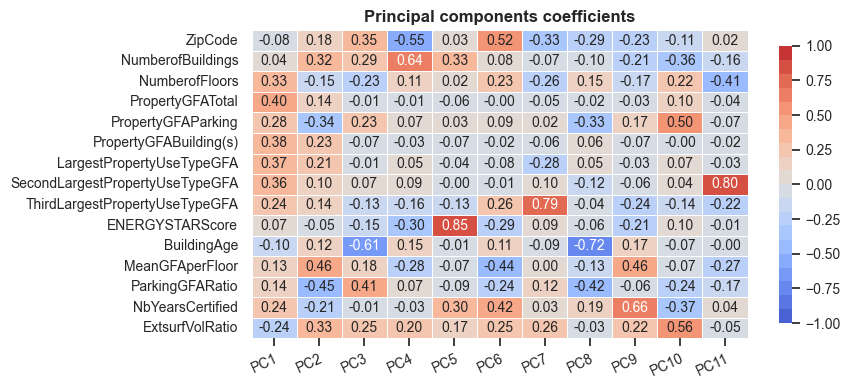

In [122]:
plot_heatmap(pca_df,'Principal components coefficients', vmin=-1, vmax=1, center=0,
             palette=sns.color_palette("coolwarm", 20),figsize=(8,4),shape='rect')
plt.show()

Plotting explained variance ratio in scree plot

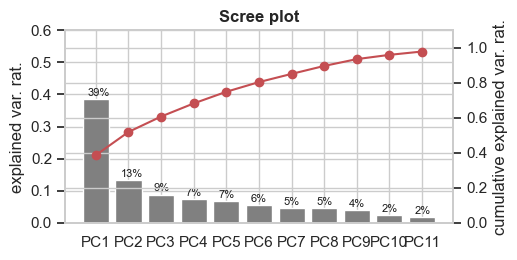

In [123]:
exp_var_rat = pca.explained_variance_ratio_
scree_plot(col_names= pca_df.columns, exp_var_rat=exp_var_rat,
           ylim=(0,0.6), figsize=(5,2.5))
plt.show()

First 4 principal components explain 78% of the variance of the data.
We may try to use the principal components later for our model.

In [124]:
pca.explained_variance_ratio_

array([  0.39,   0.13,   0.09,   0.07,   0.07,   0.06,   0.05,   0.05,
         0.04,   0.02,   0.02])

In [125]:
x_y = (0,1)

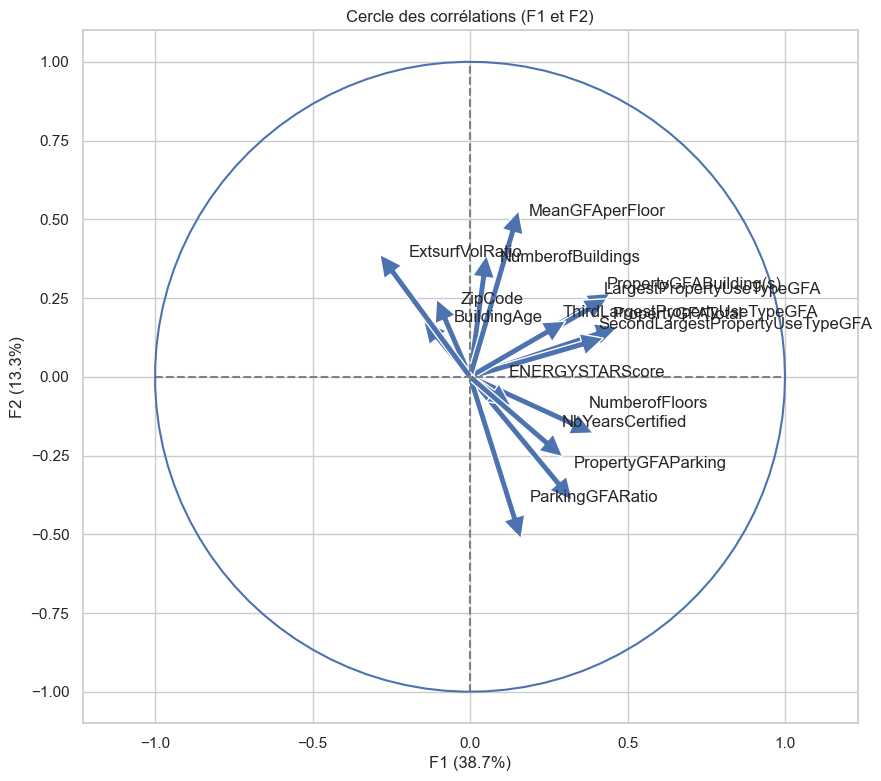

In [126]:
correlation_graph(pca, x_y, prop_Q_cols)

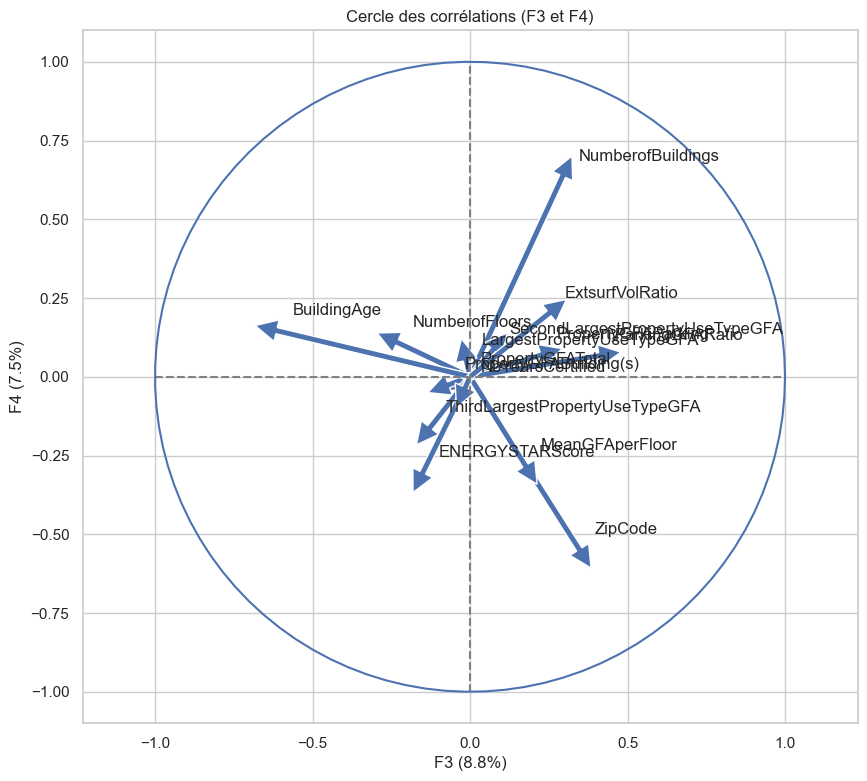

In [127]:
correlation_graph(pca, (2,3), prop_Q_cols)

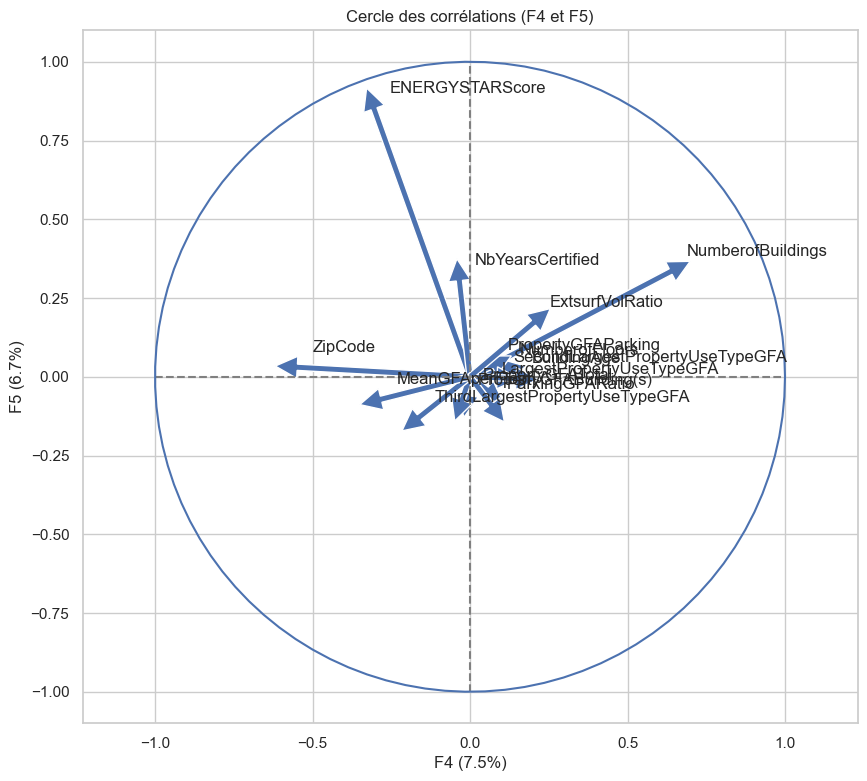

In [128]:
correlation_graph(pca, (3,4), prop_Q_cols)

In [129]:
data.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'CouncilDistrictCode', 'Neighborhood', 'YearBuilt',
       'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
       'ThirdLargestPropertyUseTypeGFA', 'YearsENERGYSTARCertified',
       'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)',
       'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)',
       'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)',
       'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)',
       'OtherFuelUse(kBtu)', 'DefaultData', 'Comments', 'ComplianceStatus',
       'Outlier', 'City', 'State', 'ZipCode', 'Latitude', 'Longitude',
       'Address', 'TotalGH

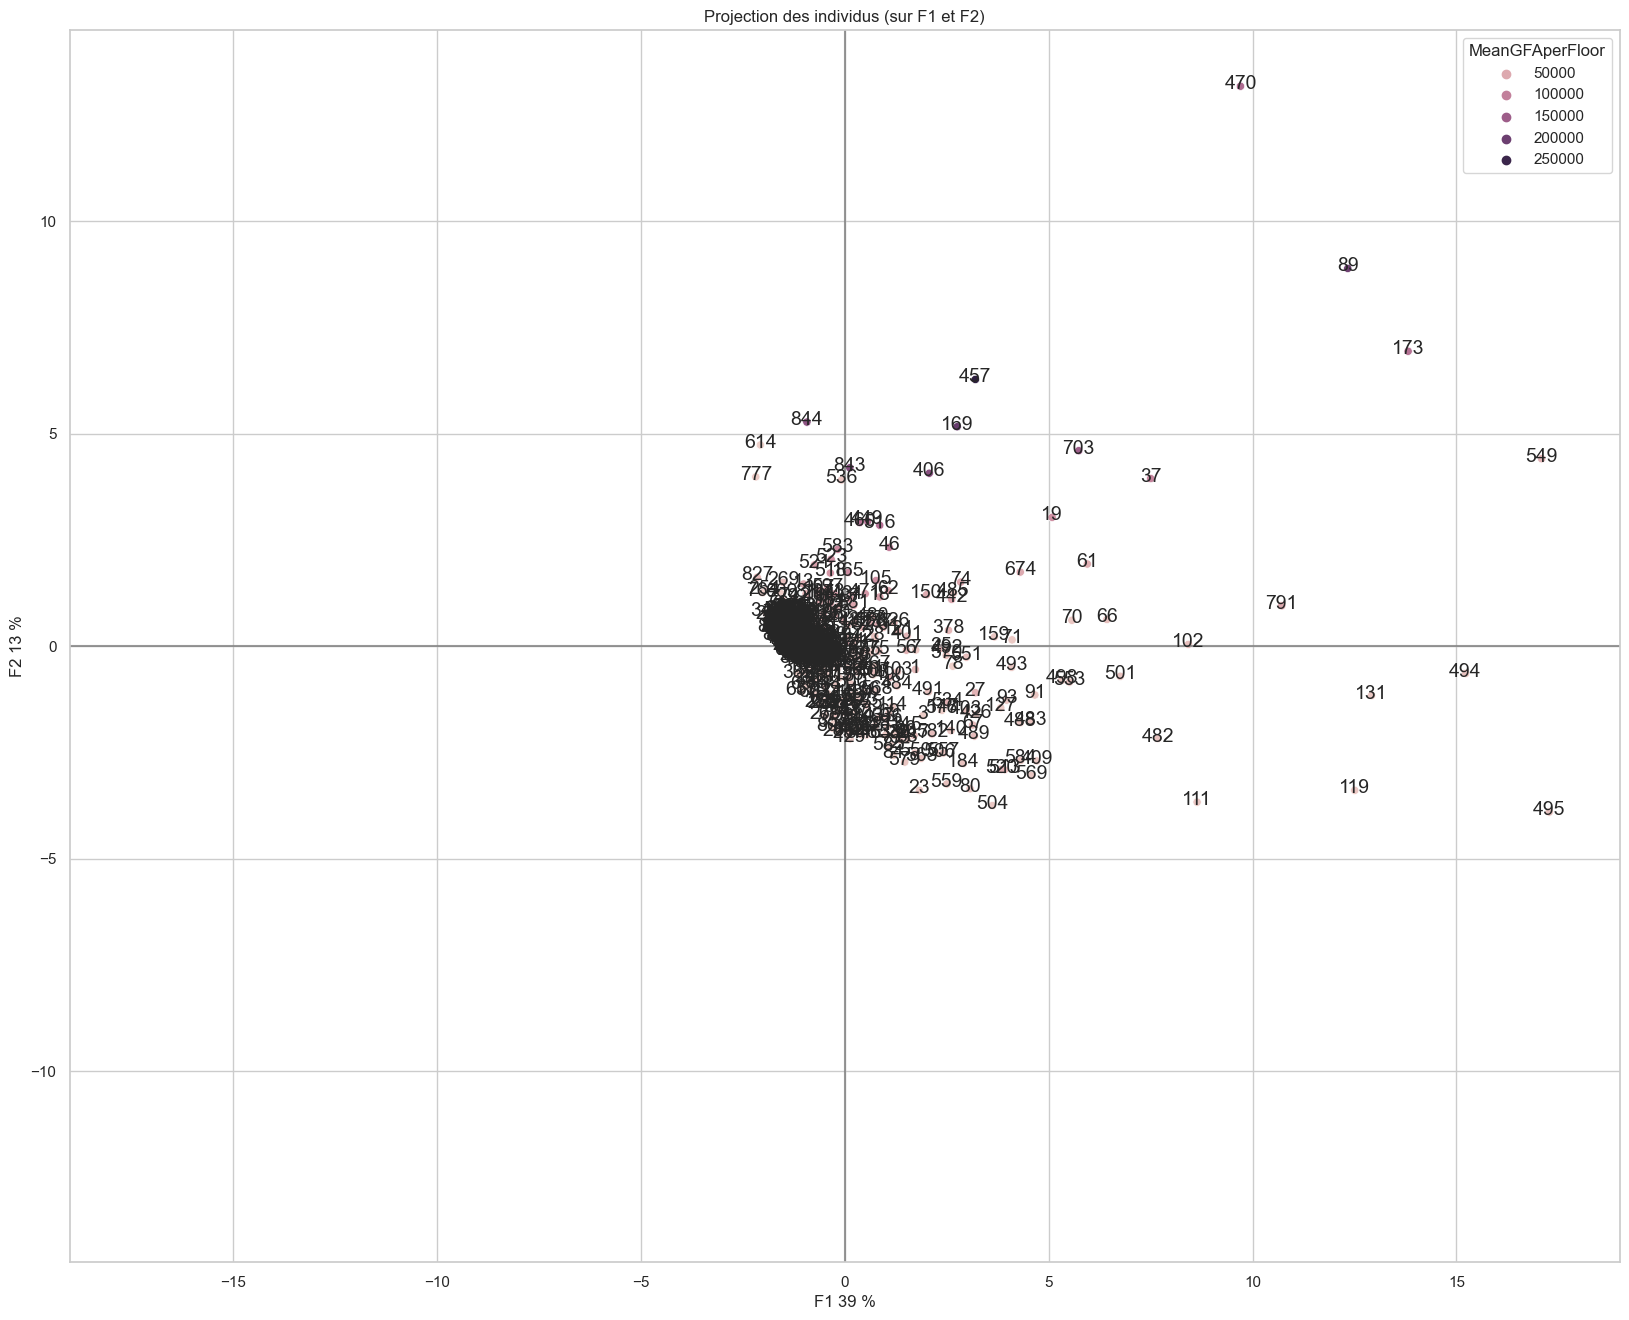

In [130]:

x_y = [1,2]
display_factorial_planes(X_proj, (0,1), pca, labels=df_pca.index, figsize=(20,16), clusters=df_pca['MeanGFAperFloor'], marker="o")

### Données catégoriques

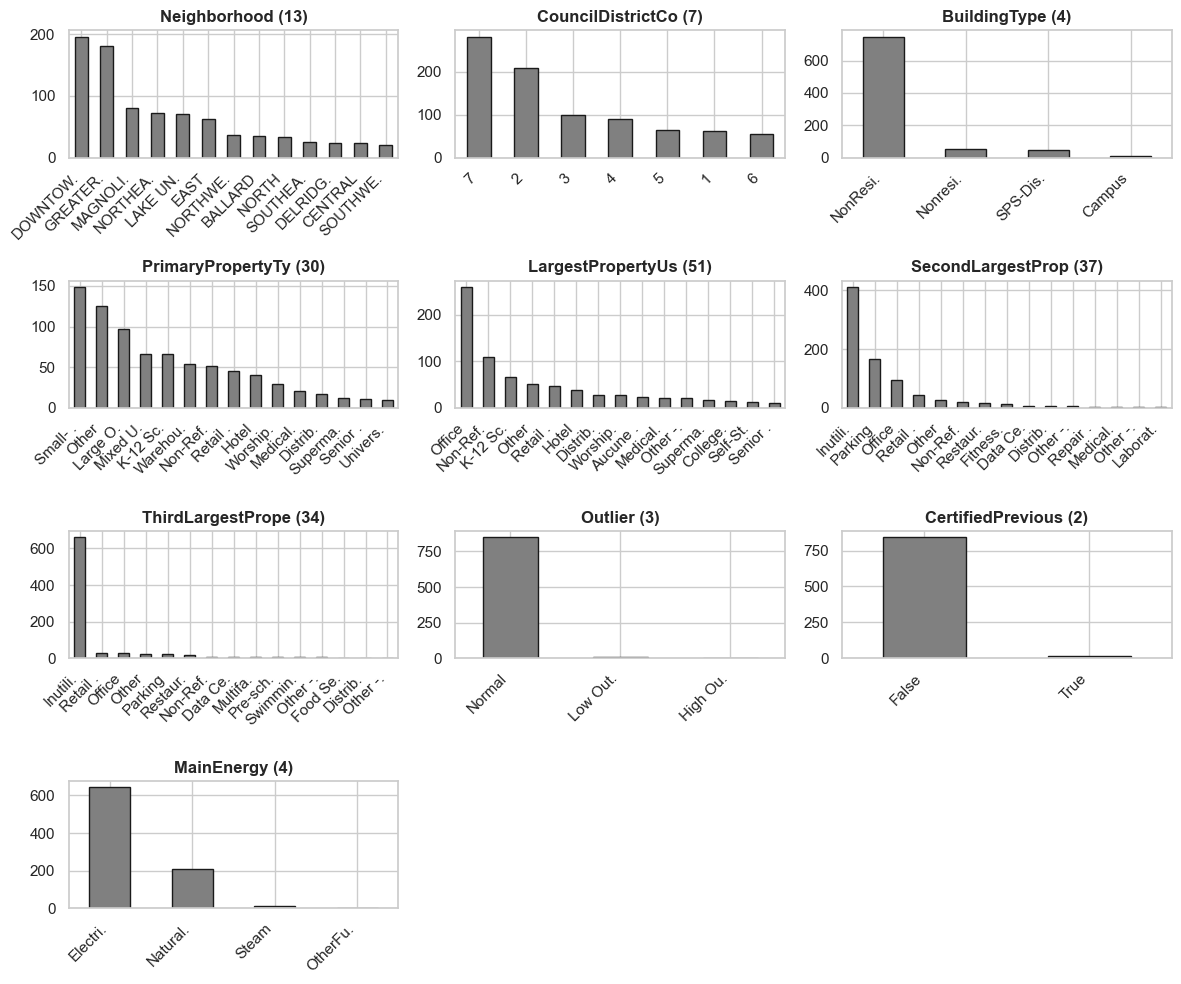

In [131]:
plot_barplots(df=data, cols=prop_C_cols, figsize=(12,10),
                            layout=(4,3), save_enabled=False)
plt.show()

In [132]:
data['SiteEnergyUseWN(kBtu)']=data['SiteEnergyUseWN(kBtu)'].astype(float)

In [133]:
data['ZipCode'] = data['ZipCode'].astype(float)

Contingency table showing 'LargestPropertyUseType' vs. 'PrimaryPropertyType' categories

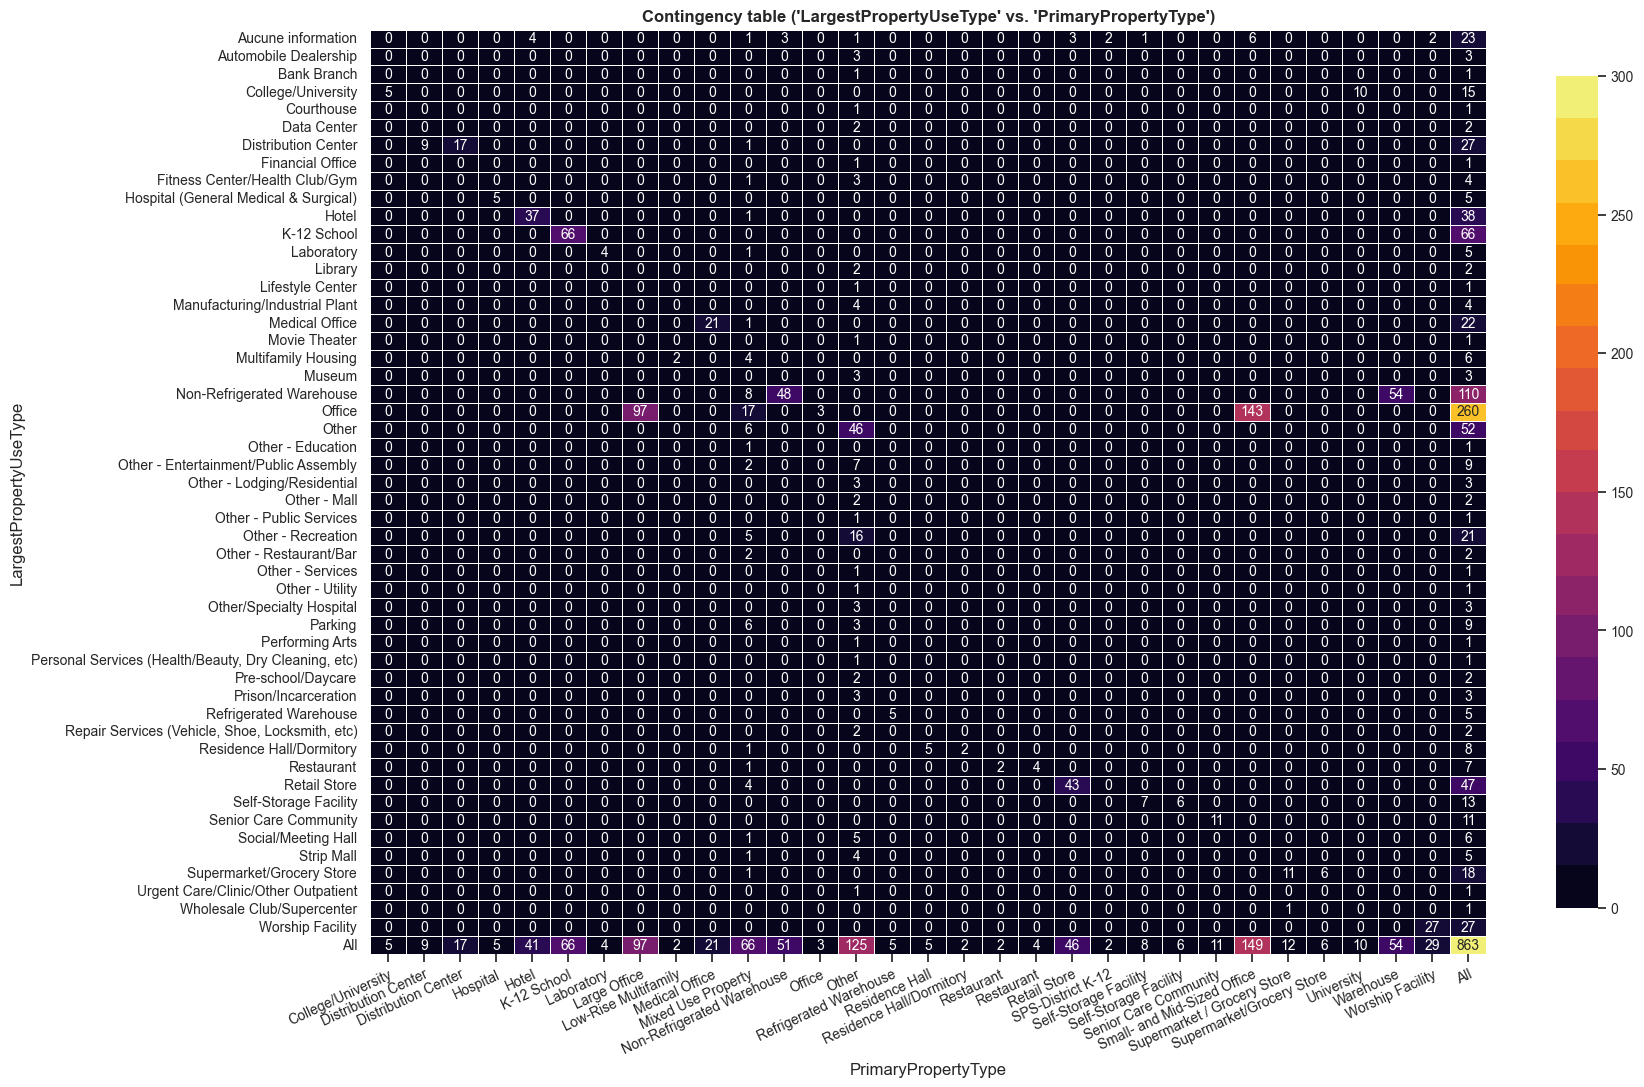

---Chi-squared
stat=14168.400, p=0.000
Probably dependent


In [134]:
data_crosstab = pd.crosstab(data['LargestPropertyUseType'], 
                            data['PrimaryPropertyType'],  
                               margins = True)

plot_heatmap(data_crosstab,
             "Contingency table ('LargestPropertyUseType' vs. 'PrimaryPropertyType')",
             vmin=0, center=150, vmax=300, palette=sns.color_palette("inferno", 20),
             figsize=(18,12), shape='rect', fmt='.0f')
plt.show()

# Chi-Squared Test
from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(data_crosstab)
print('---'+"Chi-squared")
print('stat=%.3f, p=%.3f' % (stat, p))
print('Probably independent') if p > 0.05 else print('Probably dependent')

In [135]:
df=data.copy()

In [136]:
df['ZipCode'] = df['ZipCode'].apply(str).astype('object')
df['CouncilDistrictCode'] = df['CouncilDistrictCode'].apply(str).astype('object')

In [137]:
prop_Q_cols = ['NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
               'PropertyGFAParking', 'PropertyGFABuilding(s)',
               'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA',
               'ThirdLargestPropertyUseTypeGFA', 'BuildingAge',
               'MeanGFAperFloor', 'ParkingGFARatio', 'NbYearsCertified',
               'ExtsurfVolRatio','ENERGYSTARScore'] # 'ENERGYSTARScore',
prop_C_cols = ['Neighborhood', 'ZipCode', 'CouncilDistrictCode',
               'BuildingType', 'PrimaryPropertyType', 'LargestPropertyUseType',
               'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType',
               'CertifiedPreviousYear', 'EnergyProfile', 'MainEnergy', 'Outlier']
target_cols = ['SiteEnergyUseWN(kBtu)', 'TotalGHGEmissions','SiteEnergyUseWN(kBtu)_log', 'TotalGHGEmissions_log']
            

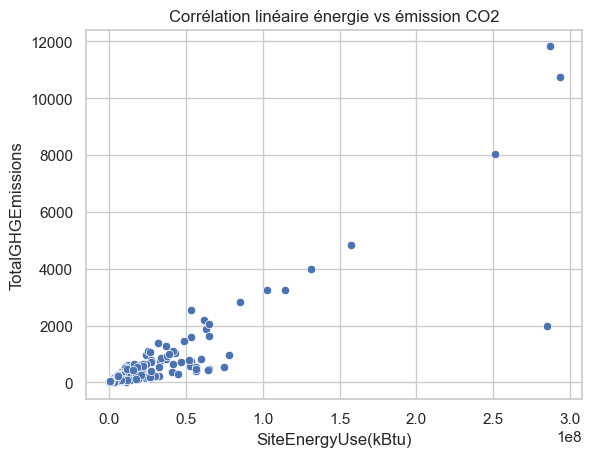

In [138]:
sns.scatterplot(x='SiteEnergyUse(kBtu)', y='TotalGHGEmissions', data=df, )
plt.title("Corrélation linéaire énergie vs émission CO2")
plt.show()

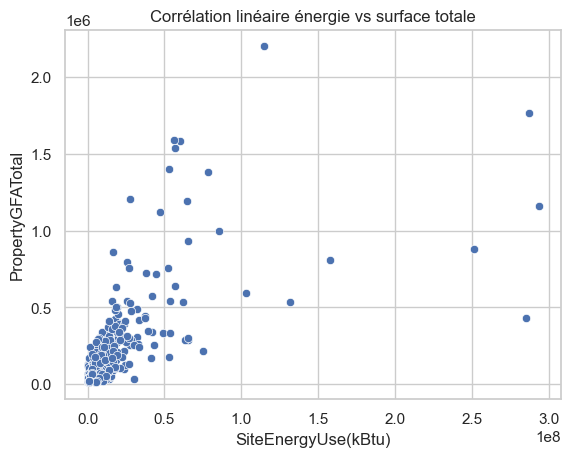

In [139]:
sns.scatterplot(x='SiteEnergyUse(kBtu)', y='PropertyGFATotal', data=df, )
plt.title("Corrélation linéaire énergie vs surface totale")
plt.show()

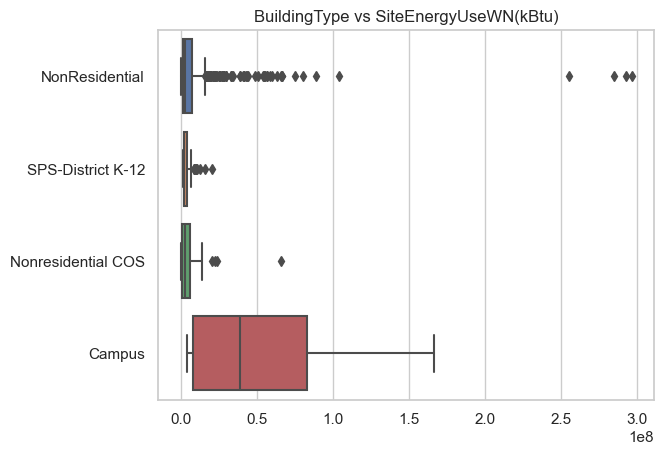

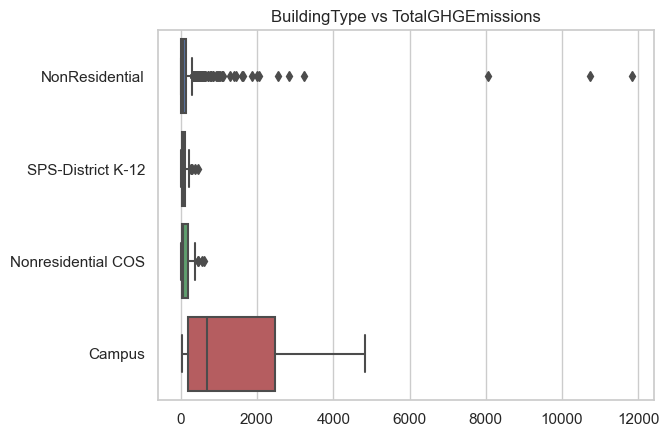

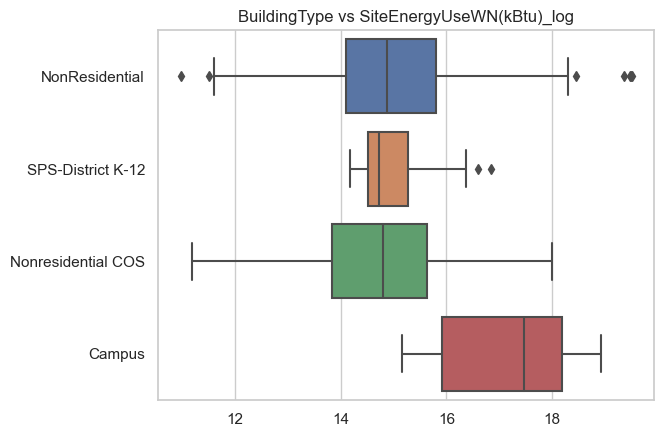

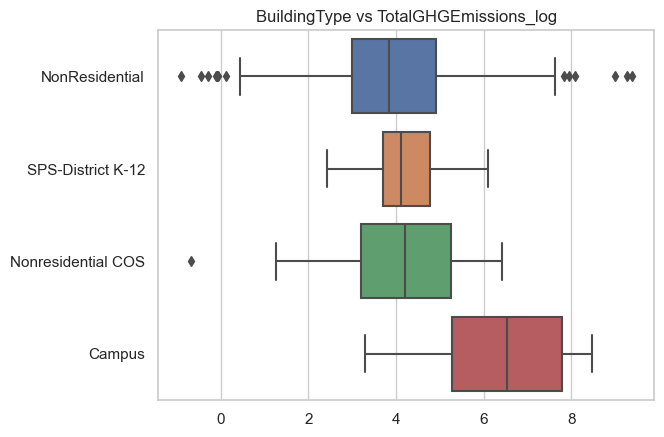

In [140]:
#BuildingType VS target_cols
for target in df[target_cols] : 
    sns.boxplot(x=target, y='BuildingType', data=df)
    plt.title('BuildingType vs ' + target)
    plt.xlabel('')
    plt.ylabel('')
    plt.show()

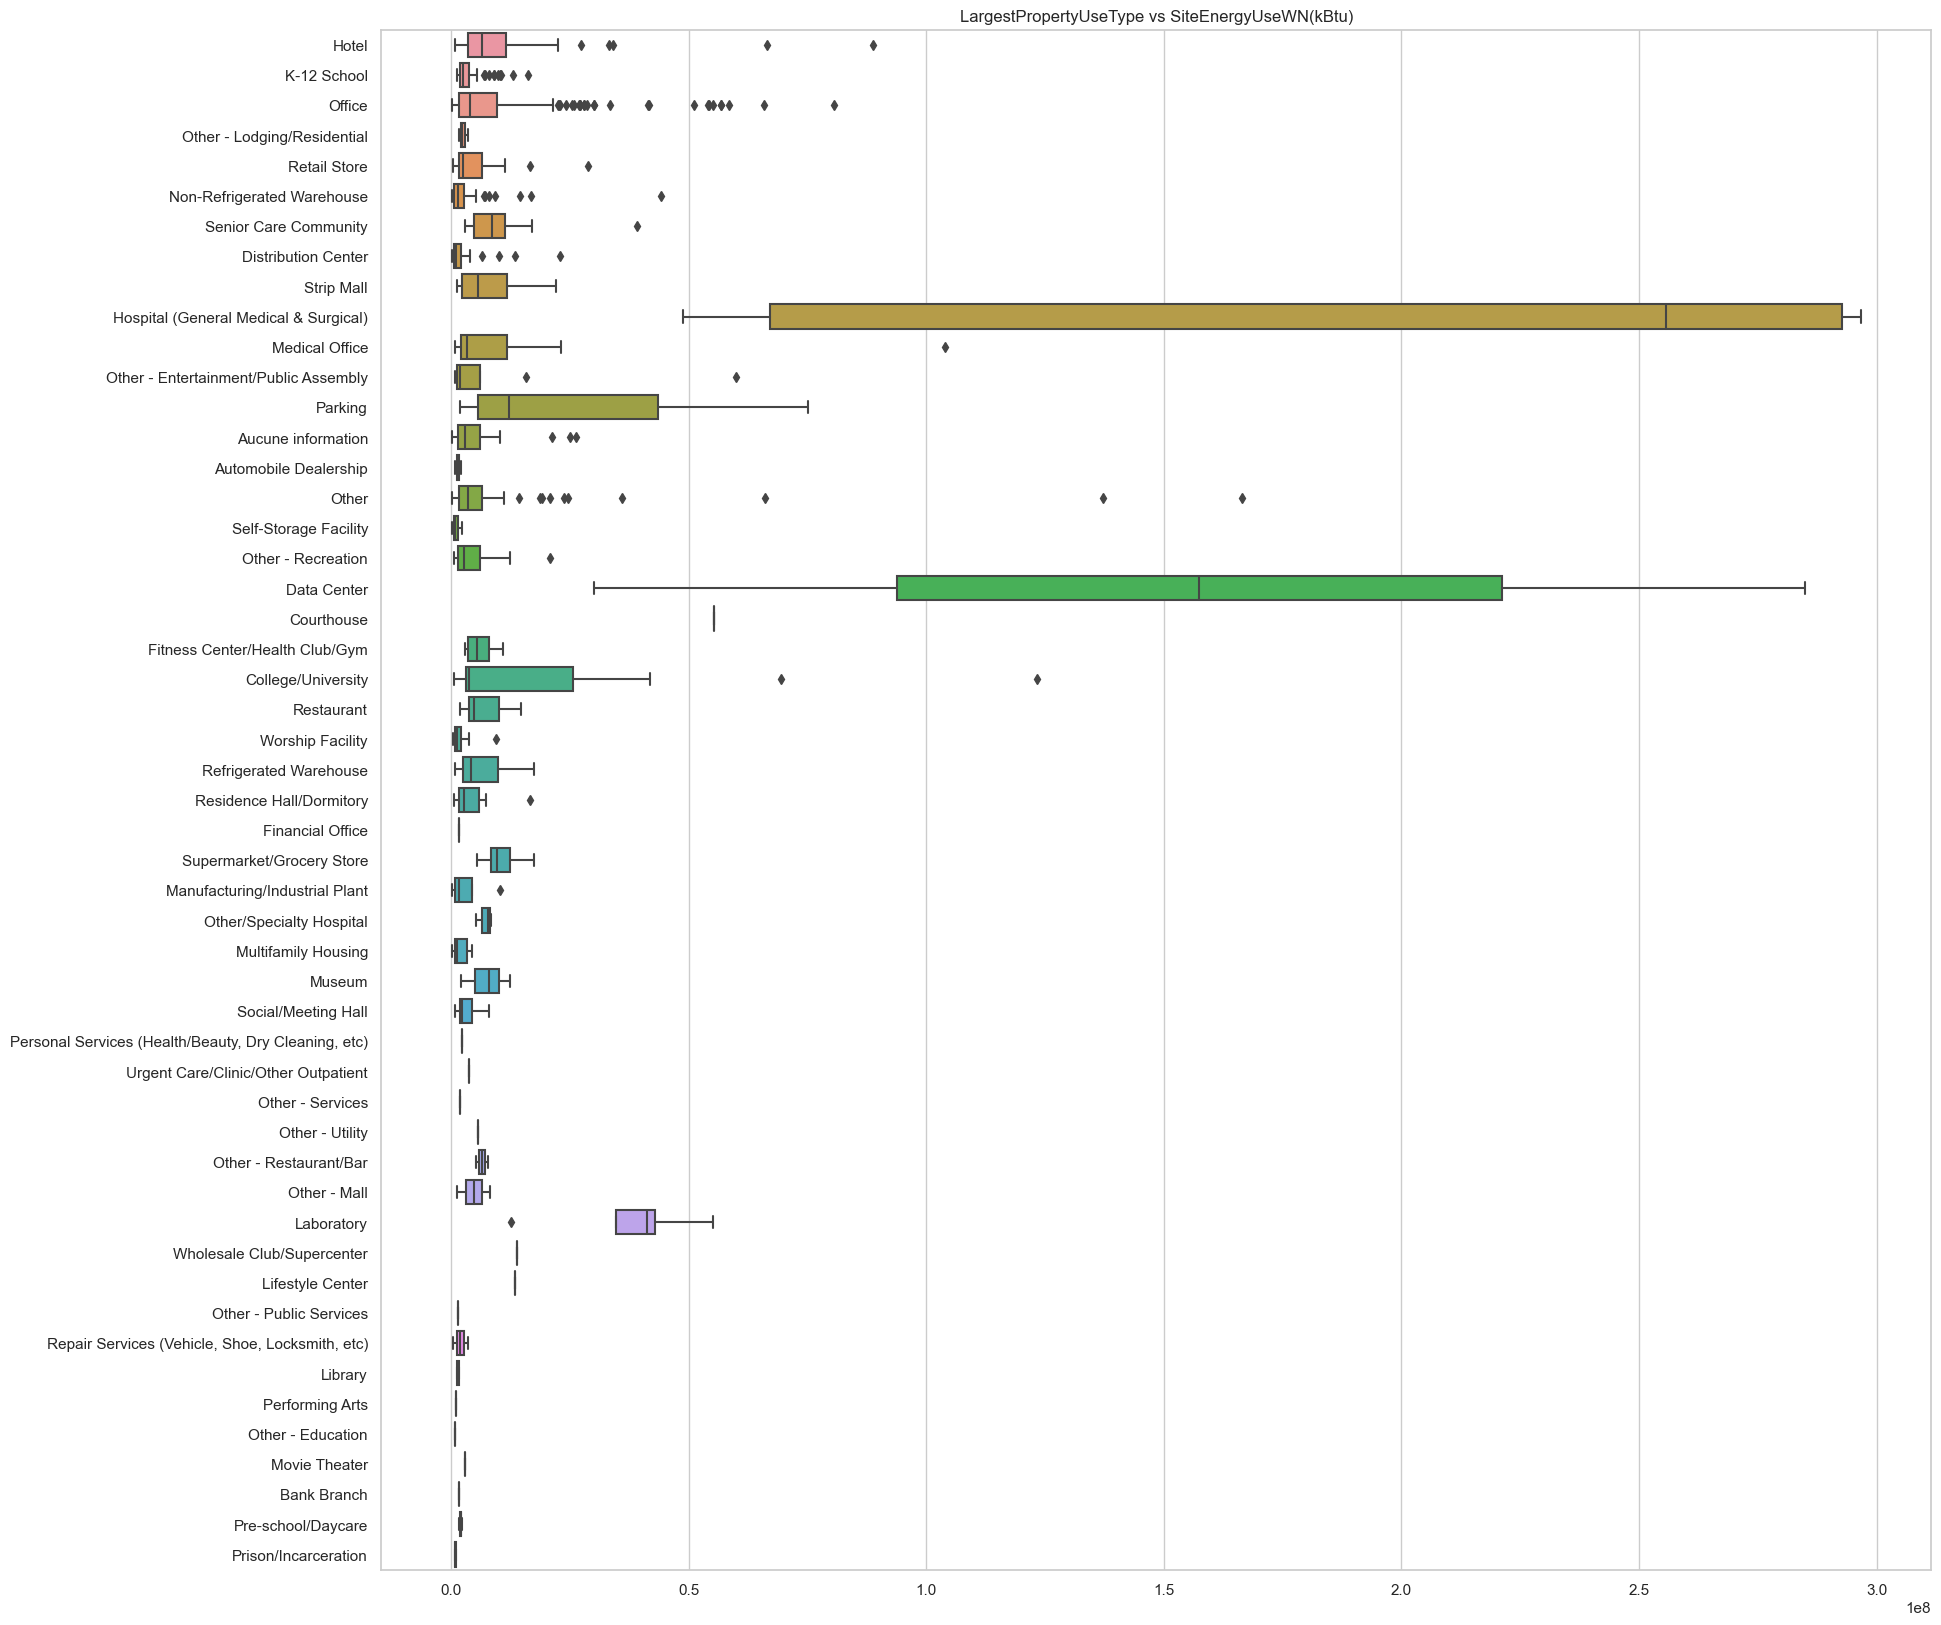

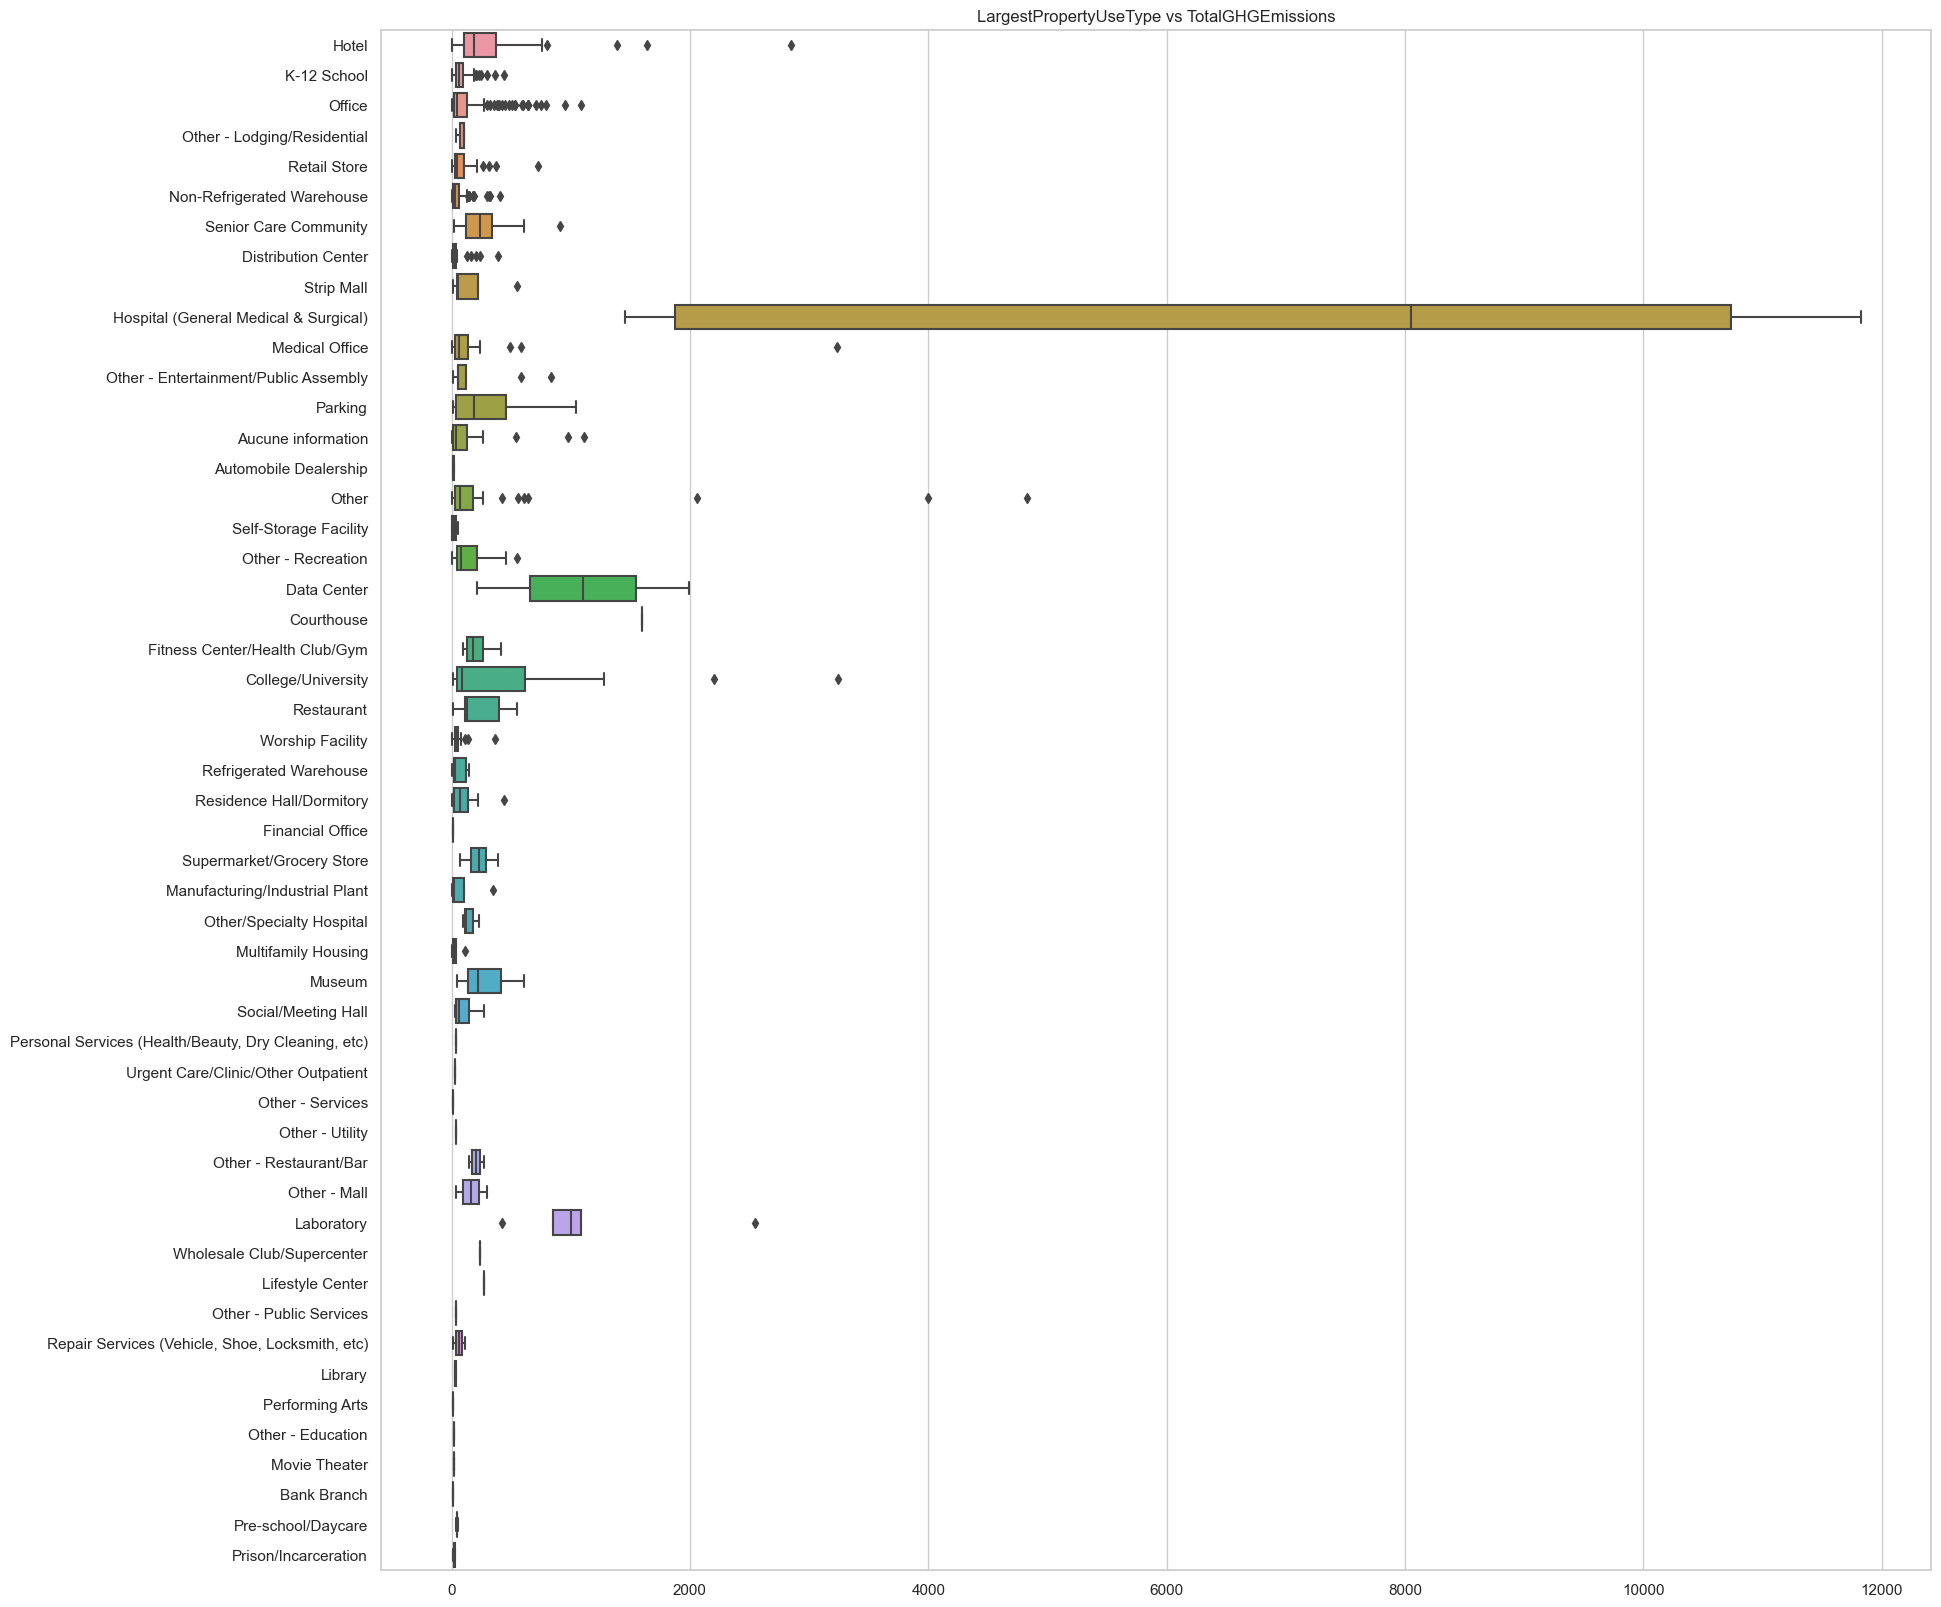

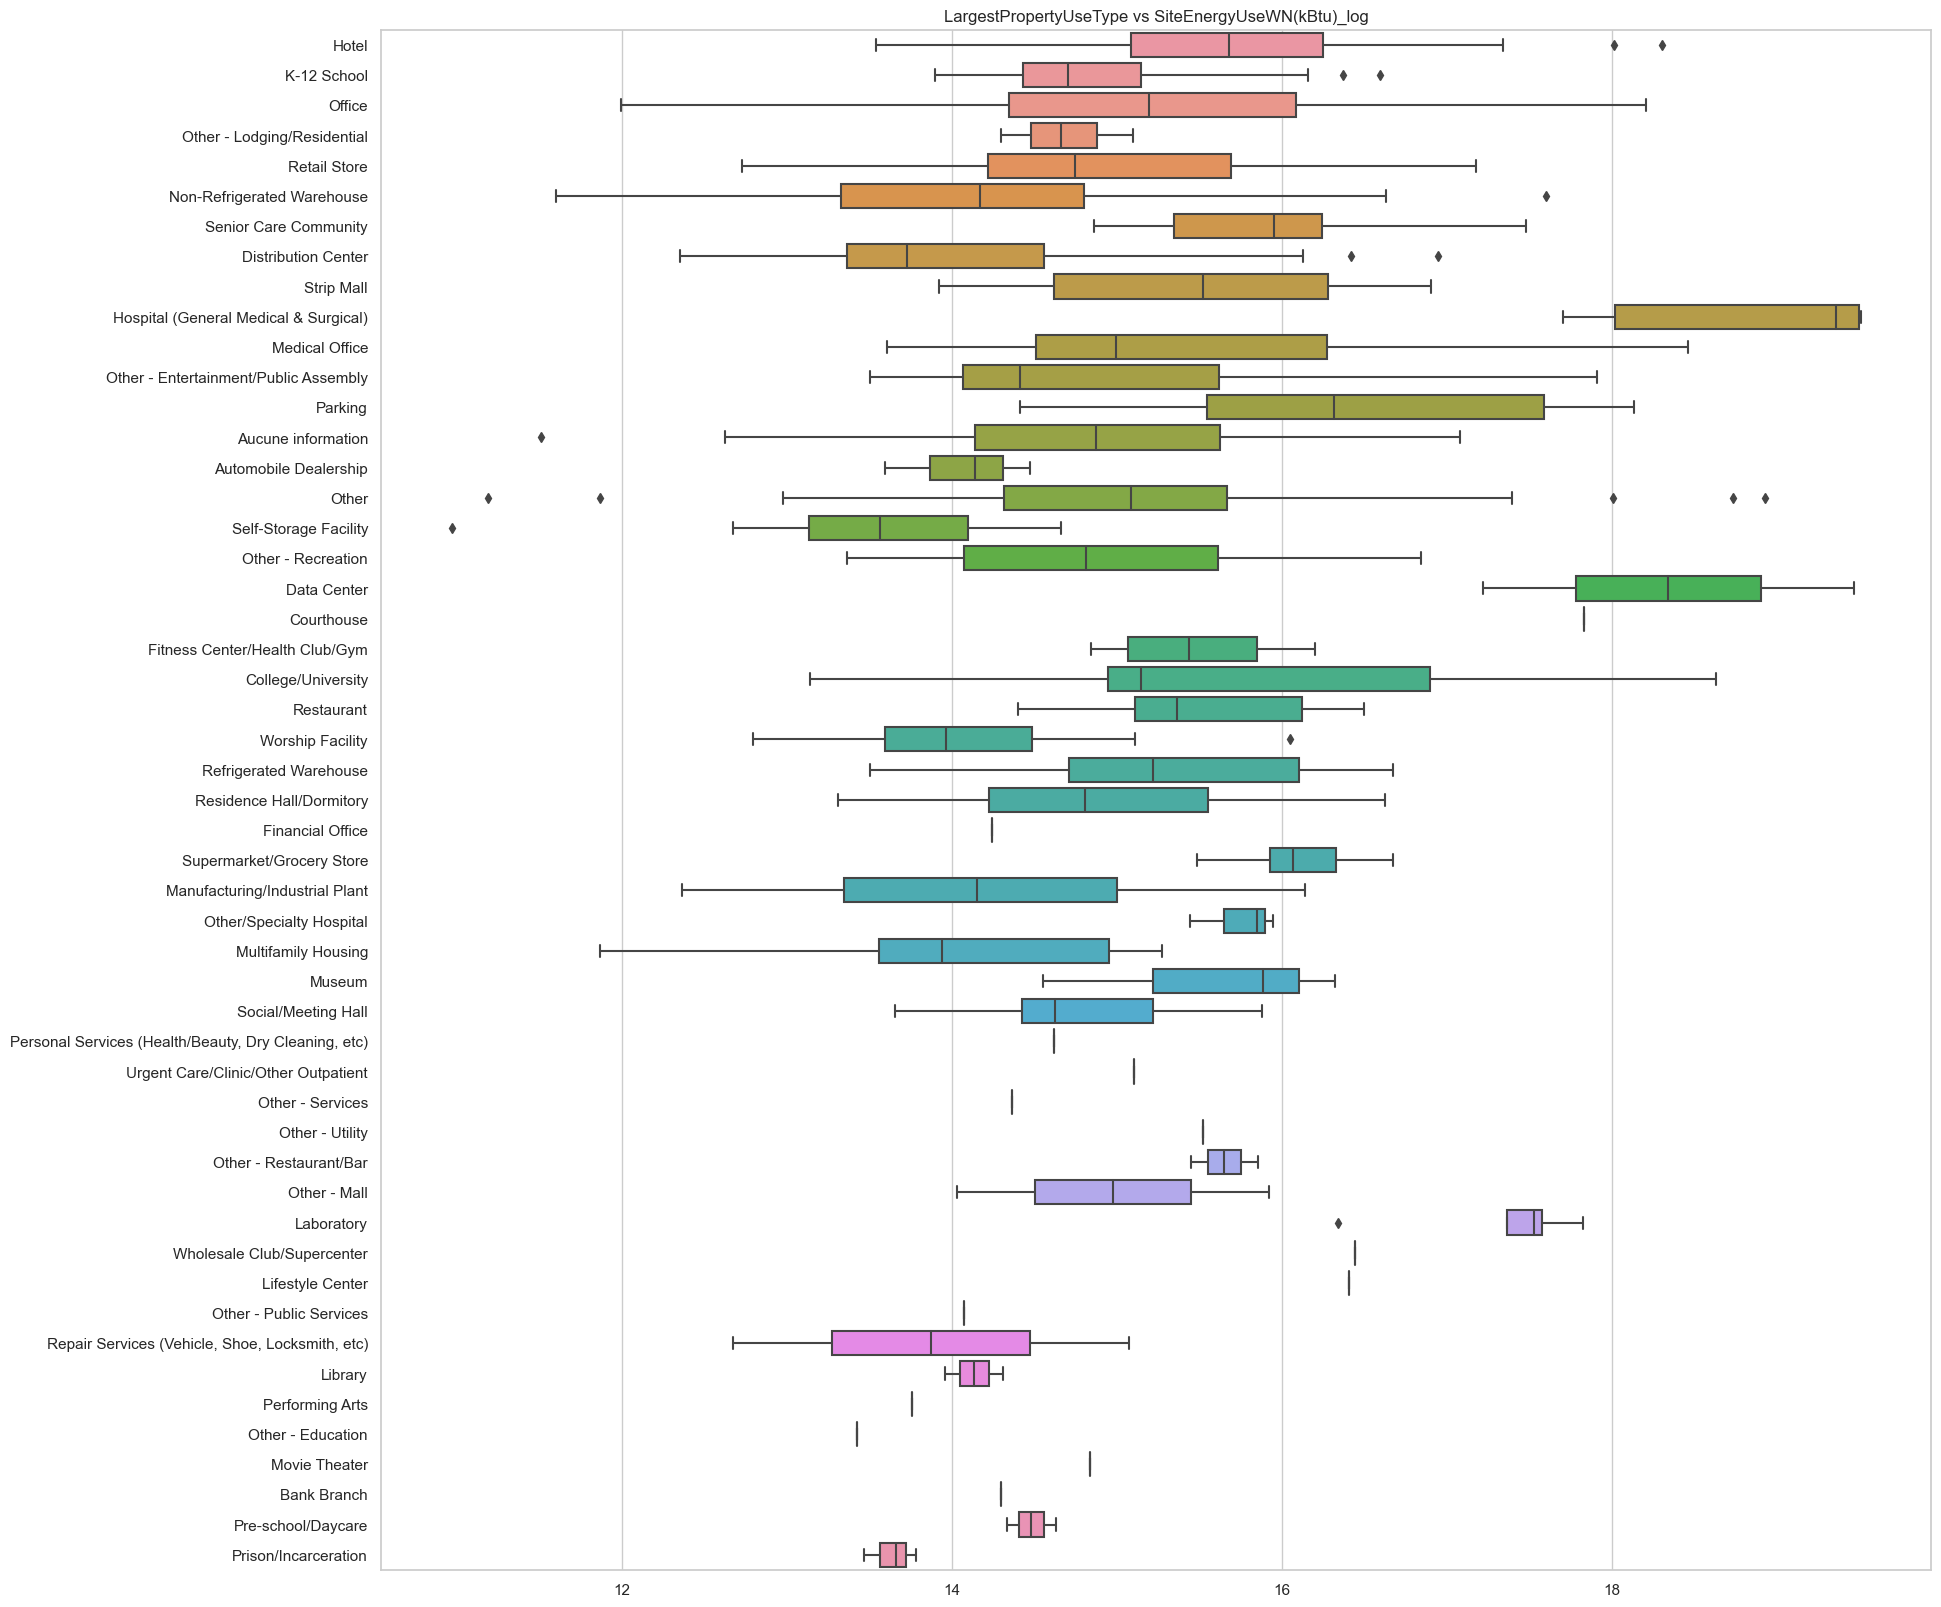

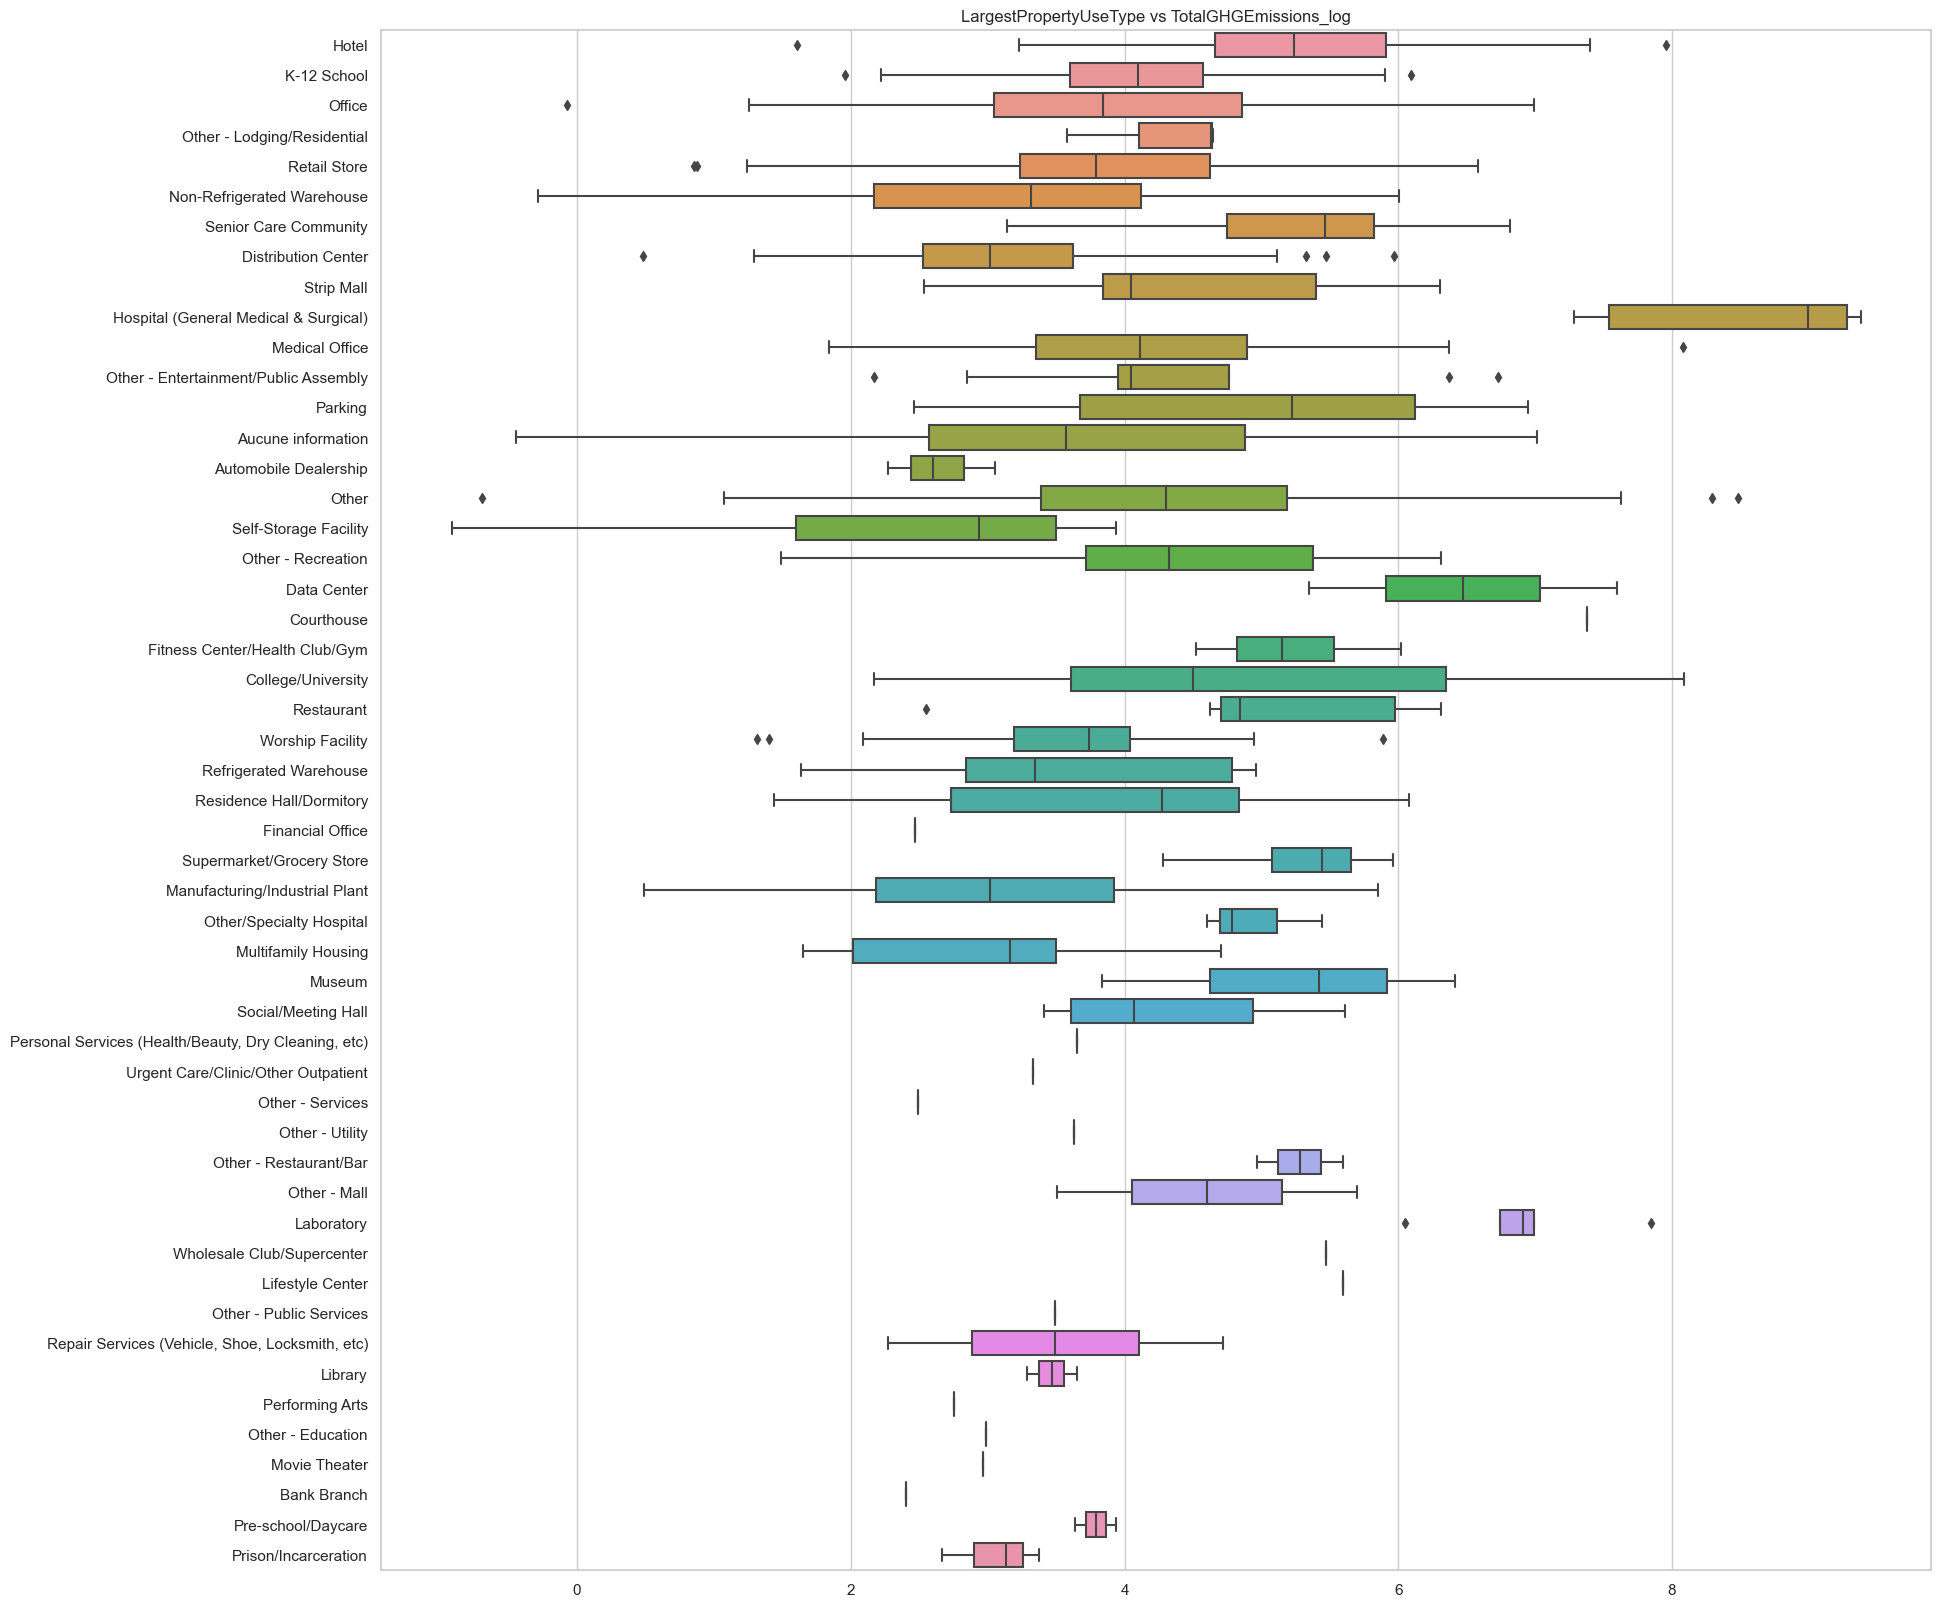

In [141]:
#LargestPropertyUseType VS target_cols
for target in df[target_cols] : 
    plt.figure(figsize=(20, 20))
    sns.boxplot(x=target, y='LargestPropertyUseType', data=df)
    plt.title('LargestPropertyUseType vs ' + target)
    plt.xlabel('')
    plt.ylabel('')
    plt.show()

Certaines structures professsionnelles commes les hôpitaux, data center, parking ou encore les hôtels sont plus représentatifs d'une consommation énergétique élevée, donc de rejets de CO2 plus importants.

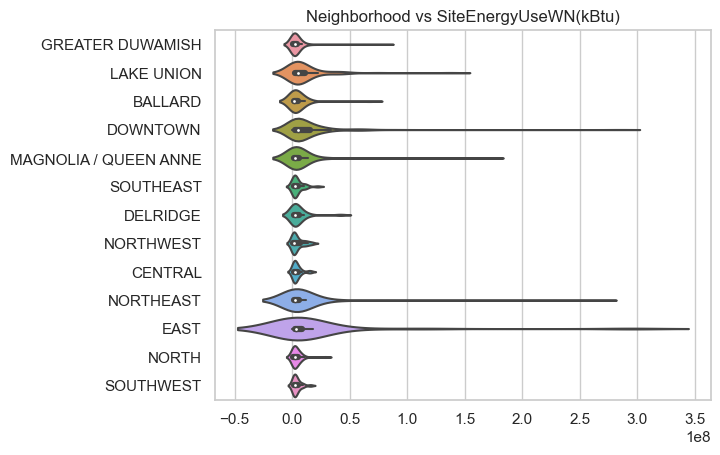

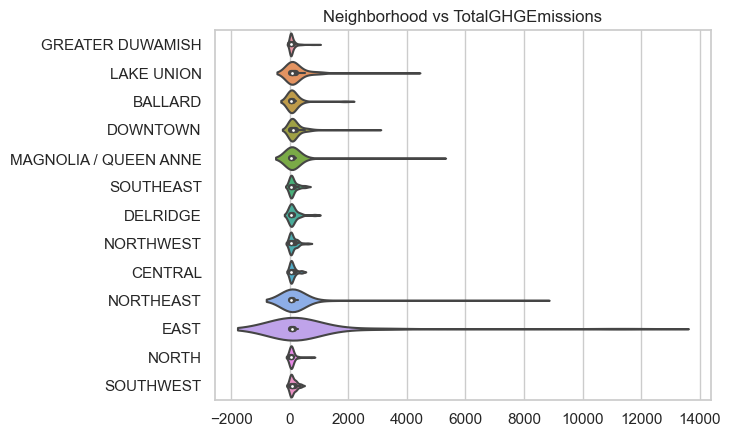

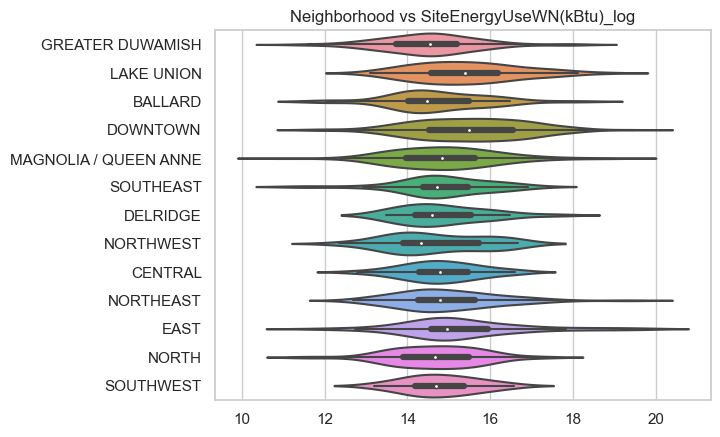

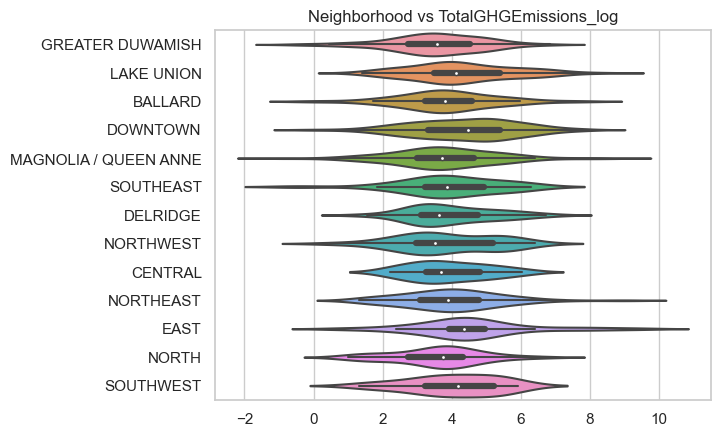

In [142]:
#Violin Plot Neighborhood VS target_cols
for target in df[target_cols] : 
    sns.violinplot(x=target, y='Neighborhood', data=df, scale='width')
    plt.title('Neighborhood vs ' + target)
    plt.xlabel('')
    plt.ylabel('')
    plt.show()

Ici, on a pu apprendre de nos variables afin de sélectionner celles qui sont les plus explicatives selon une logique métier. Le nettoyage a été opéré, avec traitement des valeurs manquantes, traitement des valeurs outliers dont les principales atypiques ont été conservées dans l'échantillon, les duplications ont également été analysées. Des intuitions de relation linéaire entre variables ont pu être visualisées, mais également les relations entre les targets et des variables catégorielles.

In [143]:
df.isna().sum(axis=0)[df.isna().sum(axis=0)!=0]

ENERGYSTARScore    300
Comments           861
dtype: int64

#### Showing the outliers in boxplots

In [144]:
sel = ['NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)','LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA',
       'BuildingAge','MeanGFAperFloor', 'ParkingGFARatio', 'NbYearsCertified',
       'ExtsurfVolRatio', 'ENERGYSTARScore']

### 1.2 Transformation des caractéristiques
Nous souhaitons évaluer l'impact des stratégies de transformation pour les données quantitatives et catégoriques.

Nous allons diviser les colonnes en 4 types.

Données quantitatives

1 - Entiers ou décimaux.

Données catégoriques

Les données catégoriques sont toutes nominales, aucune d'entre elles n'est ordinale.

2 - booléen : 'CertifiedPreviousYear'

3 - faible cardinalité (moins de 12 catégories) :
'BuildingType', 'MainEnergy', 'EnergyProfile', 'Outlier'

4 - haute cardinalité (12 catégories ou plus) :
('Quartier', 'Type de propriété le plus important',
'Deuxième type de propriété le plus important',
'Troisième type de propriété le plus important', 'Type de propriété principal')

Les options de transformation sont transmises à GridSearchCV ou RandomizedSearchCV via le dictionnaire mygrids.

### 1.3 Features selection

Let's evaluate the quality and the colinearity of the features independent of the choice of the model to see if all features are worth keeping in the modelling process.

#### Feature selection based on colinearity (Pearson correlation)

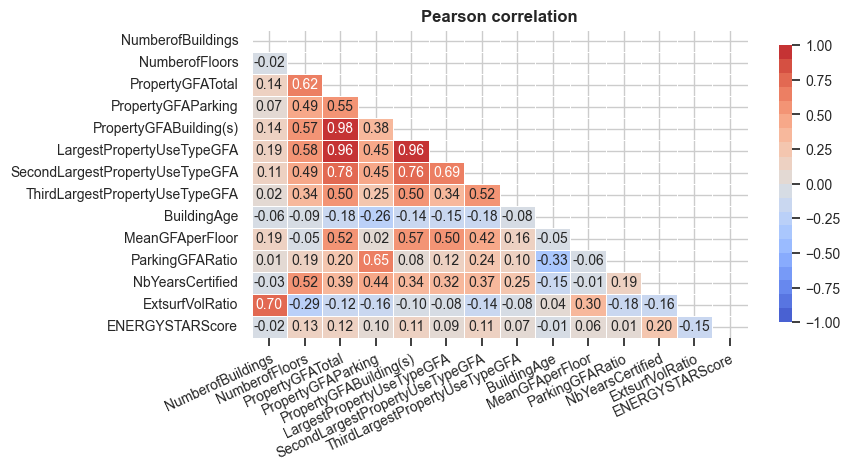

In [145]:
corr = df[prop_Q_cols].corr()
plot_heatmap(corr, 'Pearson correlation', shape='tri')

In [146]:
for thresh in [0.3,0.4,0.5,0.6,0.7,0.8,0.9]:
    li_corr_features = corr[((np.abs(corr)>thresh)&(np.abs(corr)<1)).any(1)].index
    print('---threshold Pearson corr = '+str(thresh)+" ({})".format(str(len(li_corr_features))))
    print(li_corr_features)

---threshold Pearson corr = 0.3 (13)
Index(['NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseTypeGFA', 'BuildingAge', 'MeanGFAperFloor',
       'ParkingGFARatio', 'NbYearsCertified', 'ExtsurfVolRatio'],
      dtype='object')
---threshold Pearson corr = 0.4 (12)
Index(['NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseTypeGFA', 'MeanGFAperFloor', 'ParkingGFARatio',
       'NbYearsCertified', 'ExtsurfVolRatio'],
      dtype='object')
---threshold Pearson corr = 0.5 (12)
Index(['NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA',
  

C:\Users\User\AppData\Local\Temp\ipykernel_13824\1762280479.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  li_corr_features = corr[((np.abs(corr)>thresh)&(np.abs(corr)<1)).any(1)].index


In [147]:
X = df[prop_Q_cols]

In [148]:
 X.isna().sum()

NumberofBuildings                    0
NumberofFloors                       0
PropertyGFATotal                     0
PropertyGFAParking                   0
PropertyGFABuilding(s)               0
LargestPropertyUseTypeGFA            0
SecondLargestPropertyUseTypeGFA      0
ThirdLargestPropertyUseTypeGFA       0
BuildingAge                          0
MeanGFAperFloor                      0
ParkingGFARatio                      0
NbYearsCertified                     0
ExtsurfVolRatio                      0
ENERGYSTARScore                    300
dtype: int64

#### Aperçu sur la variance des données

La variance des caractéristiques varie vraiment beaucoup d'un ordre de grandeur à l'autre. Nous devrons transformer les données quantitatives. Cette analyse conduit aux conclusions suivantes :

Données quantitatives

Nous avons remarqué des caractéristiques quantitatives fortement corrélées dans le cahier.

'PropertyGFATotal' est fortement corrélé avec 'PropertyGFABuilding(s)'
'PropertyGFABuilding(s)' est fortement corrélé avec 'LargestPropertyUseTypeGFA'
'ExtsurfVolRatio' est fortement corrélé avec 'NumberofBuildings'
Données catégoriques

'LargestPropertyUseType'  est fortement corrélé avec 'PrimaryPropertyType'
Dans un premier temps, nous conserverons toutes les données, à l'exception de la latitude et de la longitude, ainsi que des données d'identification. Nous mettrons en place un processus de sélection automatique des caractéristiques dans le pipeline que nous utiliserons pour l'optimisation.


In [149]:
df_X = df[prop_Q_cols+prop_C_cols]
df_y = df[target_cols] # 'SiteEnergyUseWN(kBtu)', 'TotalGHGEmissions'
df_Xy = pd.concat([df_X, df_y], axis=1)

In [150]:
df_Xy.shape

(863, 30)

## 3 Exporting the cleaned, merged, filtered, imputed dataset

In [151]:
data.to_csv('../DATA/Cleaned_data_seatle.csv', index = False, header=True)